In [1]:
import numpy as np
import PyNAFF as pnf
import scipy.io as sio 
import matplotlib.cm as cm
from math import log10, floor
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from scipy.optimize import curve_fit

In [2]:
plt.rcParams['figure.figsize'] = [8.0, 4.0]
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

plt.rcParams['font.size'] = 10
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['lines.linewidth'] = 1

In [3]:
def add_input_file(dd, filename, label):
	f = filename
	p = dict()
	sio.loadmat(f, mdict=p)
	dd[label] = p	
	print '\tAdded output data from ', filename, '\t dictionary key: ', label
	return dd

In [4]:
def Md_fit(x, a, b, c, d):
        return a + b*np.cos(c*x+d)
    
def Md_ramp_fit(x, a, b, c, d):
    return a + b*(x-1)*np.cos(c*(x-1)+d)

In [5]:
def round_sig(x, sig=4):
    return round(x, sig-int(floor(log10(abs(x))))-1)

# No RF No SC Dispersion Matching

In [6]:
# Create dd dictionary
dd1 = dict()

dd1 = add_input_file(dd1, '01_Lattice_NoSC_NoRF/output/output.mat', 'Lat NoSC NoRF')
dd1 = add_input_file(dd1, '02_Op_NoSC_NoRF/output/output.mat', 'Op NoSC NoRF')
dd1 = add_input_file(dd1, '03_ReM_NoSC_NoRF/output/output.mat', 'ReM NoSC NoRF')
#dd1 = add_input_file(dd1, '04_Lattice_SC_NoRF/output/output.mat', 'Lat SC NoRF')
#dd1 = add_input_file(dd1, '05_ReM_SC_NoRF/output/output.mat', 'Op SC NoRF')
#dd1 = add_input_file(dd1, '06_ReM_SC_NoRF/output/output.mat', 'ReM SC NoRF')
#dd1 = add_input_file(dd1, '07_Lattice_NoSC_RF/output/output.mat', 'Lat NoSC RF')
#dd1 = add_input_file(dd1, '08_Op_NoSC_RF/output/output.mat', 'Op NoSC RF')
#dd1 = add_input_file(dd1, '09_ReM_NoSC_RF/output/output.mat', 'ReM NoSC RF')
#dd1 = add_input_file(dd1, '10_Lattice_SC_RF/output/output.mat', 'Lat SC RF')
#dd1 = add_input_file(dd1, '11_Op_SC_RF/output/output.mat', 'Op SC RF')
#dd1 = add_input_file(dd1, '12_ReM_SC_RF/output/output.mat', 'ReM SC RF')

sc = 'NoSC'
legend_label = 'Case'

main_label = 'NoRF'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 40
zoom_turns = 15
betagamma = 2.492104532 * 0.9159915293879255

	Added output data from  01_Lattice_NoSC_NoRF/output/output.mat 	 dictionary key:  Lat NoSC NoRF
	Added output data from  02_Op_NoSC_NoRF/output/output.mat 	 dictionary key:  Op NoSC NoRF
	Added output data from  03_ReM_NoSC_NoRF/output/output.mat 	 dictionary key:  ReM NoSC NoRF


In [11]:
bet_Lat = (np.mean(dd1['Lat NoSC NoRF']['beta_x'][0]))
bet_Op = (np.mean(dd1['Op NoSC NoRF']['beta_x'][0]))
bet_ReM = (np.mean(dd1['ReM NoSC NoRF']['beta_x'][0]))
print bet_Lat
print bet_Op
print bet_ReM

11.995284408280922
11.995525965851687
11.99483343844433


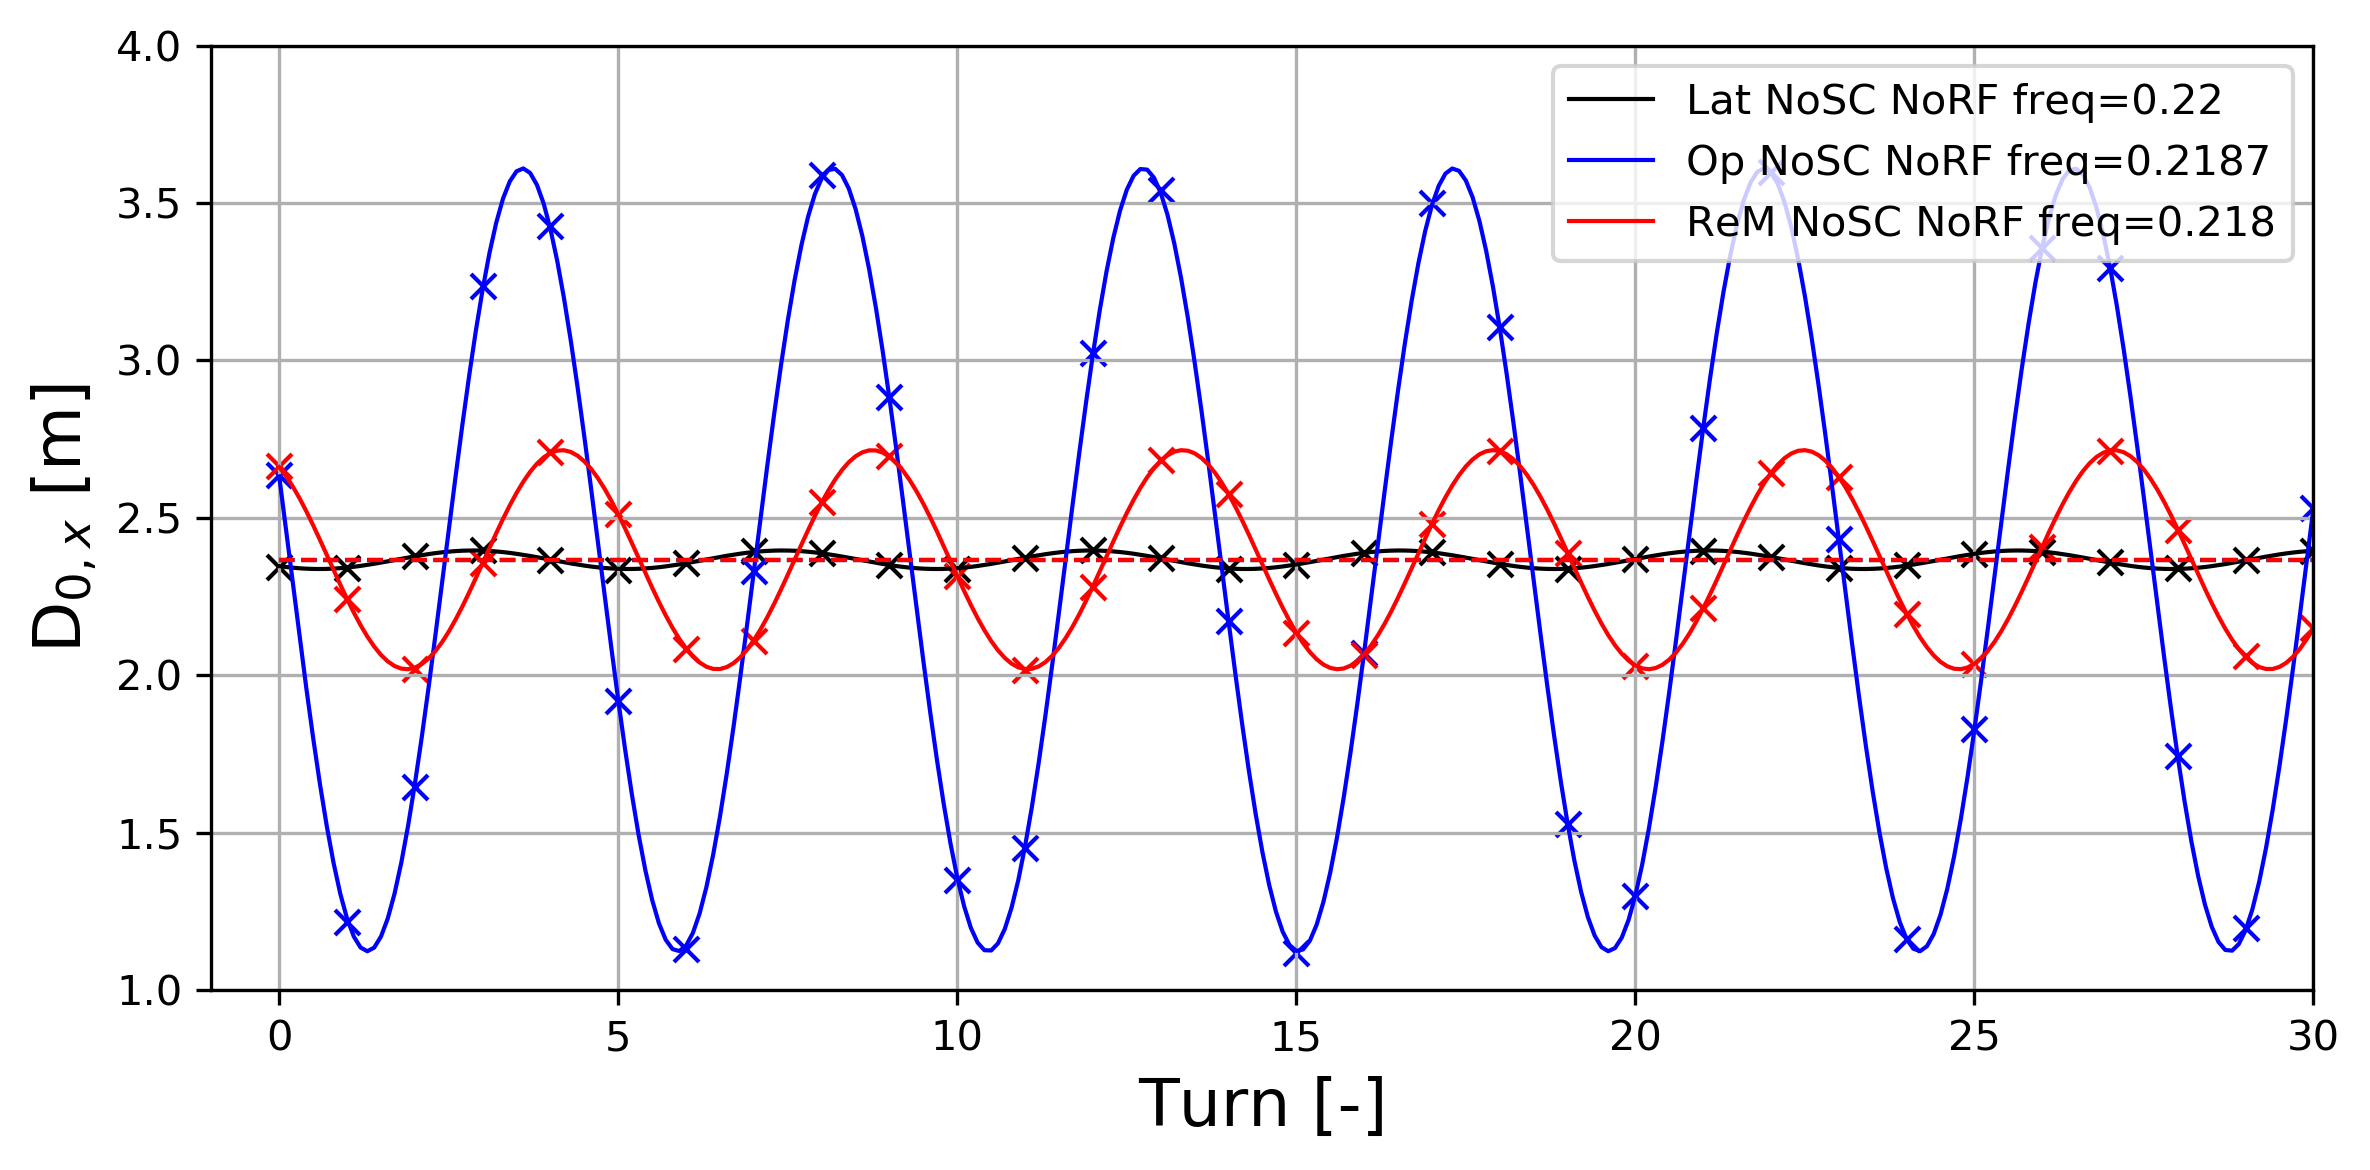

In [7]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

turns_fine = np.arange(0, 40, 0.1)

y_Lat = (dd1['Lat NoSC NoRF']['D_x'][0]-np.mean(dd1['Lat NoSC NoRF']['D_x'][0]))
freq_Lat = pnf.naff(y_Lat, turns=40, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'Lat NoSC NoRF freq=' + str(round_sig(freq_Lat))

y_Op = (dd1['Op NoSC NoRF']['D_x'][0]-np.mean(dd1['Op NoSC NoRF']['D_x'][0]))
freq_Op = pnf.naff(y_Op, turns=40, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Op = 'Op NoSC NoRF freq=' + str(round_sig(freq_Op))

y_ReM = (dd1['ReM NoSC NoRF']['D_x'][0]-np.mean(dd1['ReM NoSC NoRF']['D_x'][0]))
freq_ReM = pnf.naff(y_ReM, turns=40, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_ReM = 'ReM NoSC NoRF freq=' + str(round_sig(freq_ReM))

popt_Lat, pcov_Lat = curve_fit(Md_fit, dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0], marker = 'x', color = 'k')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3]),'k',label = lab_Lat)
plt.plot([dd1['Lat NoSC NoRF']['turn'][0][0]+1, dd1['Lat NoSC NoRF']['turn'][0][-1]], [popt_Lat[0],popt_Lat[0]],'--k')

popt_Op, pcov_Op = curve_fit(Md_fit, dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0], marker = 'x', color = 'b')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Op[0], popt_Op[1], popt_Op[2], popt_Op[3]),'b',label = lab_Op)
plt.plot([dd1['Op NoSC NoRF']['turn'][0][0]+1, dd1['Op NoSC NoRF']['turn'][0][-1]], [popt_Op[0],popt_Op[0]],'--b')

popt_ReM, pcov_ReM = curve_fit(Md_fit, dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0], marker = 'x', color = 'r')
plt.plot(turns_fine, Md_fit(turns_fine, popt_ReM[0], popt_ReM[1], popt_ReM[2], popt_ReM[3]),'r',label = lab_ReM)
plt.plot([dd1['ReM NoSC NoRF']['turn'][0][0]+1, dd1['ReM NoSC NoRF']['turn'][0][-1]], [popt_ReM[0],popt_ReM[0]],'--r')


plt.xlabel('Turn [-]')
plt.ylabel(r'D$_{0,x}$ [m]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
plt.ylim((1, 4))
plt.grid()
plt.legend(loc = 1, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax1.xaxis.label.set_fontsize(16)
ax1.yaxis.label.set_fontsize(16)

plt.tight_layout()

plt.savefig('Dx_NoSC_NoRF_Oscillation.png', dpi = 600)

3.463420911220714


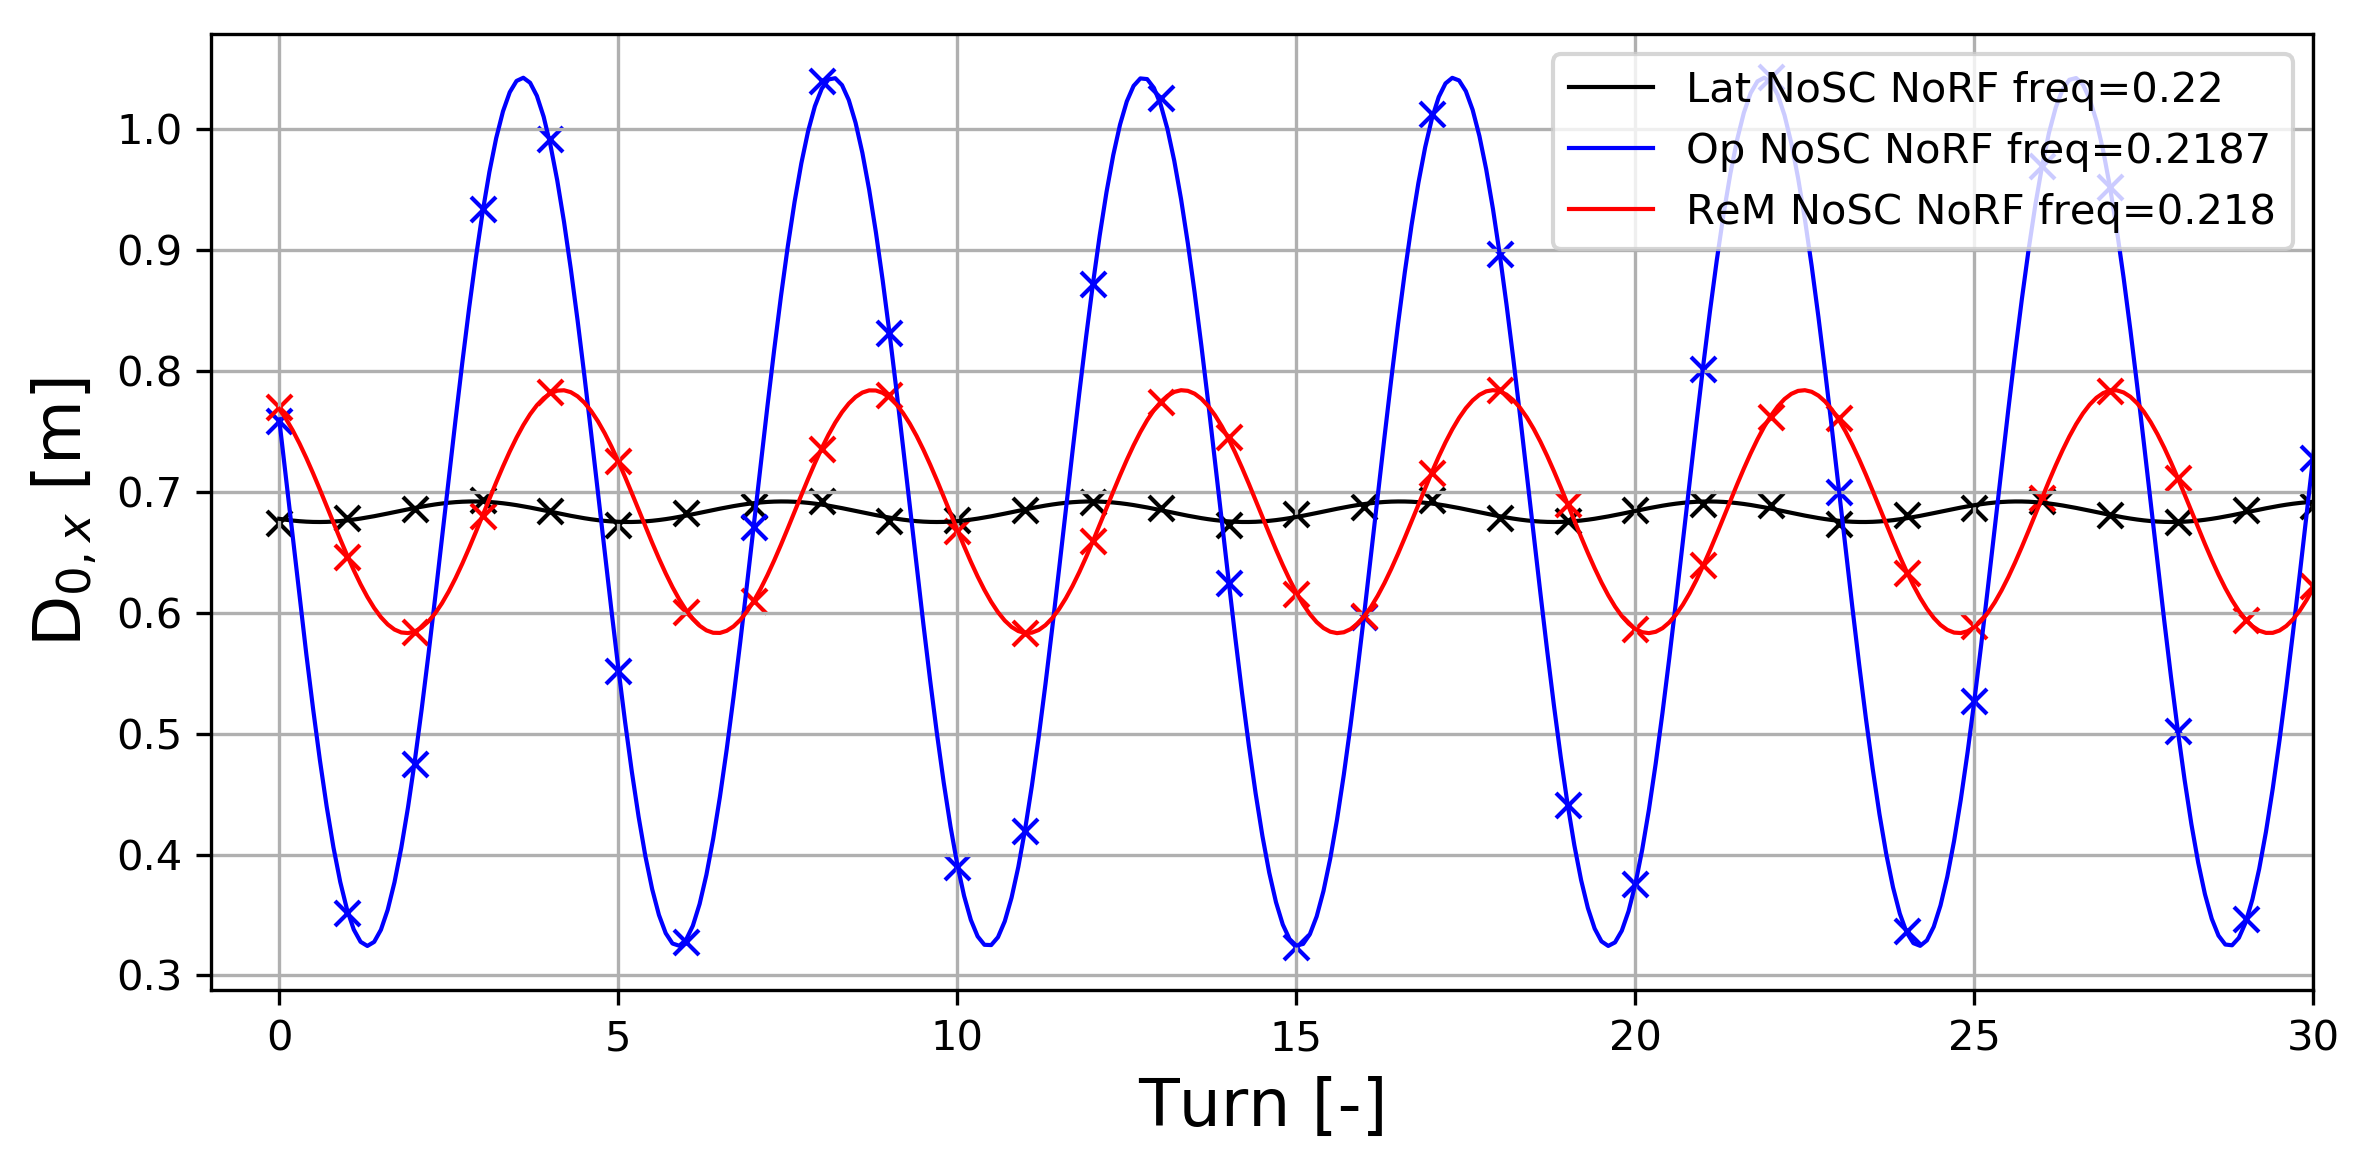

In [8]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

turns_fine = np.arange(0, 40, 0.1)

y_Lat = (dd1['Lat NoSC NoRF']['D_x'][0]-np.mean(dd1['Lat NoSC NoRF']['D_x'][0]))
freq_Lat = pnf.naff(y_Lat, turns=40, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'Lat NoSC NoRF freq=' + str(round_sig(freq_Lat))

y_Op = (dd1['Op NoSC NoRF']['D_x'][0]-np.mean(dd1['Op NoSC NoRF']['D_x'][0]))
freq_Op = pnf.naff(y_Op, turns=40, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Op = 'Op NoSC NoRF freq=' + str(round_sig(freq_Op))

y_ReM = (dd1['ReM NoSC NoRF']['D_x'][0]-np.mean(dd1['ReM NoSC NoRF']['D_x'][0]))
freq_ReM = pnf.naff(y_ReM, turns=40, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_ReM = 'ReM NoSC NoRF freq=' + str(round_sig(freq_ReM))

bet_Lat = np.sqrt(np.mean(dd1['Lat NoSC NoRF']['beta_x'][0]))
print bet_Lat

popt_Lat, pcov_Lat = curve_fit(Md_fit, dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0]/np.sqrt(dd1['Lat NoSC NoRF']['beta_x'][0]), marker = 'x', color = 'k')
#plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3])/np.sqrt(np.mean(dd1['Lat NoSC NoRF']['beta_x'][0])))),'k',label = lab_Lat)
plt.plot(turns_fine, Md_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3])/bet_Lat,'k',label = lab_Lat)
#plt.plot([dd1['Lat NoSC NoRF']['turn'][0][0]+1, dd1['Lat NoSC NoRF']['turn'][0][-1]], [popt_Lat[0],popt_Lat[0]],'--k')

popt_Op, pcov_Op = curve_fit(Md_fit, dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0]/np.sqrt(dd1['Op NoSC NoRF']['beta_x'][0]), marker = 'x', color = 'b')
plt.plot(turns_fine, Md_fit(turns_fine, popt_Op[0], popt_Op[1], popt_Op[2], popt_Op[3])/np.sqrt(np.mean(dd1['Op NoSC NoRF']['beta_x'][0])),'b',label = lab_Op)
#plt.plot([dd1['Op NoSC NoRF']['turn'][0][0]+1, dd1['Op NoSC NoRF']['turn'][0][-1]], [popt_Op[0],popt_Op[0]],'--b')

popt_ReM, pcov_ReM = curve_fit(Md_fit, dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0], method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0]/np.sqrt(dd1['ReM NoSC NoRF']['beta_x'][0]), marker = 'x', color = 'r')
plt.plot(turns_fine, Md_fit(turns_fine, popt_ReM[0], popt_ReM[1], popt_ReM[2], popt_ReM[3])/np.sqrt(np.mean(dd1['ReM NoSC NoRF']['beta_x'][0])),'r',label = lab_ReM)
#plt.plot([dd1['ReM NoSC NoRF']['turn'][0][0]+1, dd1['ReM NoSC NoRF']['turn'][0][-1]], [popt_ReM[0],popt_ReM[0]],'--r')


plt.xlabel('Turn [-]')
plt.ylabel(r'D$_{0,x}$ [m]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
#plt.ylim((1, 4))
plt.grid()
plt.legend(loc = 1, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax1.xaxis.label.set_fontsize(16)
ax1.yaxis.label.set_fontsize(16)

plt.tight_layout()

plt.savefig('Dx_NoSC_NoRF_Oscillation.png', dpi = 600) 

3.463420911220714
3.463455783729841
3.4633558059264327


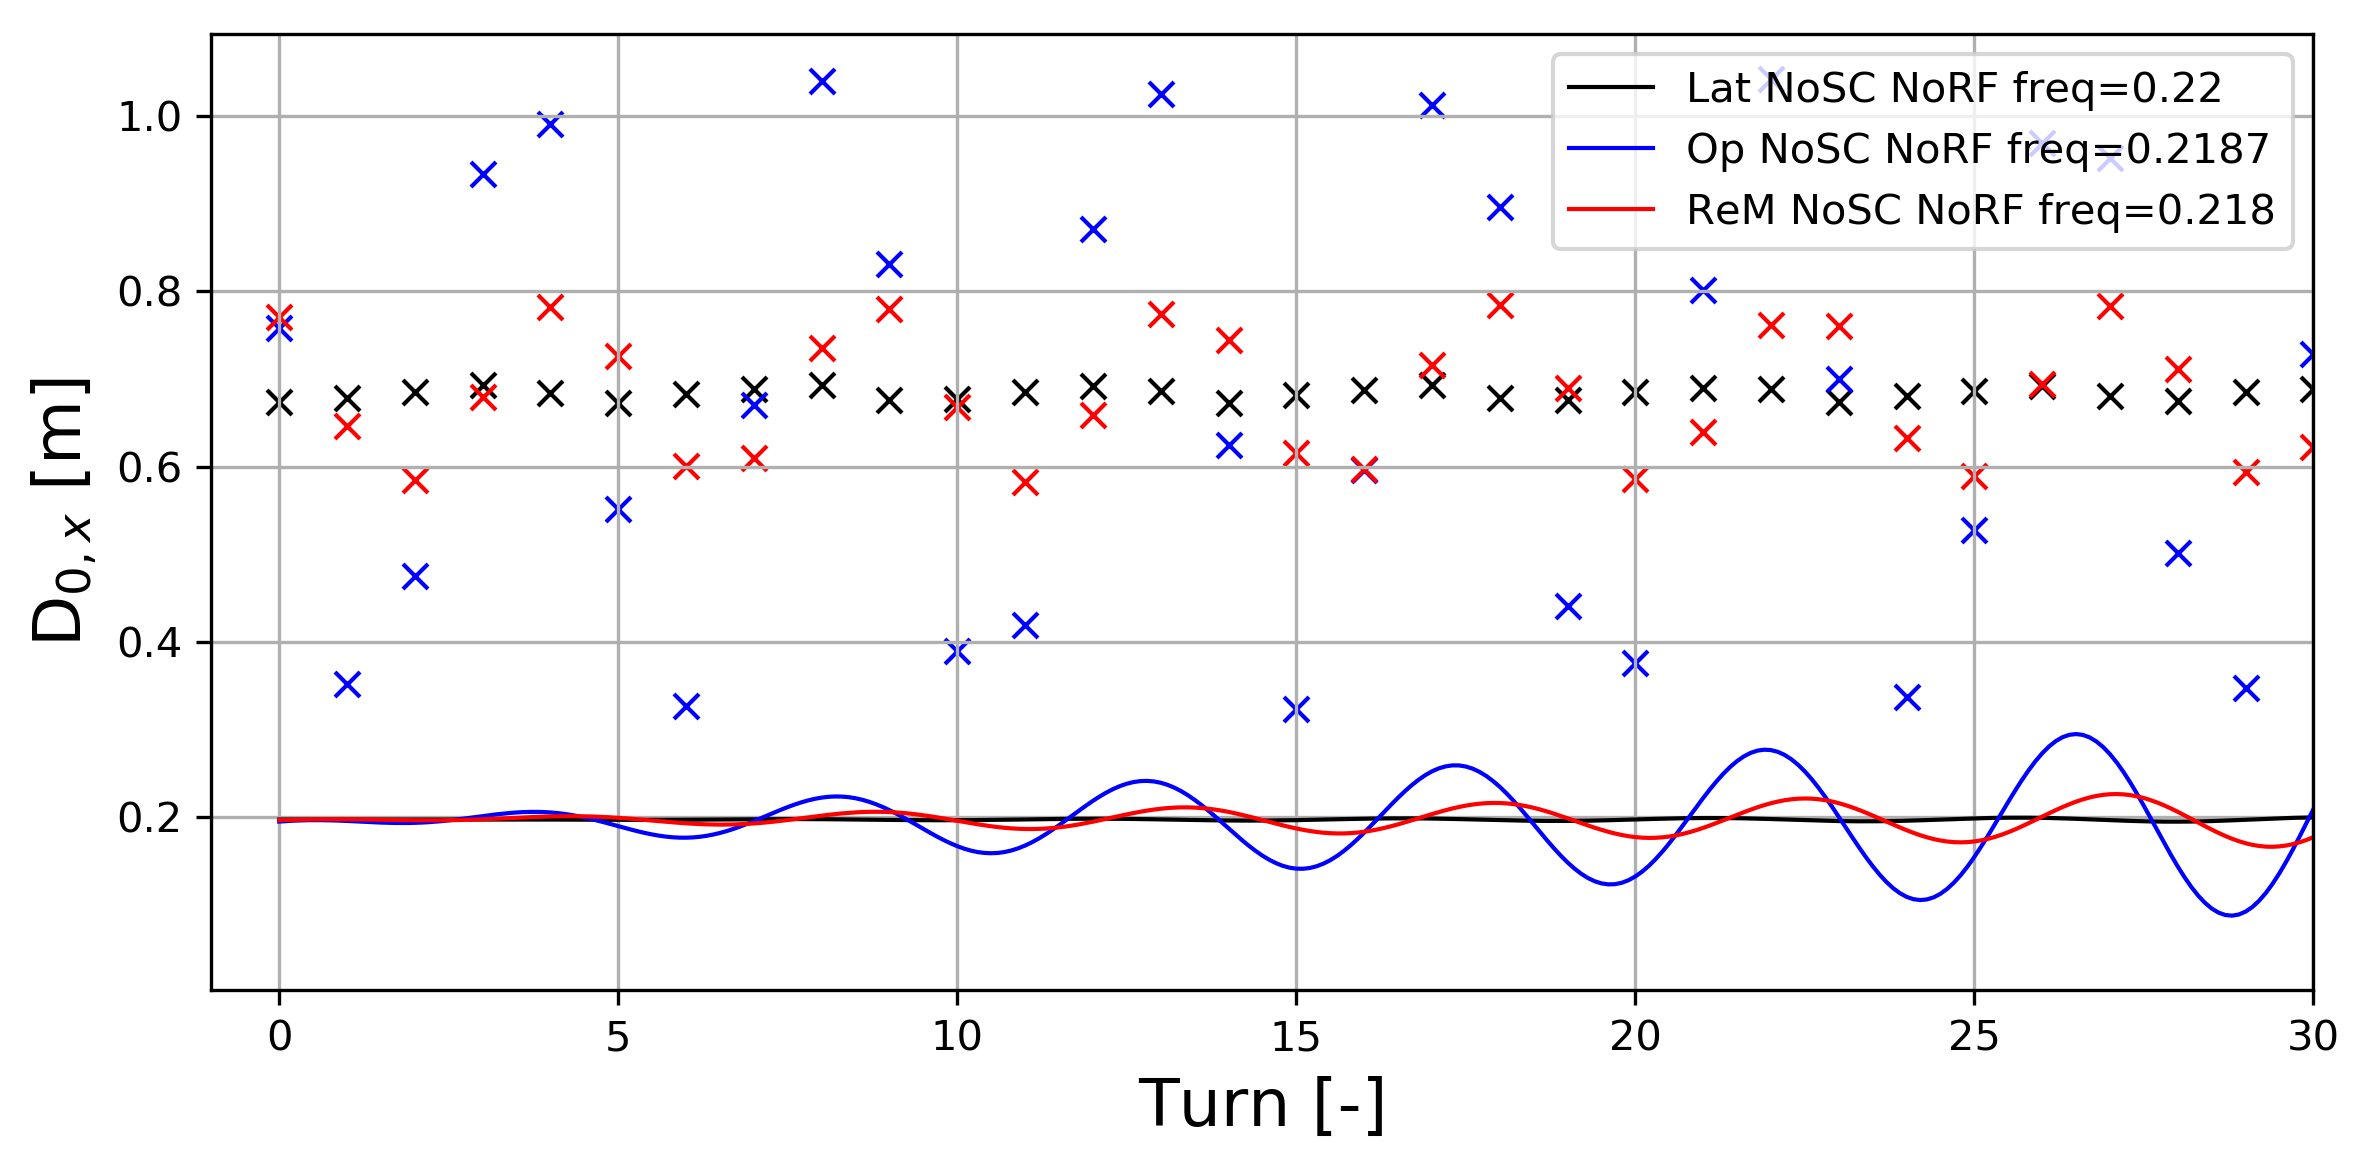

In [9]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

turns_fine = np.arange(0, 40, 0.1)

y_Lat = (dd1['Lat NoSC NoRF']['D_x'][0]-np.mean(dd1['Lat NoSC NoRF']['D_x'][0]))
freq_Lat = pnf.naff(y_Lat, turns=40, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Lat = 'Lat NoSC NoRF freq=' + str(round_sig(freq_Lat))

y_Op = (dd1['Op NoSC NoRF']['D_x'][0]-np.mean(dd1['Op NoSC NoRF']['D_x'][0]))
freq_Op = pnf.naff(y_Op, turns=40, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_Op = 'Op NoSC NoRF freq=' + str(round_sig(freq_Op))

y_ReM = (dd1['ReM NoSC NoRF']['D_x'][0]-np.mean(dd1['ReM NoSC NoRF']['D_x'][0]))
freq_ReM = pnf.naff(y_ReM, turns=40, nterms=1, skipTurns=0, getFullSpectrum=False, window=1)[0][1]
lab_ReM = 'ReM NoSC NoRF freq=' + str(round_sig(freq_ReM))

bet_Lat = np.sqrt(np.mean(dd1['Lat NoSC NoRF']['beta_x'][0]))
bet_Op = np.sqrt(np.mean(dd1['Op NoSC NoRF']['beta_x'][0]))
bet_ReM = np.sqrt(np.mean(dd1['ReM NoSC NoRF']['beta_x'][0]))
print bet_Lat
print bet_Op
print bet_ReM

popt_Lat, pcov_Lat = curve_fit(Md_ramp_fit, dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0]/np.sqrt(dd1['Lat NoSC NoRF']['beta_x'][0]), method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Lat NoSC NoRF']['turn'][0]+1, dd1['Lat NoSC NoRF']['D_x'][0]/np.sqrt(dd1['Lat NoSC NoRF']['beta_x'][0]), marker = 'x', color = 'k')
plt.plot(turns_fine, Md_ramp_fit(turns_fine, popt_Lat[0], popt_Lat[1], popt_Lat[2], popt_Lat[3])/bet_Lat,'k',label = lab_Lat)
#plt.plot([dd1['Lat NoSC NoRF']['turn'][0][0]+1, dd1['Lat NoSC NoRF']['turn'][0][-1]], [popt_Lat[0],popt_Lat[0]],'--k')

popt_Op, pcov_Op = curve_fit(Md_ramp_fit, dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0]/np.sqrt(dd1['Op NoSC NoRF']['beta_x'][0]), method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['Op NoSC NoRF']['turn'][0]+1, dd1['Op NoSC NoRF']['D_x'][0]/np.sqrt(dd1['Op NoSC NoRF']['beta_x'][0]), marker = 'x', color = 'b')
plt.plot(turns_fine, Md_ramp_fit(turns_fine, popt_Op[0], popt_Op[1], popt_Op[2], popt_Op[3])/bet_Op,'b',label = lab_Op)
#plt.plot([dd1['Op NoSC NoRF']['turn'][0][0]+1, dd1['Op NoSC NoRF']['turn'][0][-1]], [popt_Op[0],popt_Op[0]],'--b')

popt_ReM, pcov_ReM = curve_fit(Md_ramp_fit, dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0]/np.sqrt(dd1['ReM NoSC NoRF']['beta_x'][0]), method = 'trf', bounds =((0,0,1.3,-np.inf),(5,5,1.4,np.inf)))
plt.scatter(dd1['ReM NoSC NoRF']['turn'][0]+1, dd1['ReM NoSC NoRF']['D_x'][0]/np.sqrt(dd1['ReM NoSC NoRF']['beta_x'][0]), marker = 'x', color = 'r')
plt.plot(turns_fine, Md_ramp_fit(turns_fine, popt_ReM[0], popt_ReM[1], popt_ReM[2], popt_ReM[3])/bet_ReM,'r',label = lab_ReM)
#plt.plot([dd1['ReM NoSC NoRF']['turn'][0][0]+1, dd1['ReM NoSC NoRF']['turn'][0][-1]], [popt_ReM[0],popt_ReM[0]],'--r')


plt.xlabel('Turn [-]')
plt.ylabel(r'D$_{0,x}$ [m]')
#plt.title('PI.BSG52')
plt.xlim((-1, 30))
#plt.ylim((1, 4))
plt.grid()
plt.legend(loc = 1, prop=dict(size=10))

ax1 = plt.gca()
#ax1.xaxis.set_major_locator(matplotlib.ticker.MaxNLocator(integer=True))

ax1.xaxis.label.set_fontsize(16)
ax1.yaxis.label.set_fontsize(16)

plt.tight_layout()

plt.savefig('Dx_NoSC_NoRF_Oscillation.png', dpi = 600) 

# Vertical Scan No Space Charge

In [61]:
# Create dd dictionary
dd1 = dict()

dd1 = add_input_file(dd1, '01_Lattice_NoSC_NoRF/output/output.mat', 'Lat NoSC NoRF')
#dd1 = add_input_file(dd1, '02_Op_NoSC_NoRF/output/output.mat', 'Op NoSC NoRF')
#dd1 = add_input_file(dd1, '03_ReM_NoSC_NoRF/output/output.mat', 'ReM NoSC NoRF')
dd1 = add_input_file(dd1, '04_Lattice_SC_NoRF/output/output.mat', 'Lat SC NoRF')
#dd1 = add_input_file(dd1, '05_ReM_SC_NoRF/output/output.mat', 'Op SC NoRF')
#dd1 = add_input_file(dd1, '06_ReM_SC_NoRF/output/output.mat', 'ReM SC NoRF')
dd1 = add_input_file(dd1, '07_Lattice_NoSC_RF/output/output.mat', 'Lat NoSC RF')
#dd1 = add_input_file(dd1, '08_Op_NoSC_RF/output/output.mat', 'Op NoSC RF')
#dd1 = add_input_file(dd1, '09_ReM_NoSC_RF/output/output.mat', 'ReM NoSC RF')
dd1 = add_input_file(dd1, '10_Lattice_SC_RF/output/output.mat', 'Lat SC RF')
#dd1 = add_input_file(dd1, '11_Op_SC_RF/output/output.mat', 'Op SC RF')
#dd1 = add_input_file(dd1, '12_ReM_SC_RF/output/output.mat', 'ReM SC RF')

sc = 'NoSC'
legend_label = r'Q$_y$'

main_label = 'Mini_Scan'
main_label2 = main_label + '_zoom'
scaled_label = main_label + '_scaled'
turn_tot = 40
zoom_turns = 15
betagamma = 2.492104532 * 0.9159915293879255

	Added output data from  01_Lattice_NoSC_NoRF/output/output.mat 	 dictionary key:  Lat NoSC NoRF
	Added output data from  04_Lattice_SC_NoRF/output/output.mat 	 dictionary key:  Lat SC NoRF
	Added output data from  07_Lattice_NoSC_RF/output/output.mat 	 dictionary key:  Lat NoSC RF
	Added output data from  10_Lattice_SC_RF/output/output.mat 	 dictionary key:  Lat SC RF


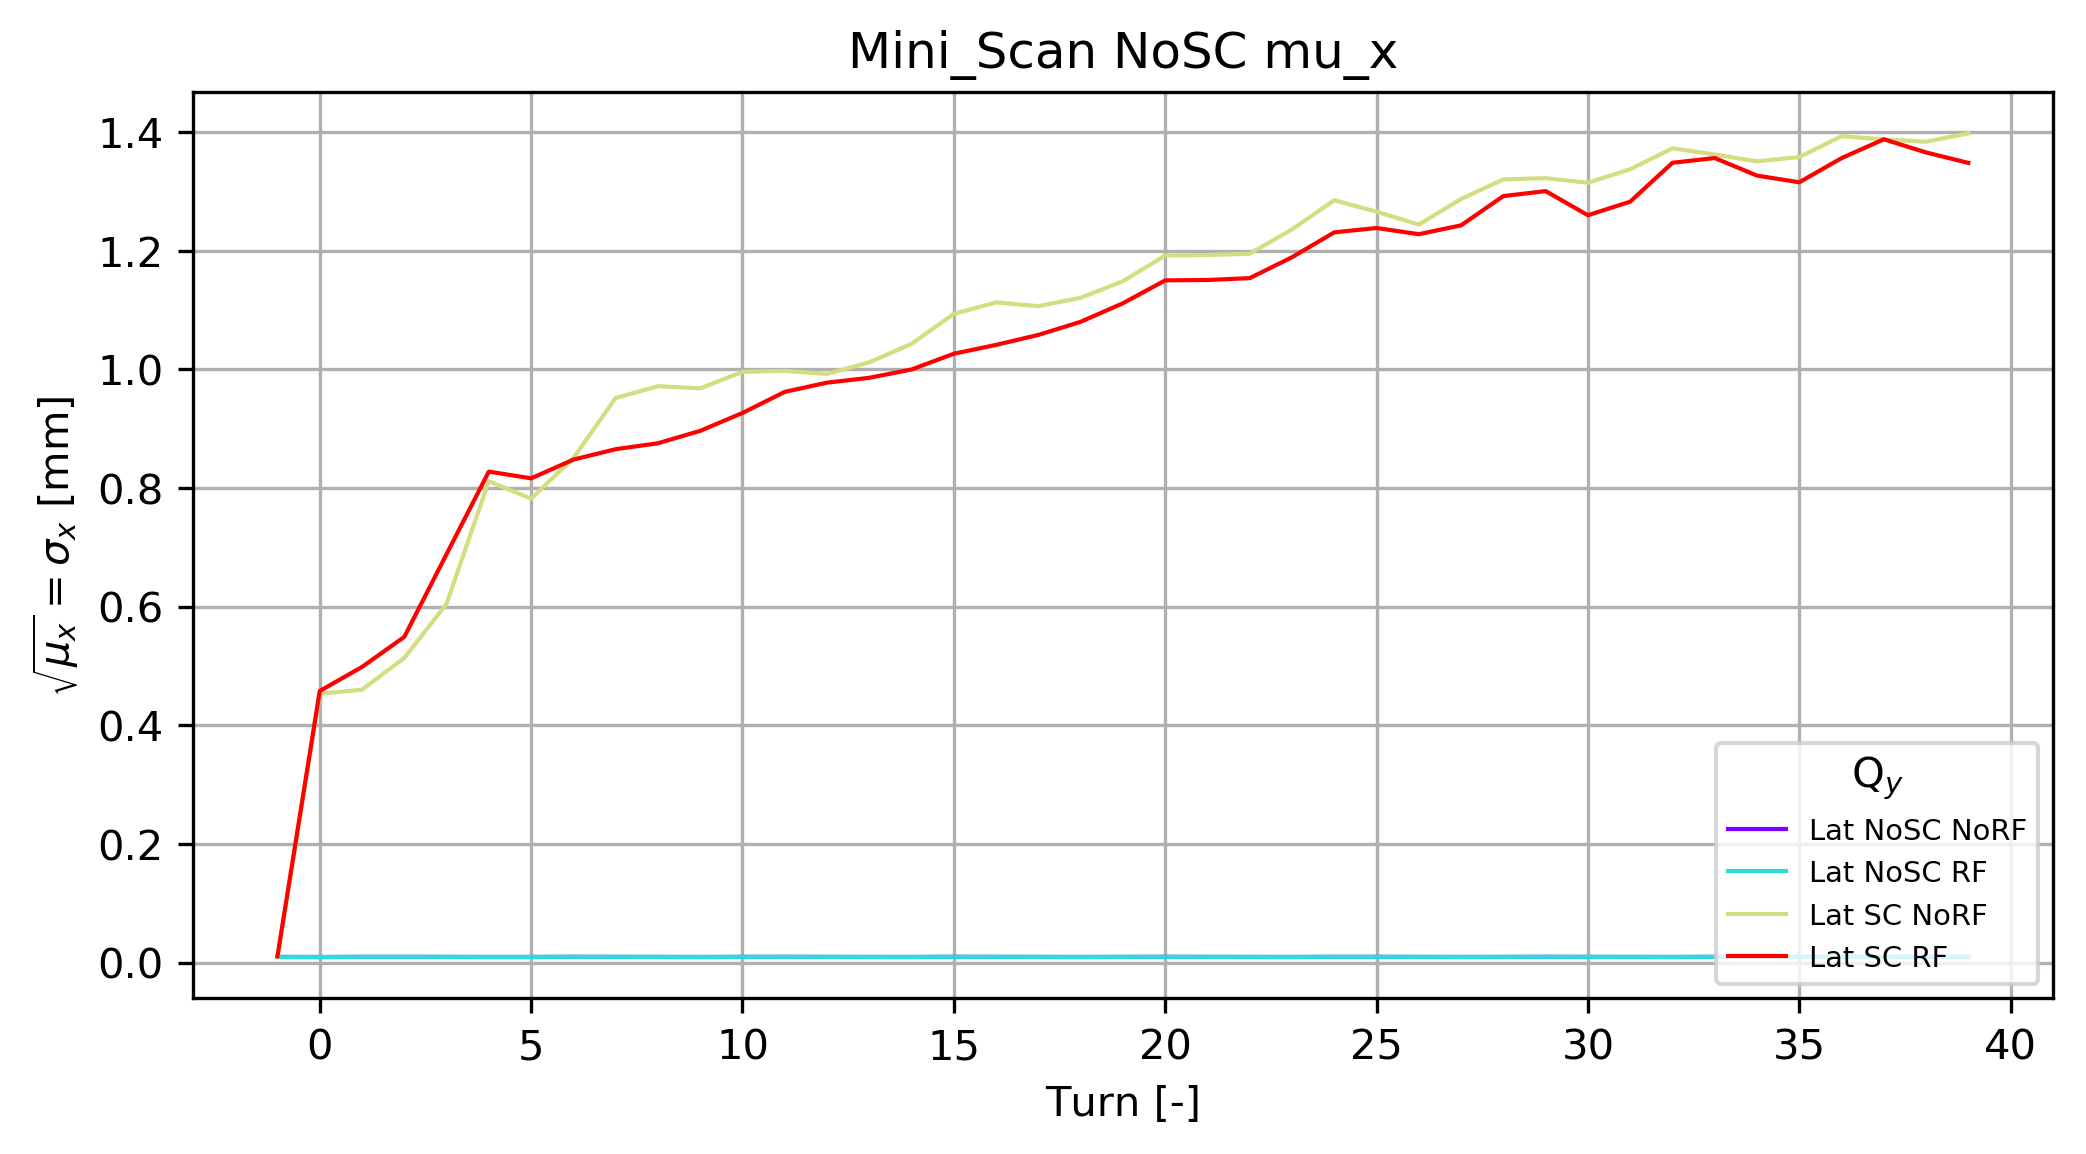

In [62]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_x} = \sigma_x$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,400)

parameter = 'sigma_x'
#savename = 'Plots/Param_' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

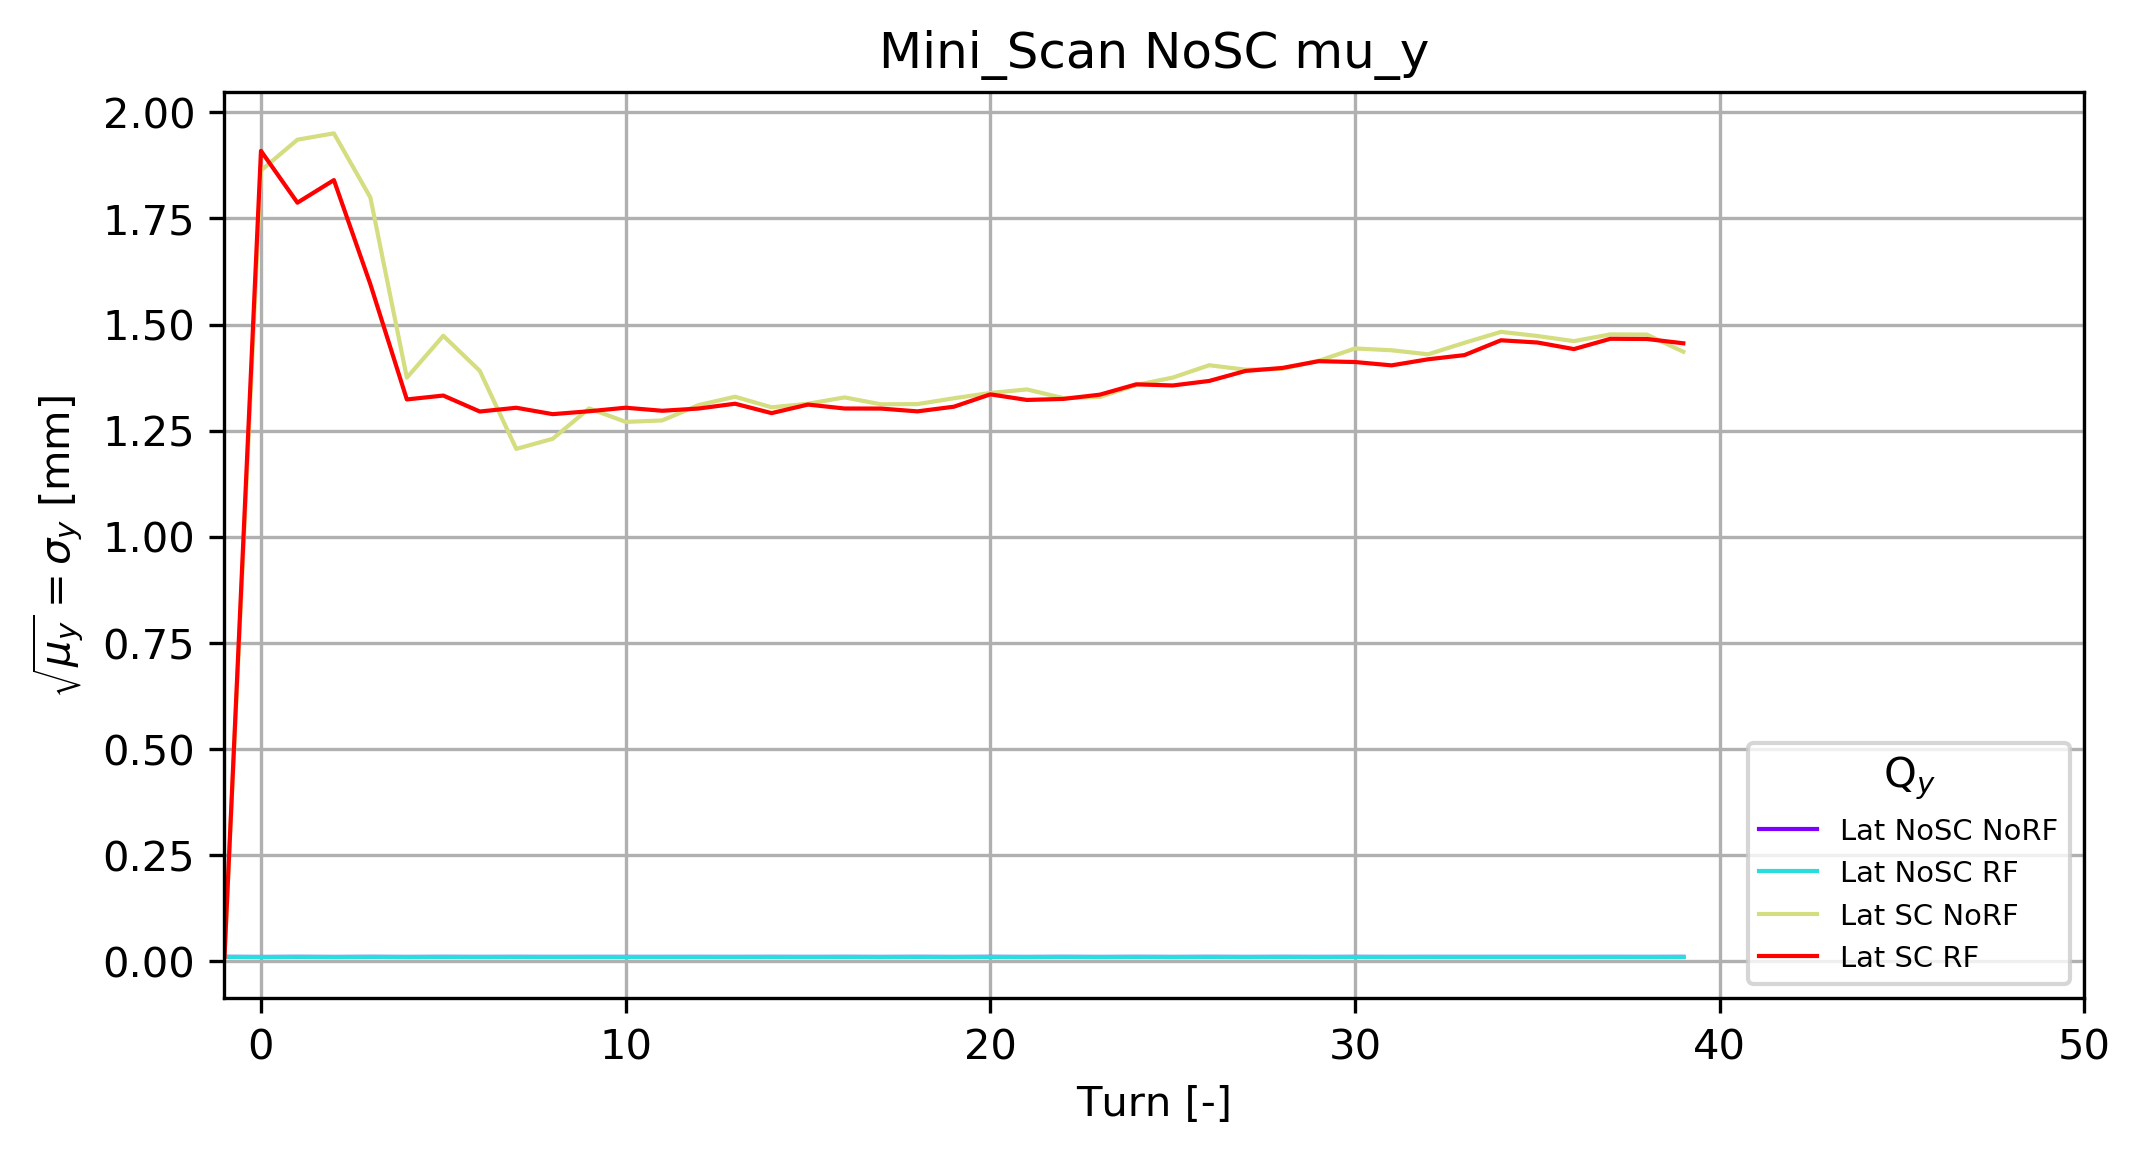

In [63]:
parameter = 'mu_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\sqrt{\mu_y} = \sigma_y$ [mm]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
ax1.set_xlim(-1,50)

parameter = 'sigma_y'
#savename = 'Plots/Param_' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

Started loop for tune  Lat NoSC NoRF


ValueError: #naff : Input data must be at least of length turns+1.

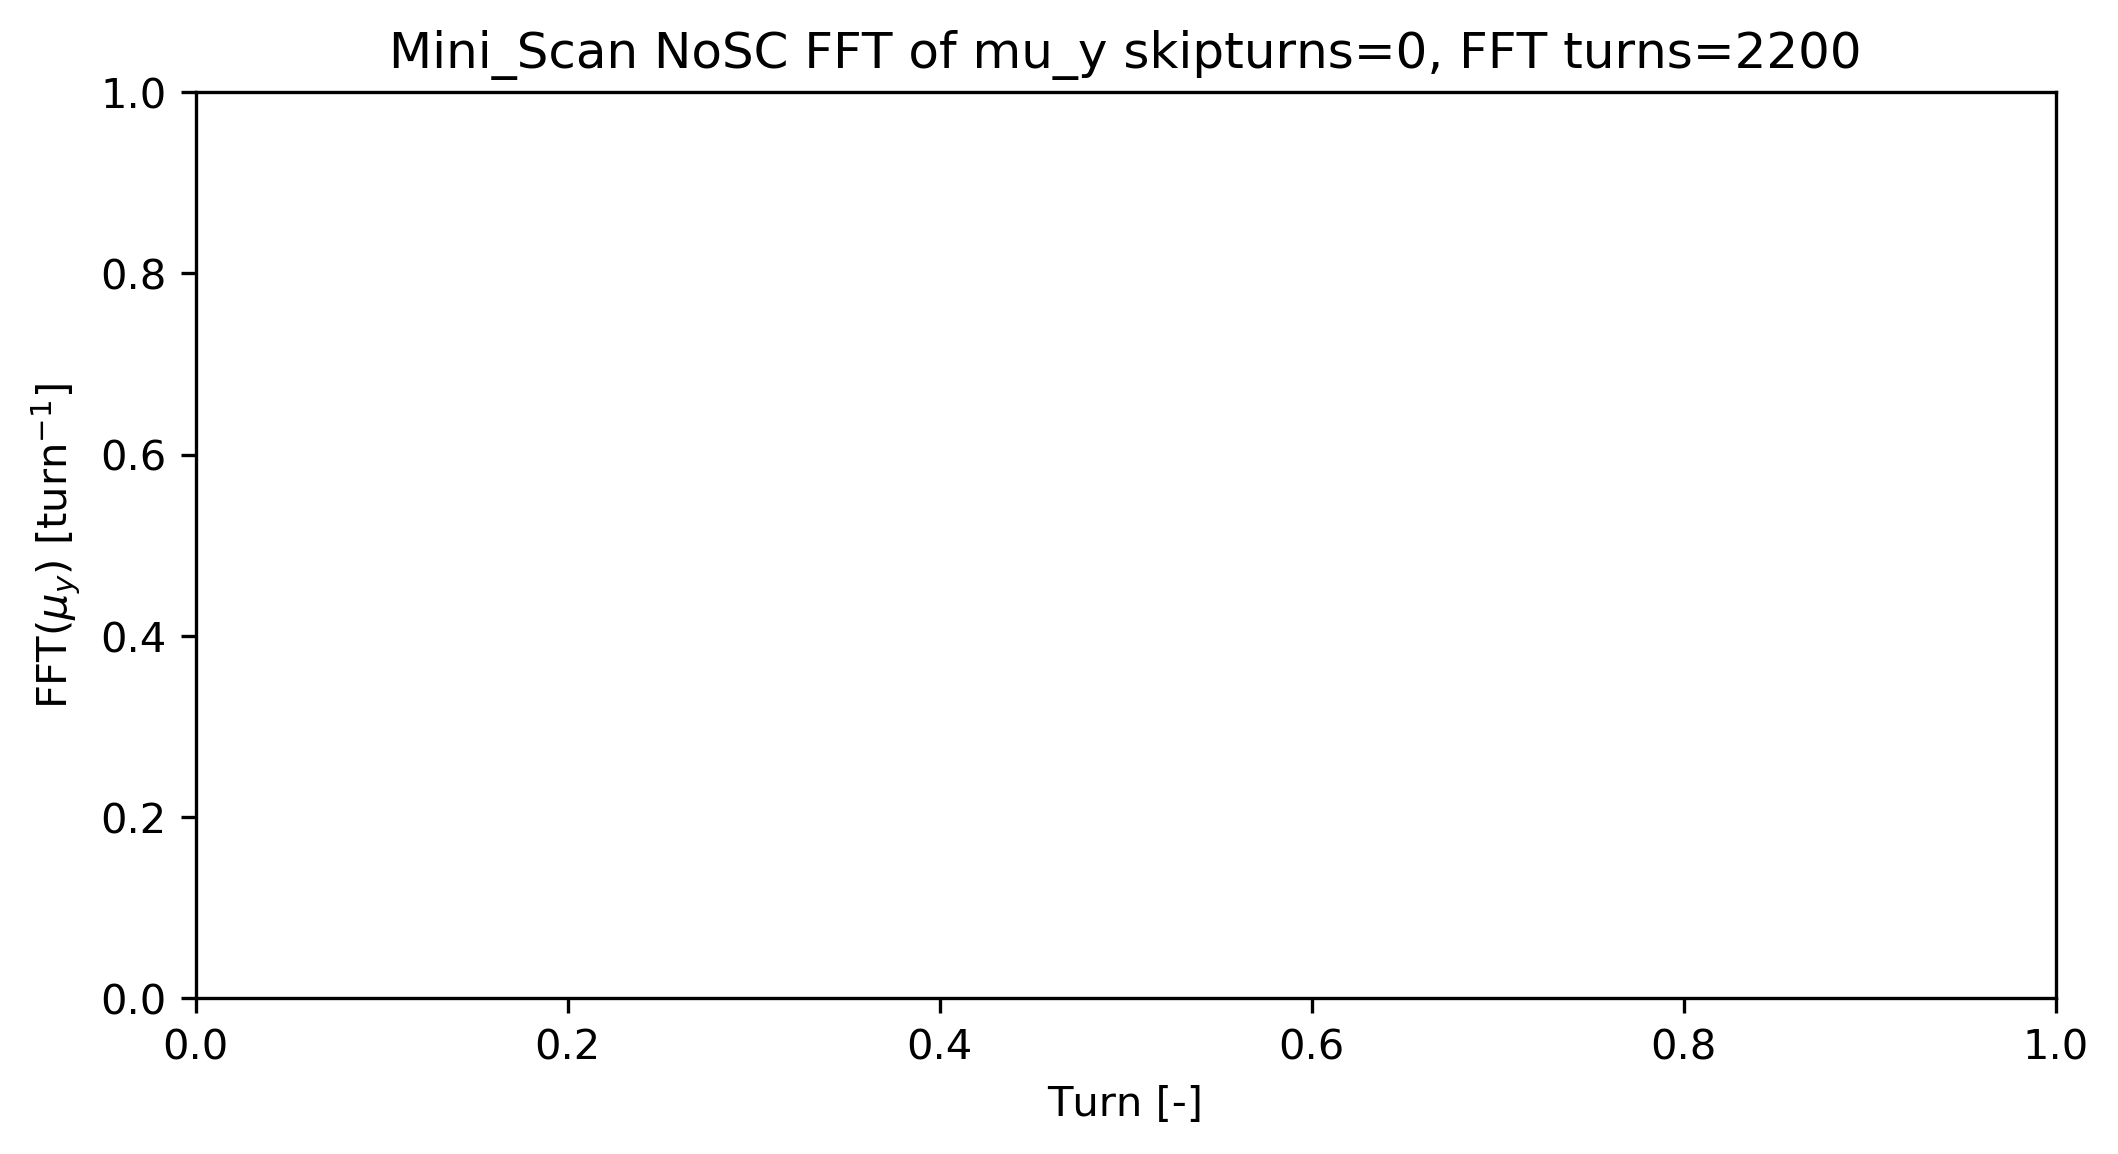

In [49]:
parameter = 'mu_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 2200
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\mu_y$) [turn$^{-1}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(float(key), freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = 'Plots/FFT_' + parameter + '_V.png'
#plt.savefig(savename, dpi = 800);






parameter = 'mu_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 2200
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\mu_y$) Period [turns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(float(key), 1/freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = 'Plots/FFT_' + parameter + '_V_period.png'
#plt.savefig(savename, dpi = 800);





parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 2200
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\mu_x$) [turn$^{-1}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(float(key), freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = 'Plots/FFT_' + parameter + '_V.png'
#plt.savefig(savename, dpi = 800);





parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 2200
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\mu_x$) Period [turns]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(float(key), 1/freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = 'Plots/FFT_' + parameter + '_V_Period.png'
#plt.savefig(savename, dpi = 800);







Started loop for tune  Lat NoSC NoRF
Started loop for tune  Lat NoSC RF
Started loop for tune  Lat SC NoRF
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).
Started loop for tune  Lat SC RF
## PyNAFF::naff: Remove the DC component from the data (i.e. the mean).


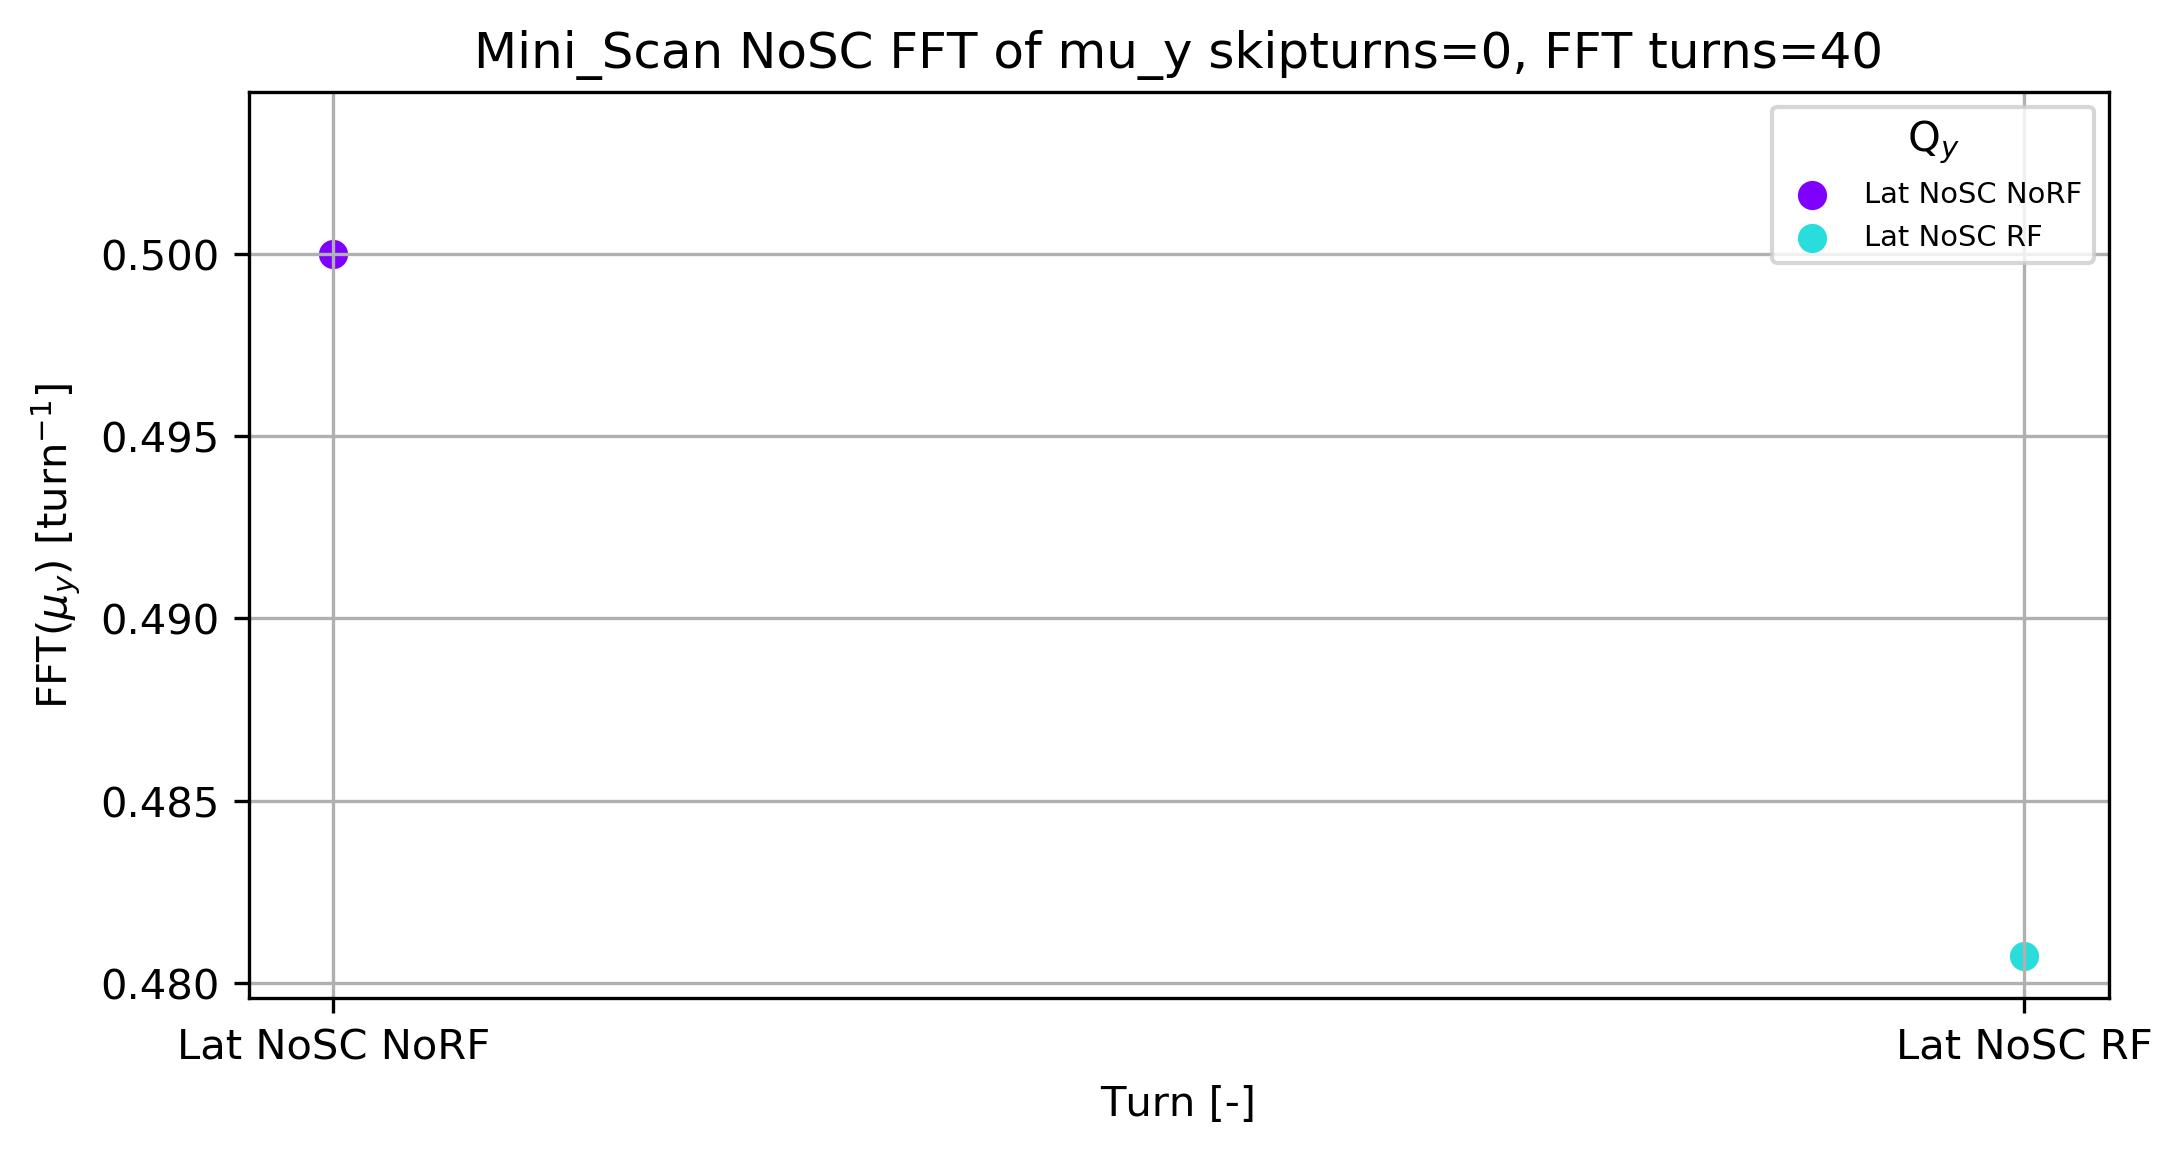

In [64]:
parameter = 'mu_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 40
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\mu_y$) [turn$^{-1}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(str(key), freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = 'Plots/FFT_' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

Started loop for tune  Lat NoSC NoRF
Started loop for tune  Lat NoSC RF
Started loop for tune  Lat SC NoRF
Started loop for tune  Lat SC RF


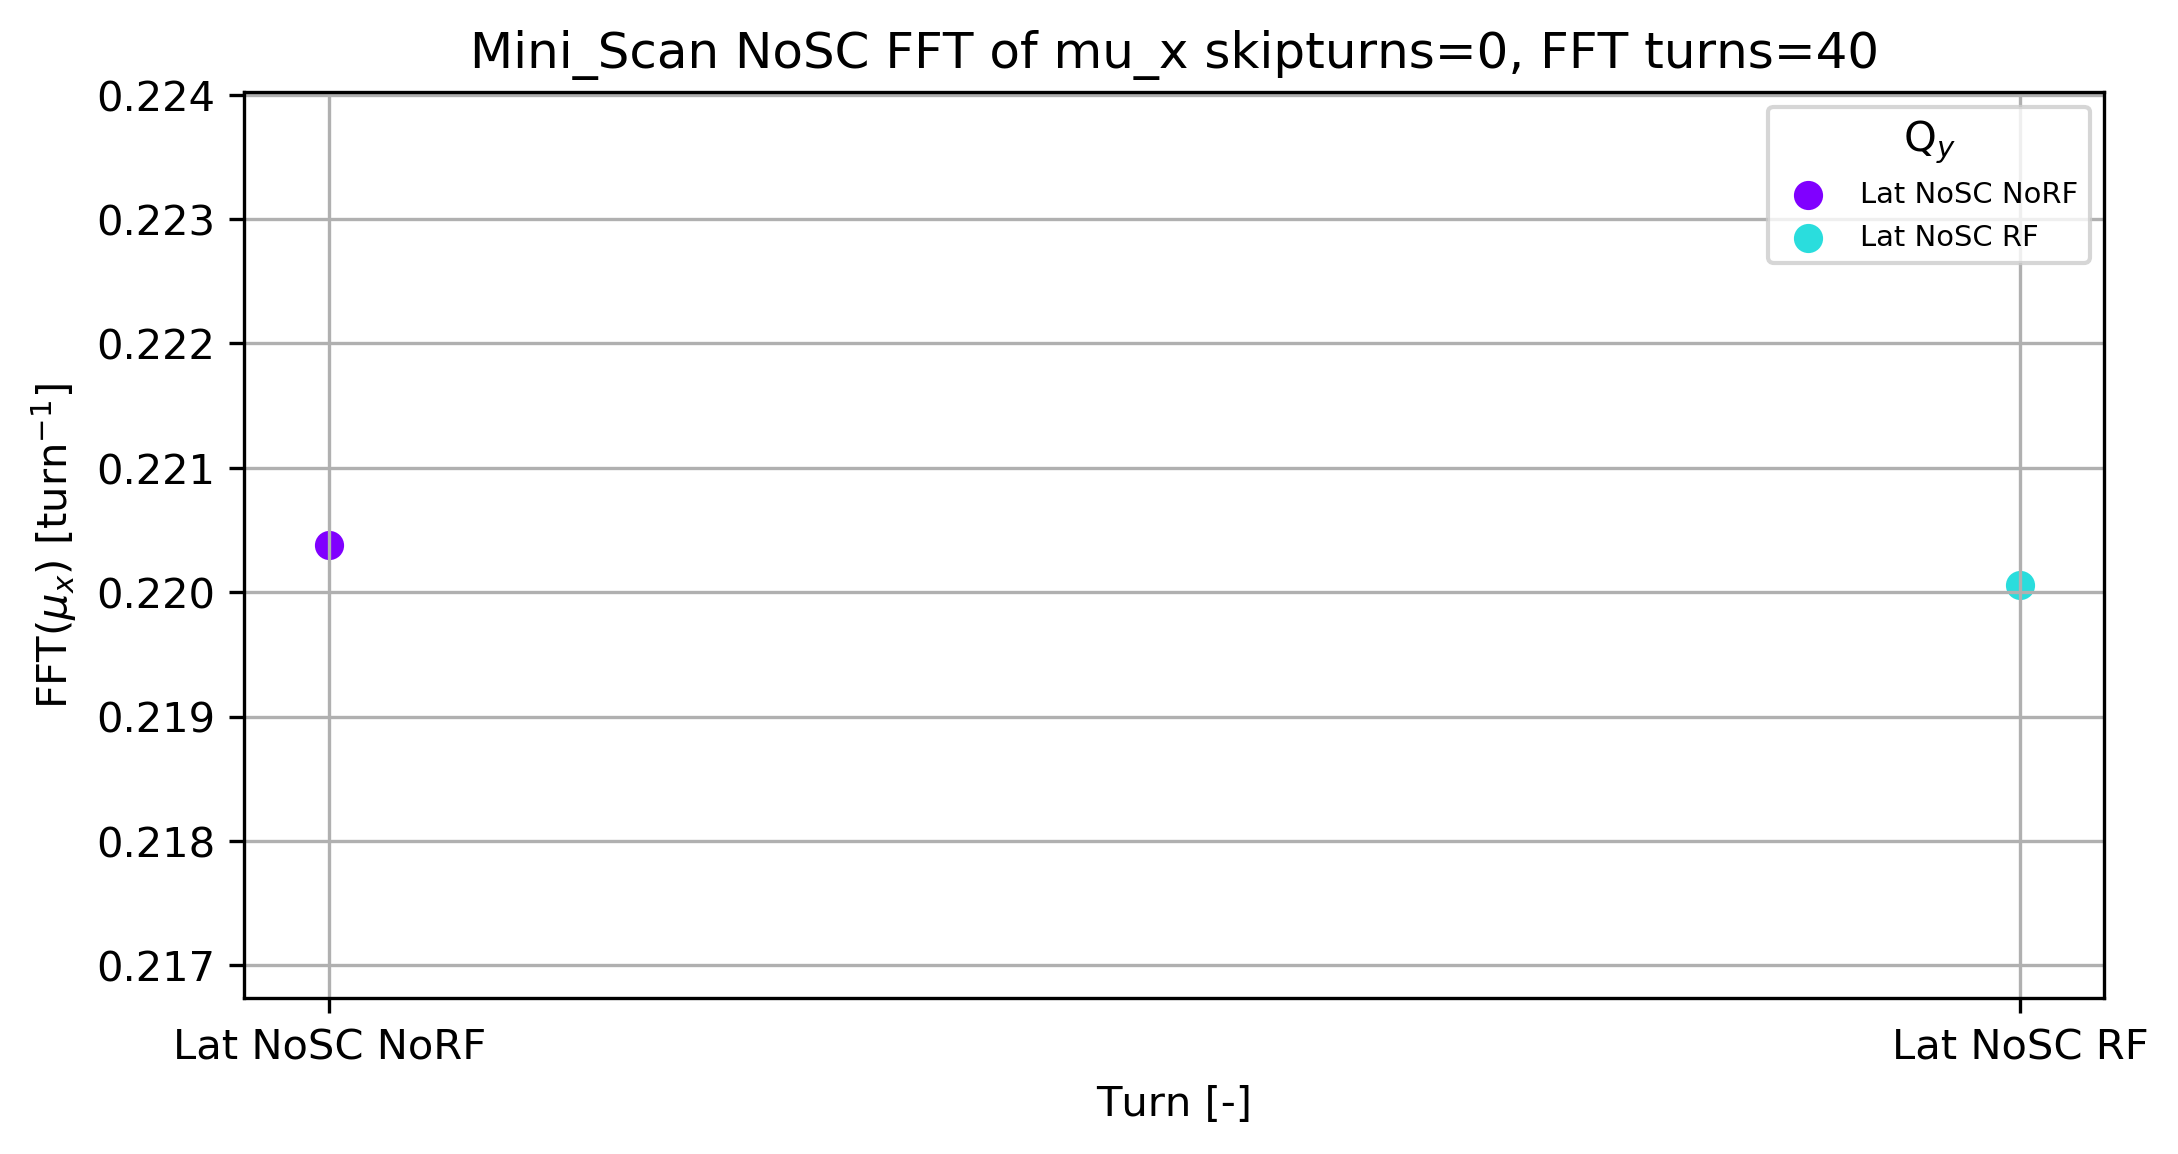

In [65]:
parameter = 'mu_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

trns = 40
skiptrns = 0
tit = main_label + ' ' + sc + ' FFT of ' + parameter + ' skipturns=' +str(skiptrns)+ ', FFT turns=' + str(trns)
ax1.set_title(tit);

ax1.set_ylabel(r'FFT($\mu_x$) [turn$^{-1}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
    print 'Started loop for tune ', key
    y = (dd1[key][parameter][0]-np.mean(dd1[key][parameter][0]))
    try:
        freq = pnf.naff(y, turns=trns, nterms=1, skipTurns=skiptrns, getFullSpectrum=False, window=1)[0][1]
        ax1.scatter(str(key), freq, label=str(key), color=colors[c_it])
    except IndexError:
        continue    
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,50)

#savename = 'Plots/FFT_' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

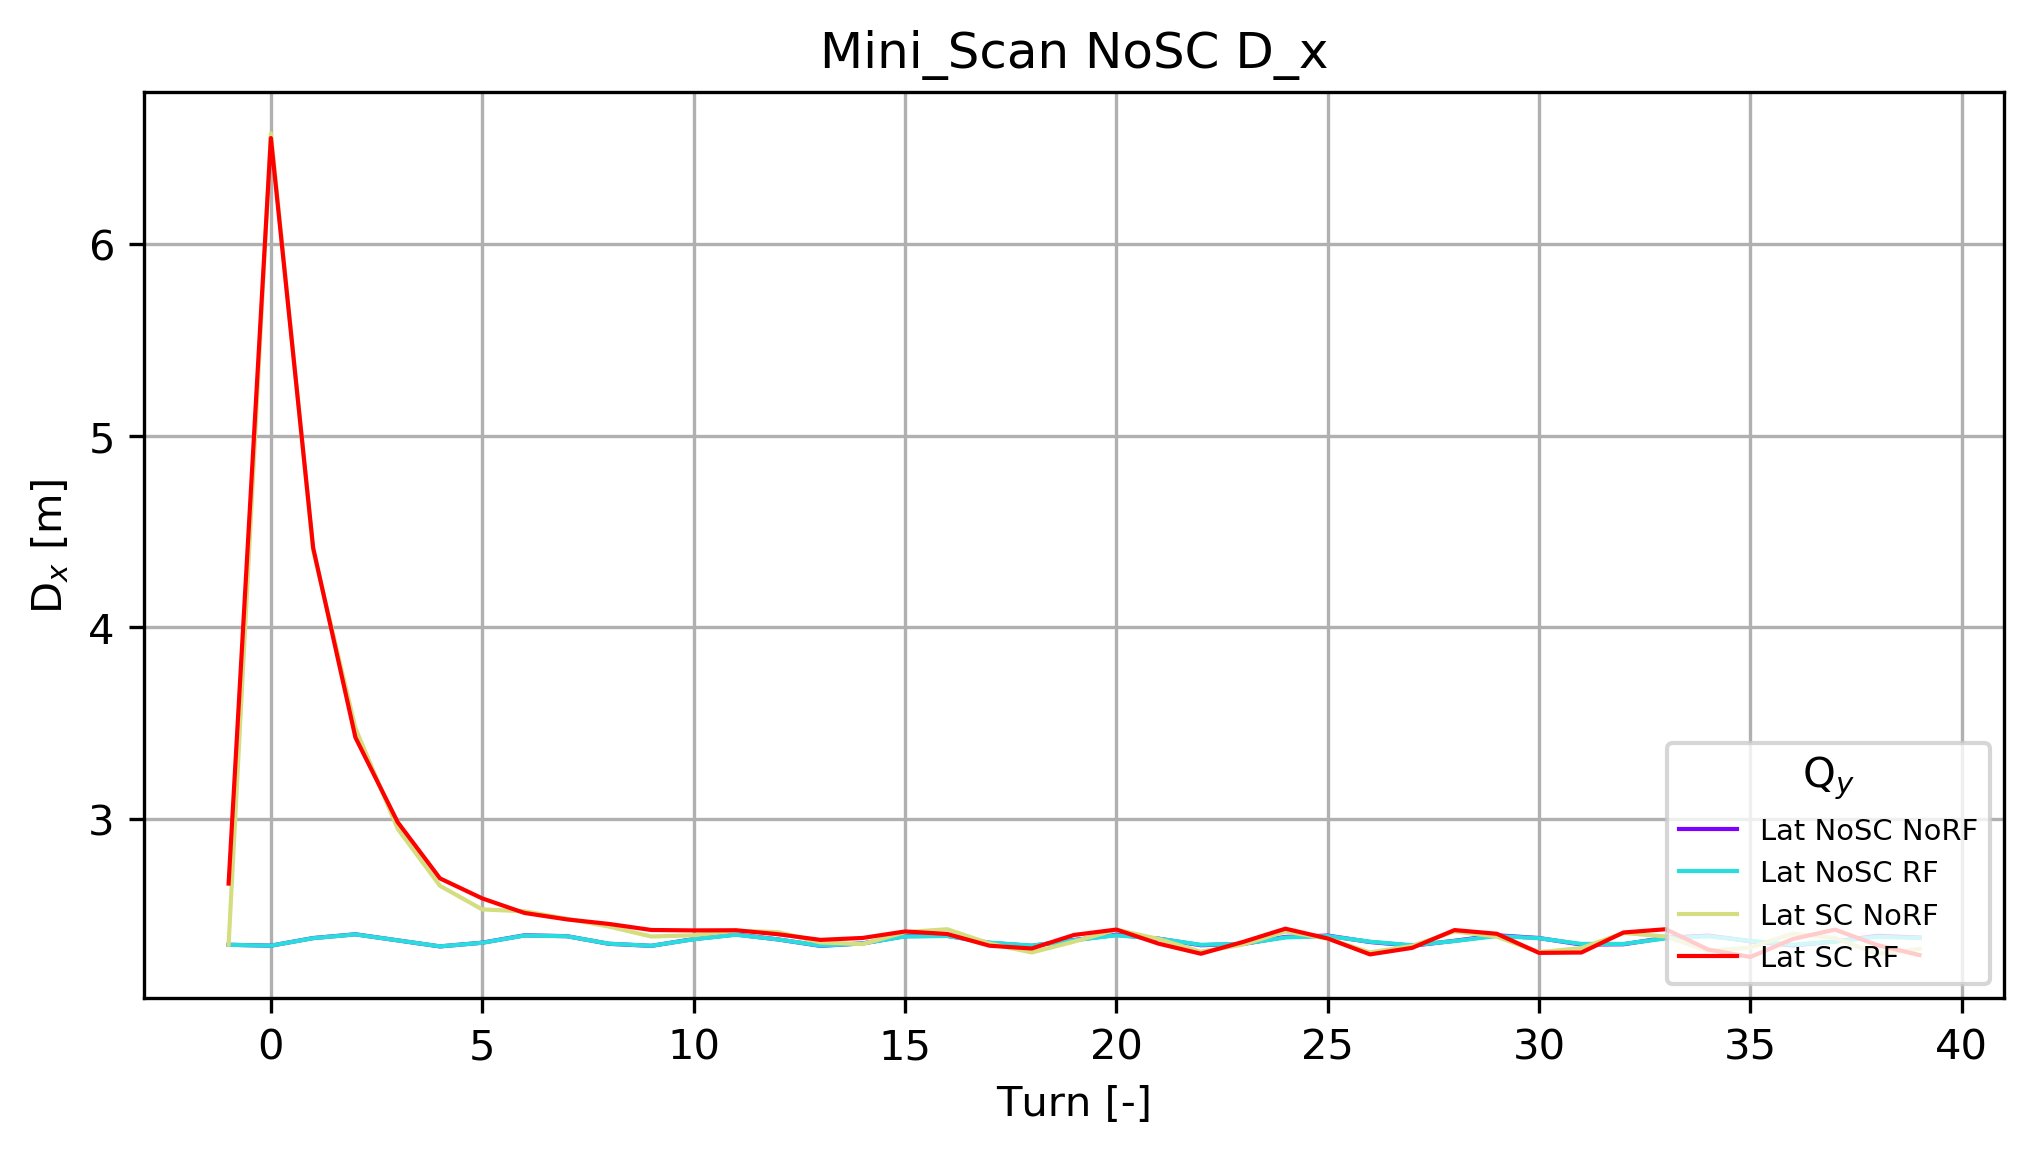

In [66]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()

#savename = 'Plots/' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

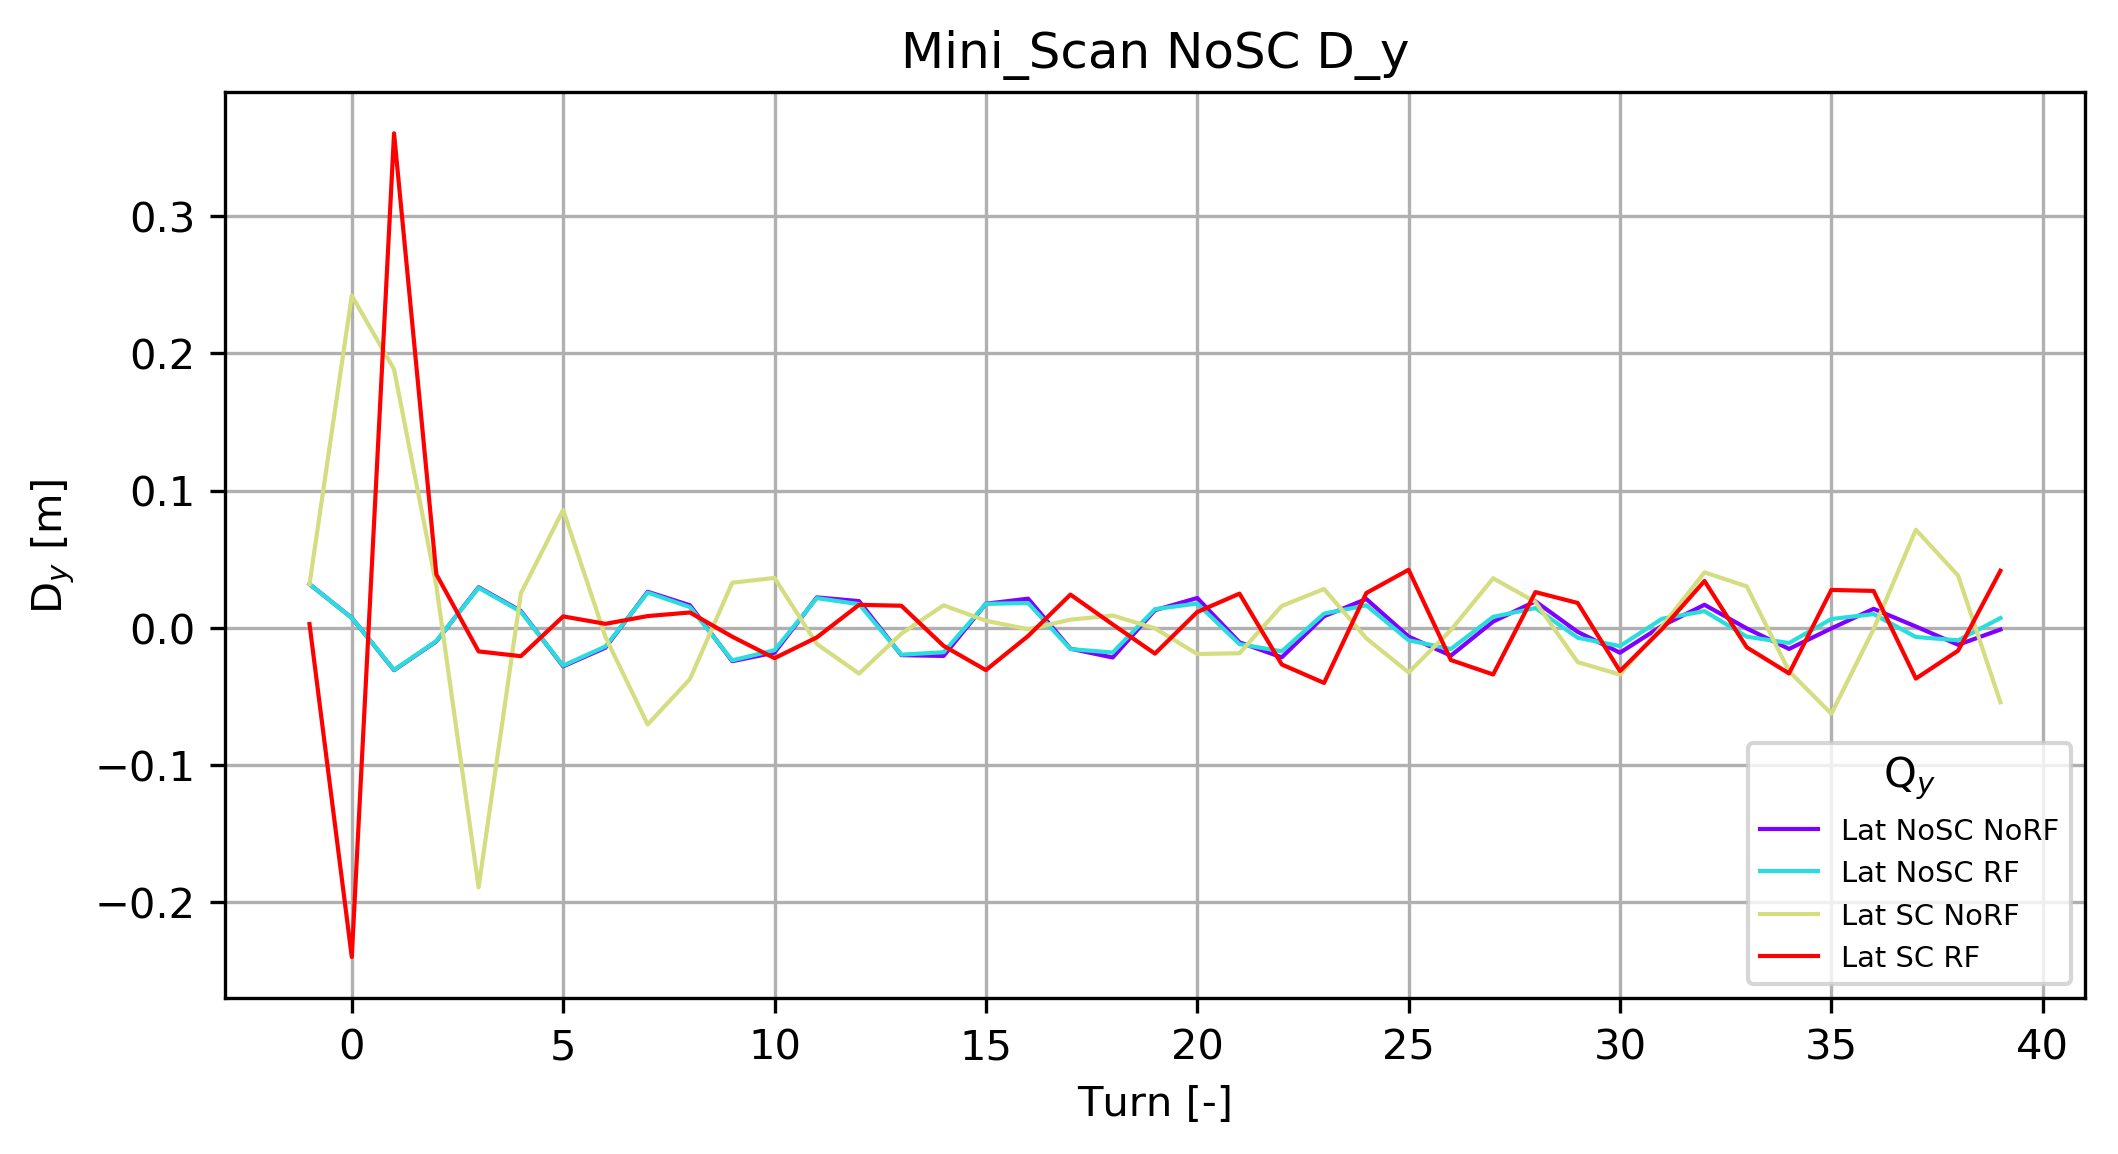

In [67]:
parameter = 'D_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'D$_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)

#savename = 'Plots/' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

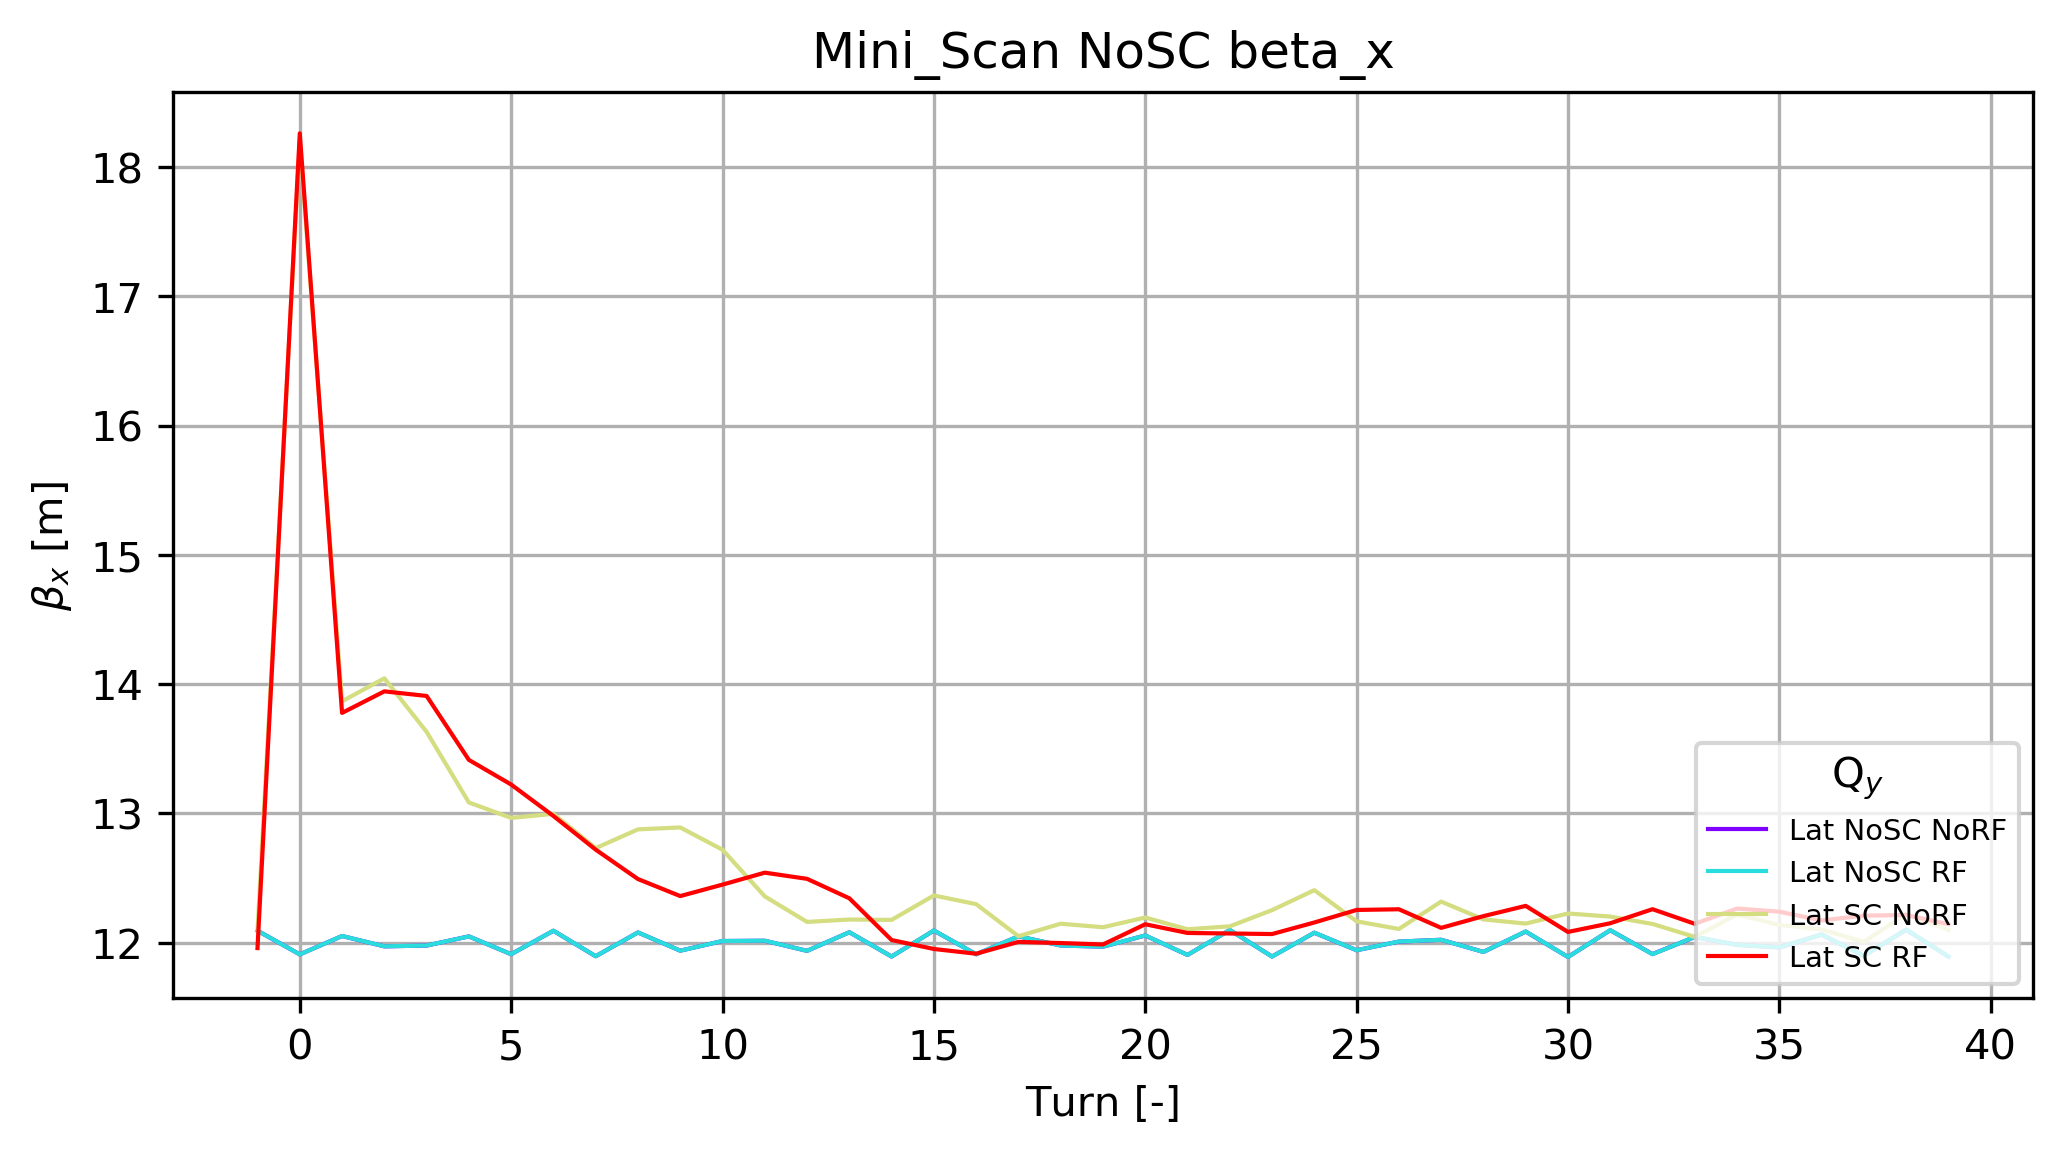

In [68]:
parameter = 'beta_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)

#savename = 'Plots/' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

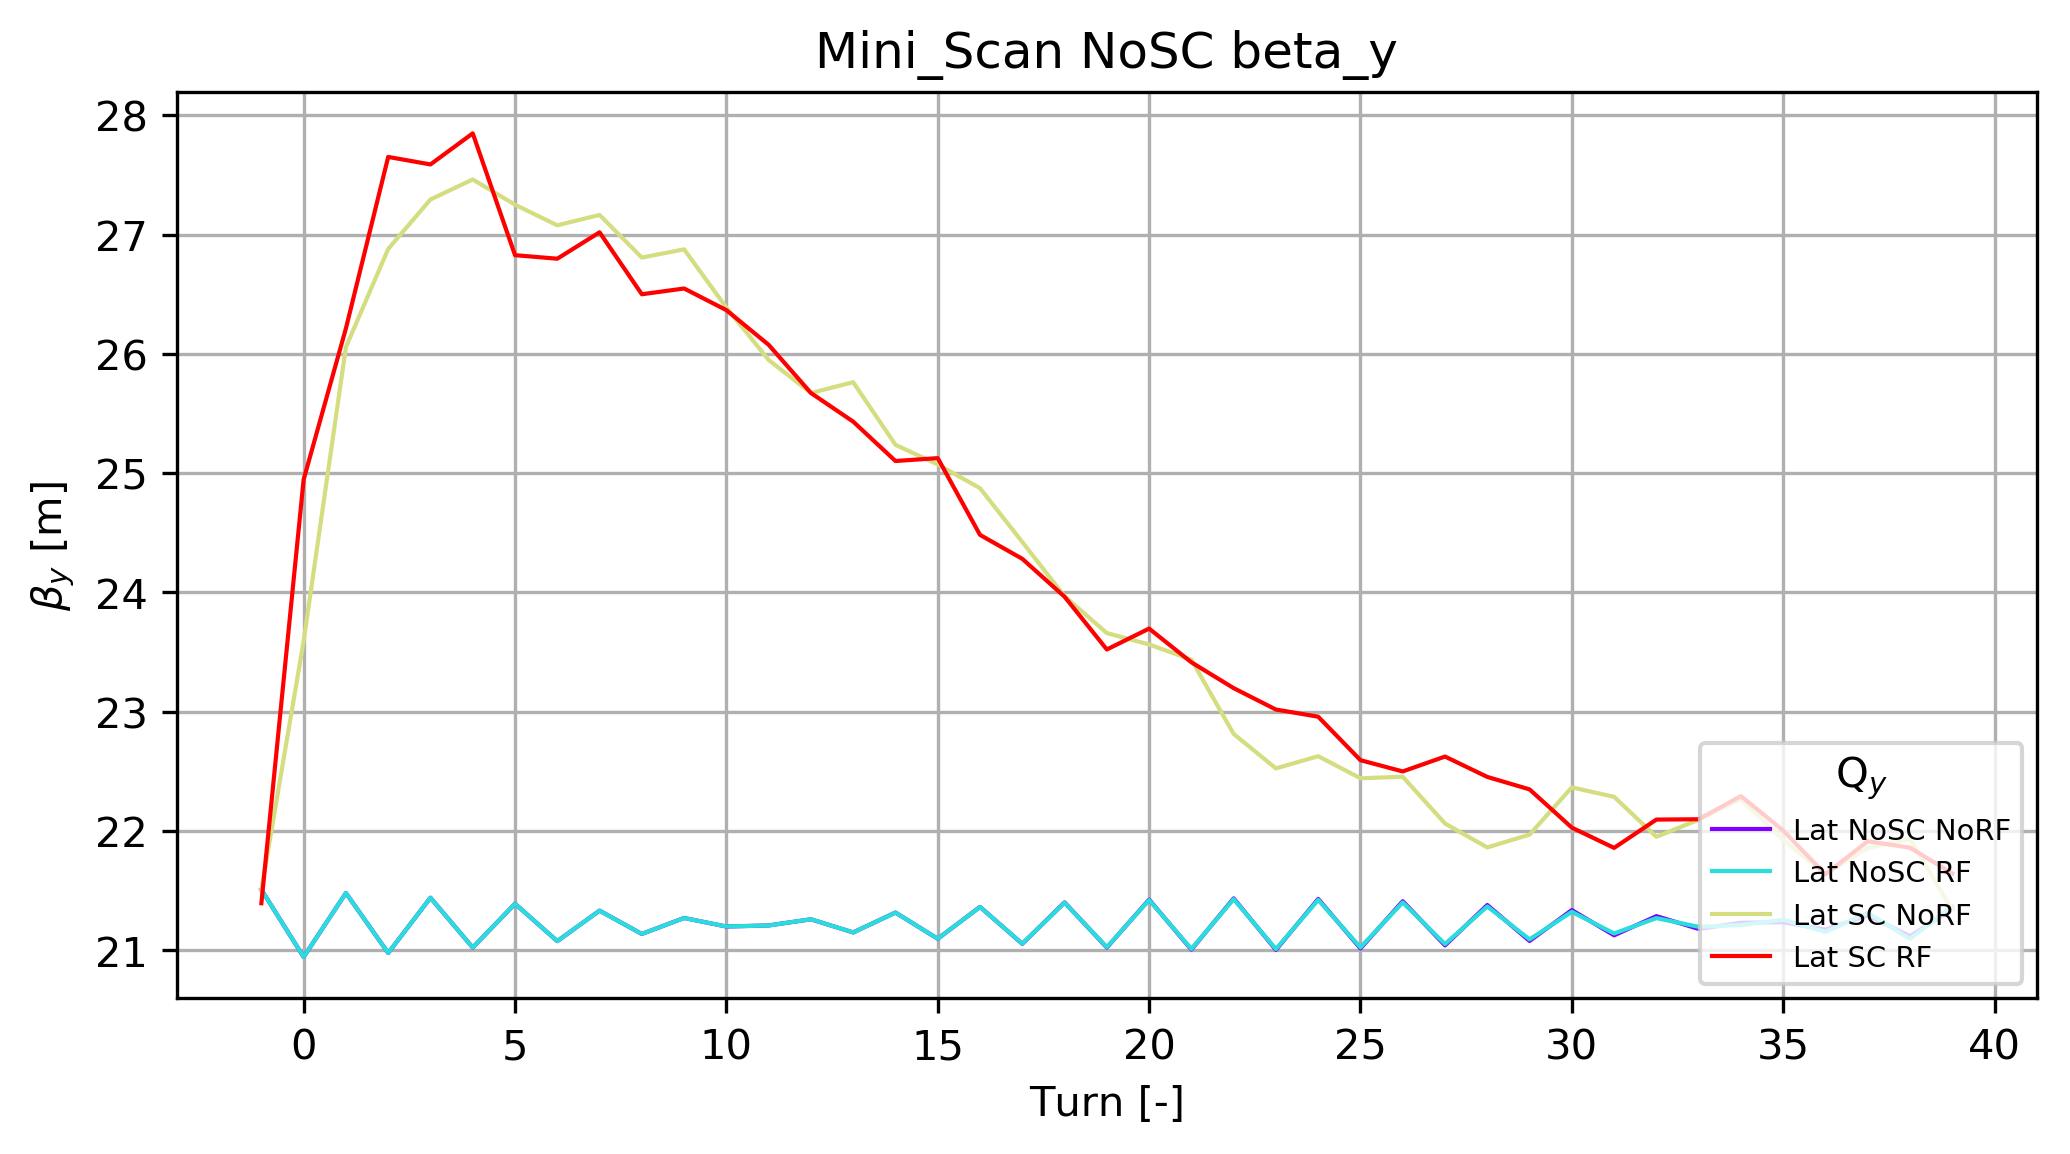

In [69]:
parameter = 'beta_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)

#savename = 'Plots/' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

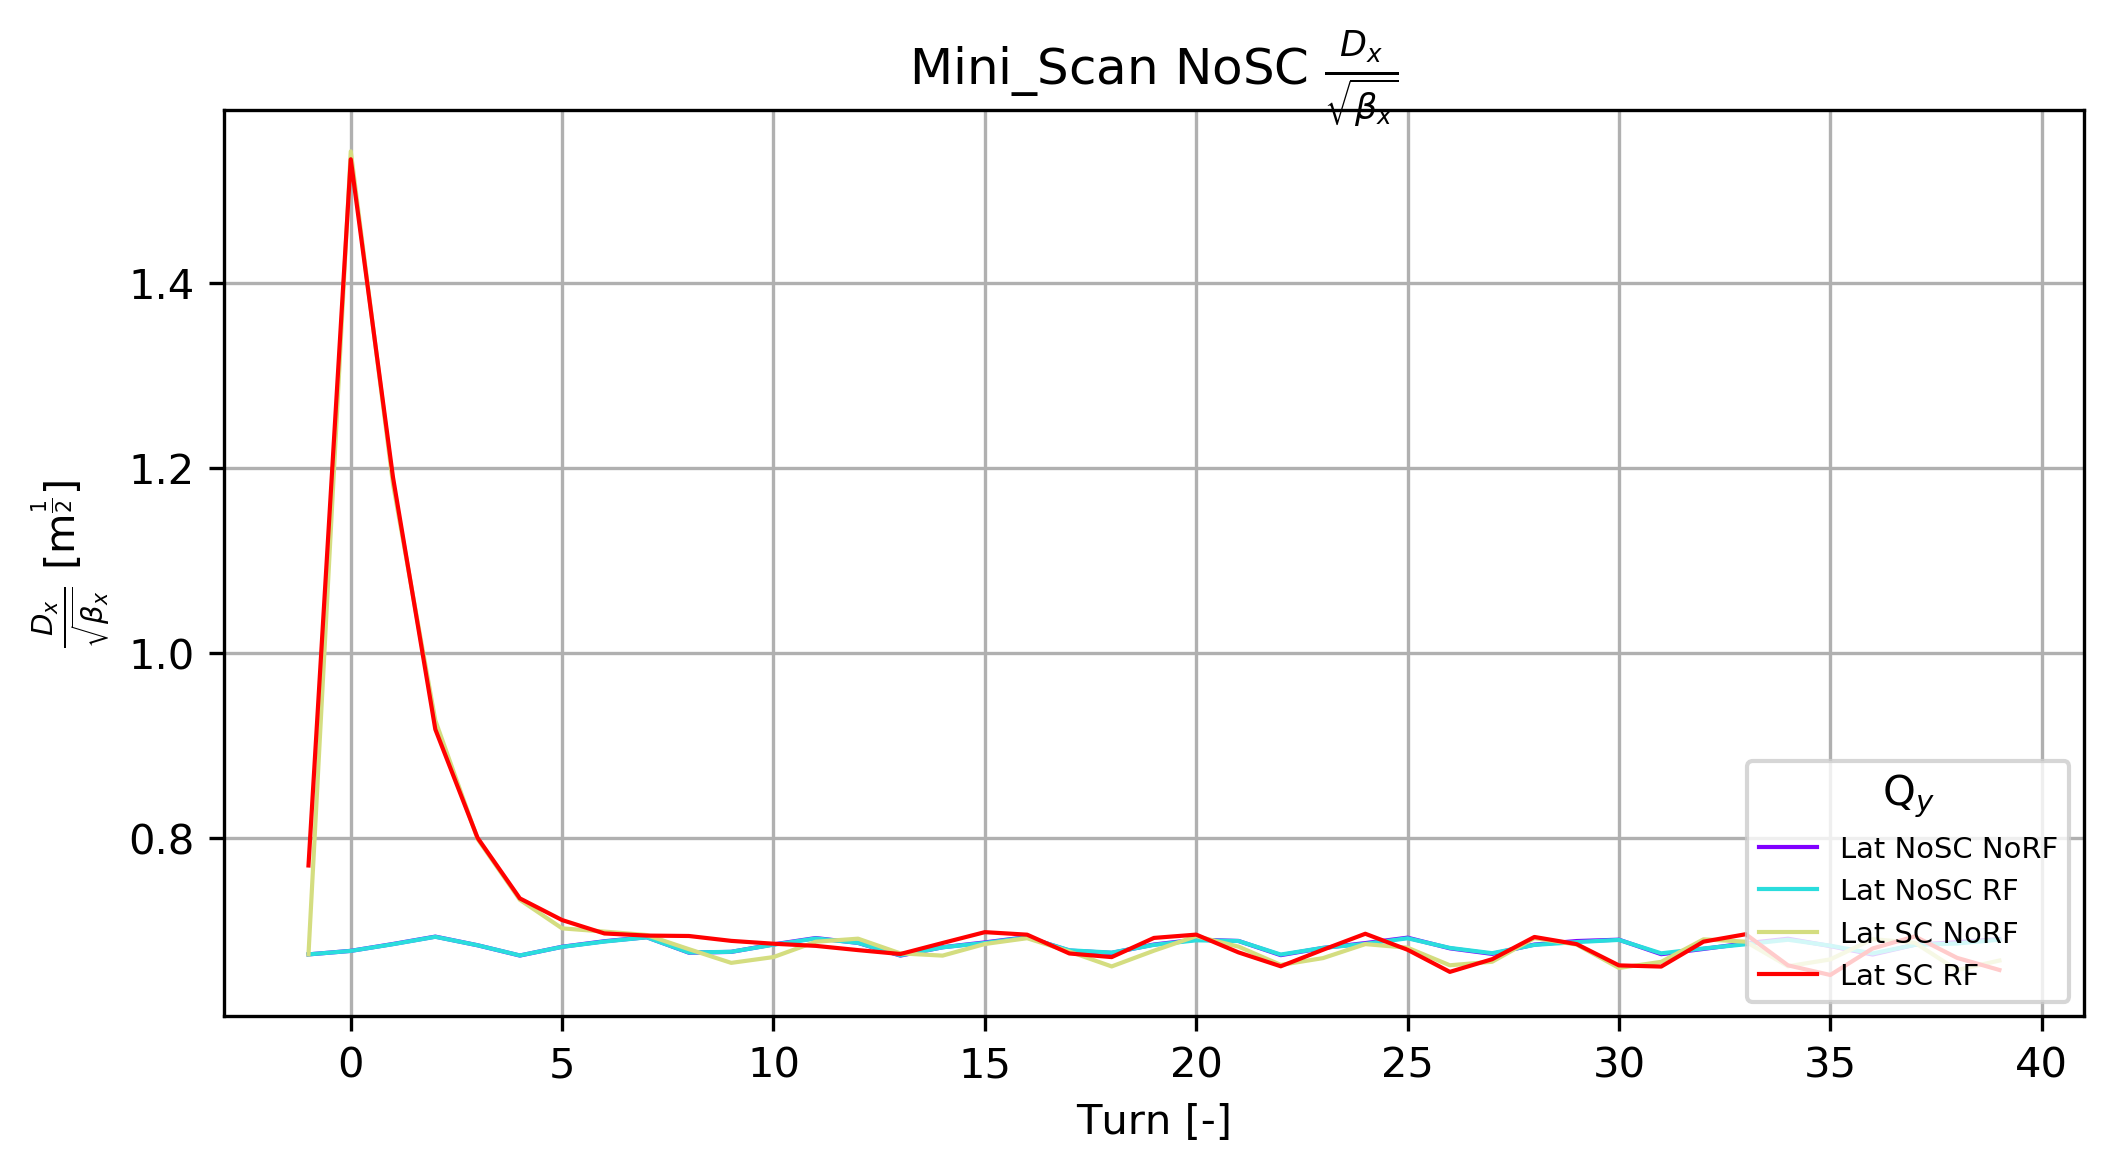

In [70]:
parameter = 'D_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + r'$\frac{D_x}{\sqrt{\beta_x}}$'
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{D_x}{\sqrt{\beta_x}}$ [m$^\frac{1}{2}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key]['D_x'][0]/np.sqrt(dd1[key]['beta_x'][0]), label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label);
ax1.grid();
#ax1.set_xlim(-1,2200);

#savename = 'Plots/' + parameter + 'norm_V_noSC.png';
#plt.savefig(savename, dpi = 800);

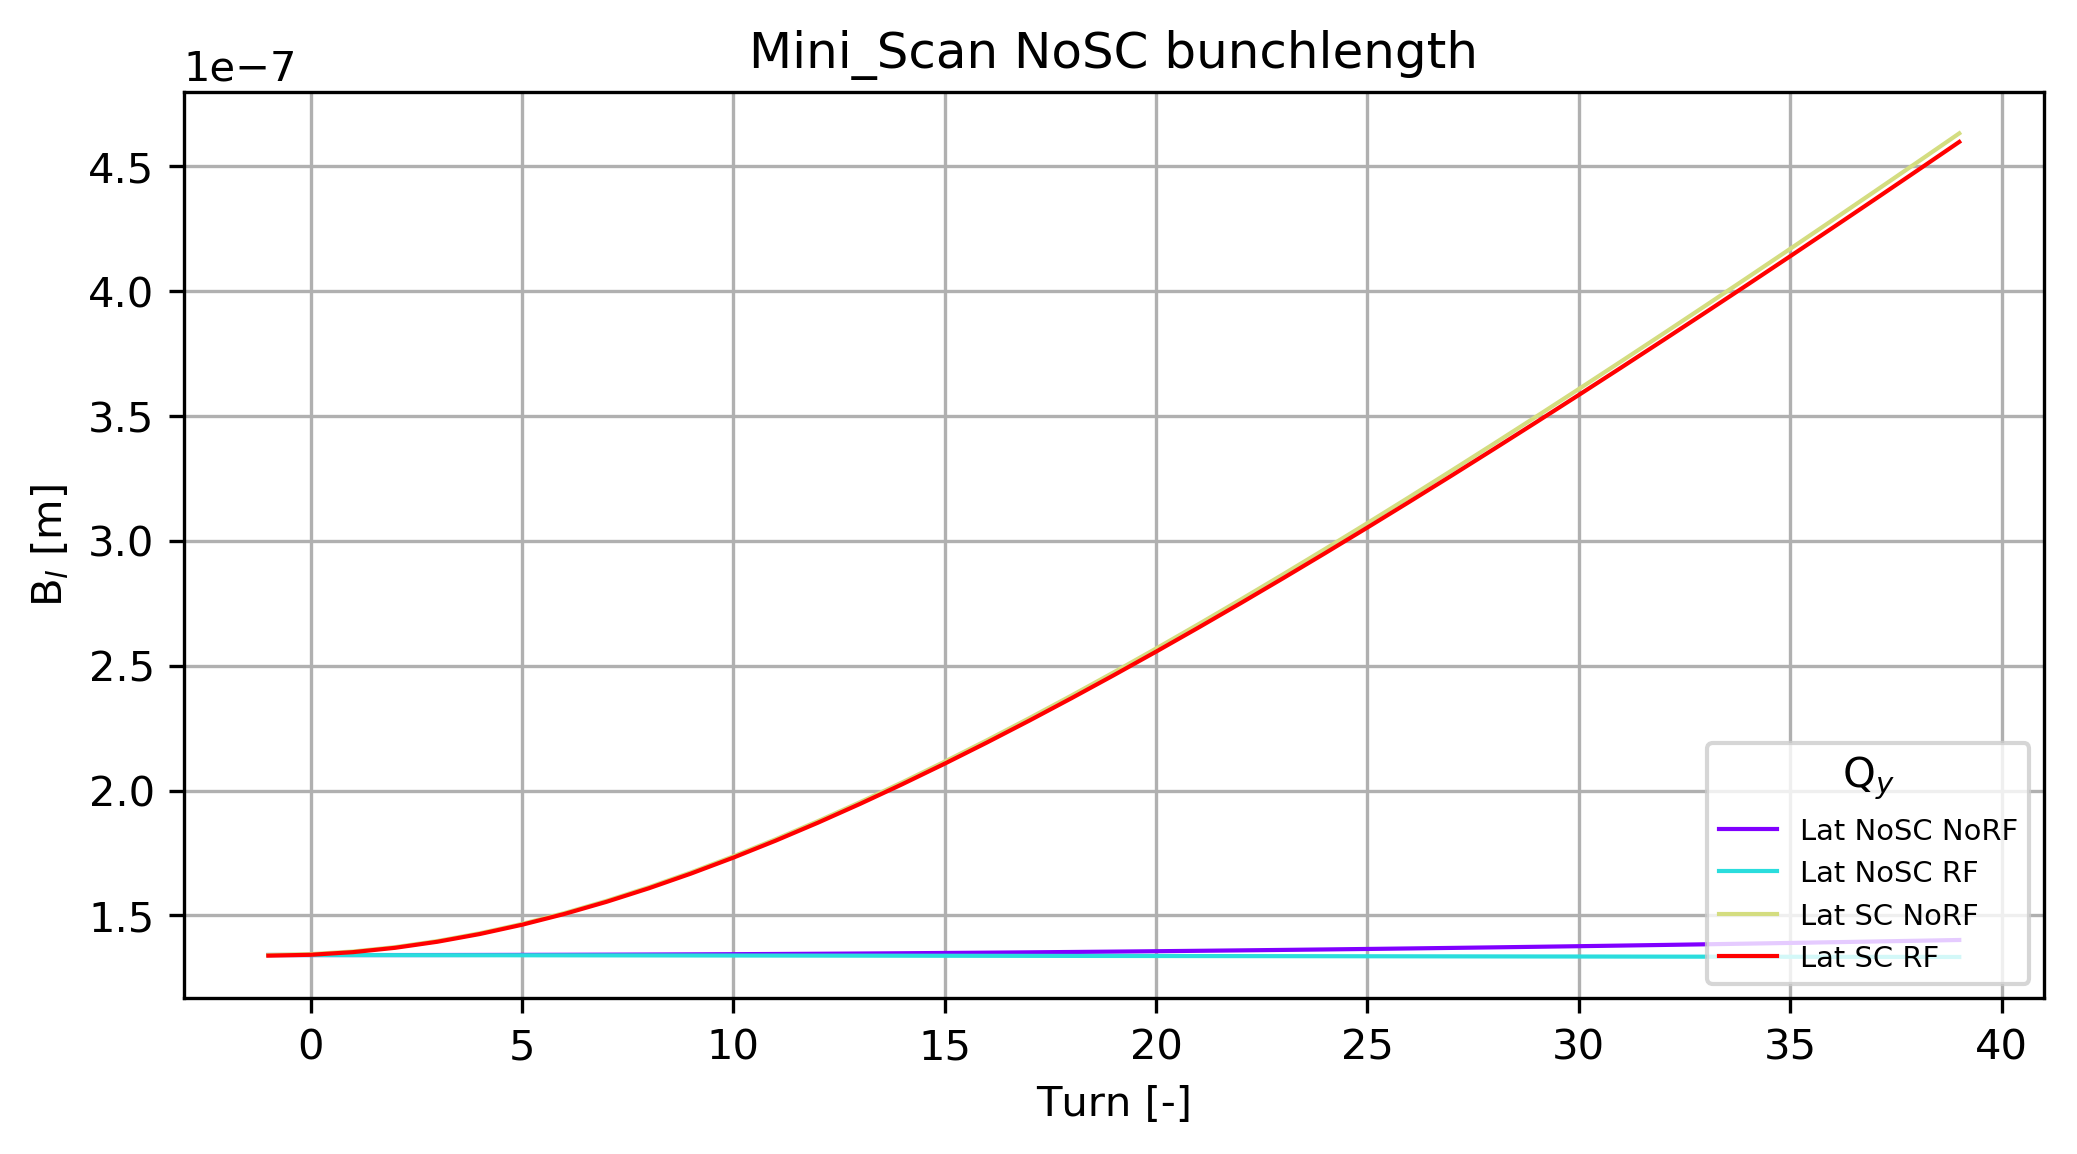

In [71]:
parameter = 'bunchlength'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'B$_l$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0], label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(1.342E-7, 1.3445E-7)

#savename = 'Plots/' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

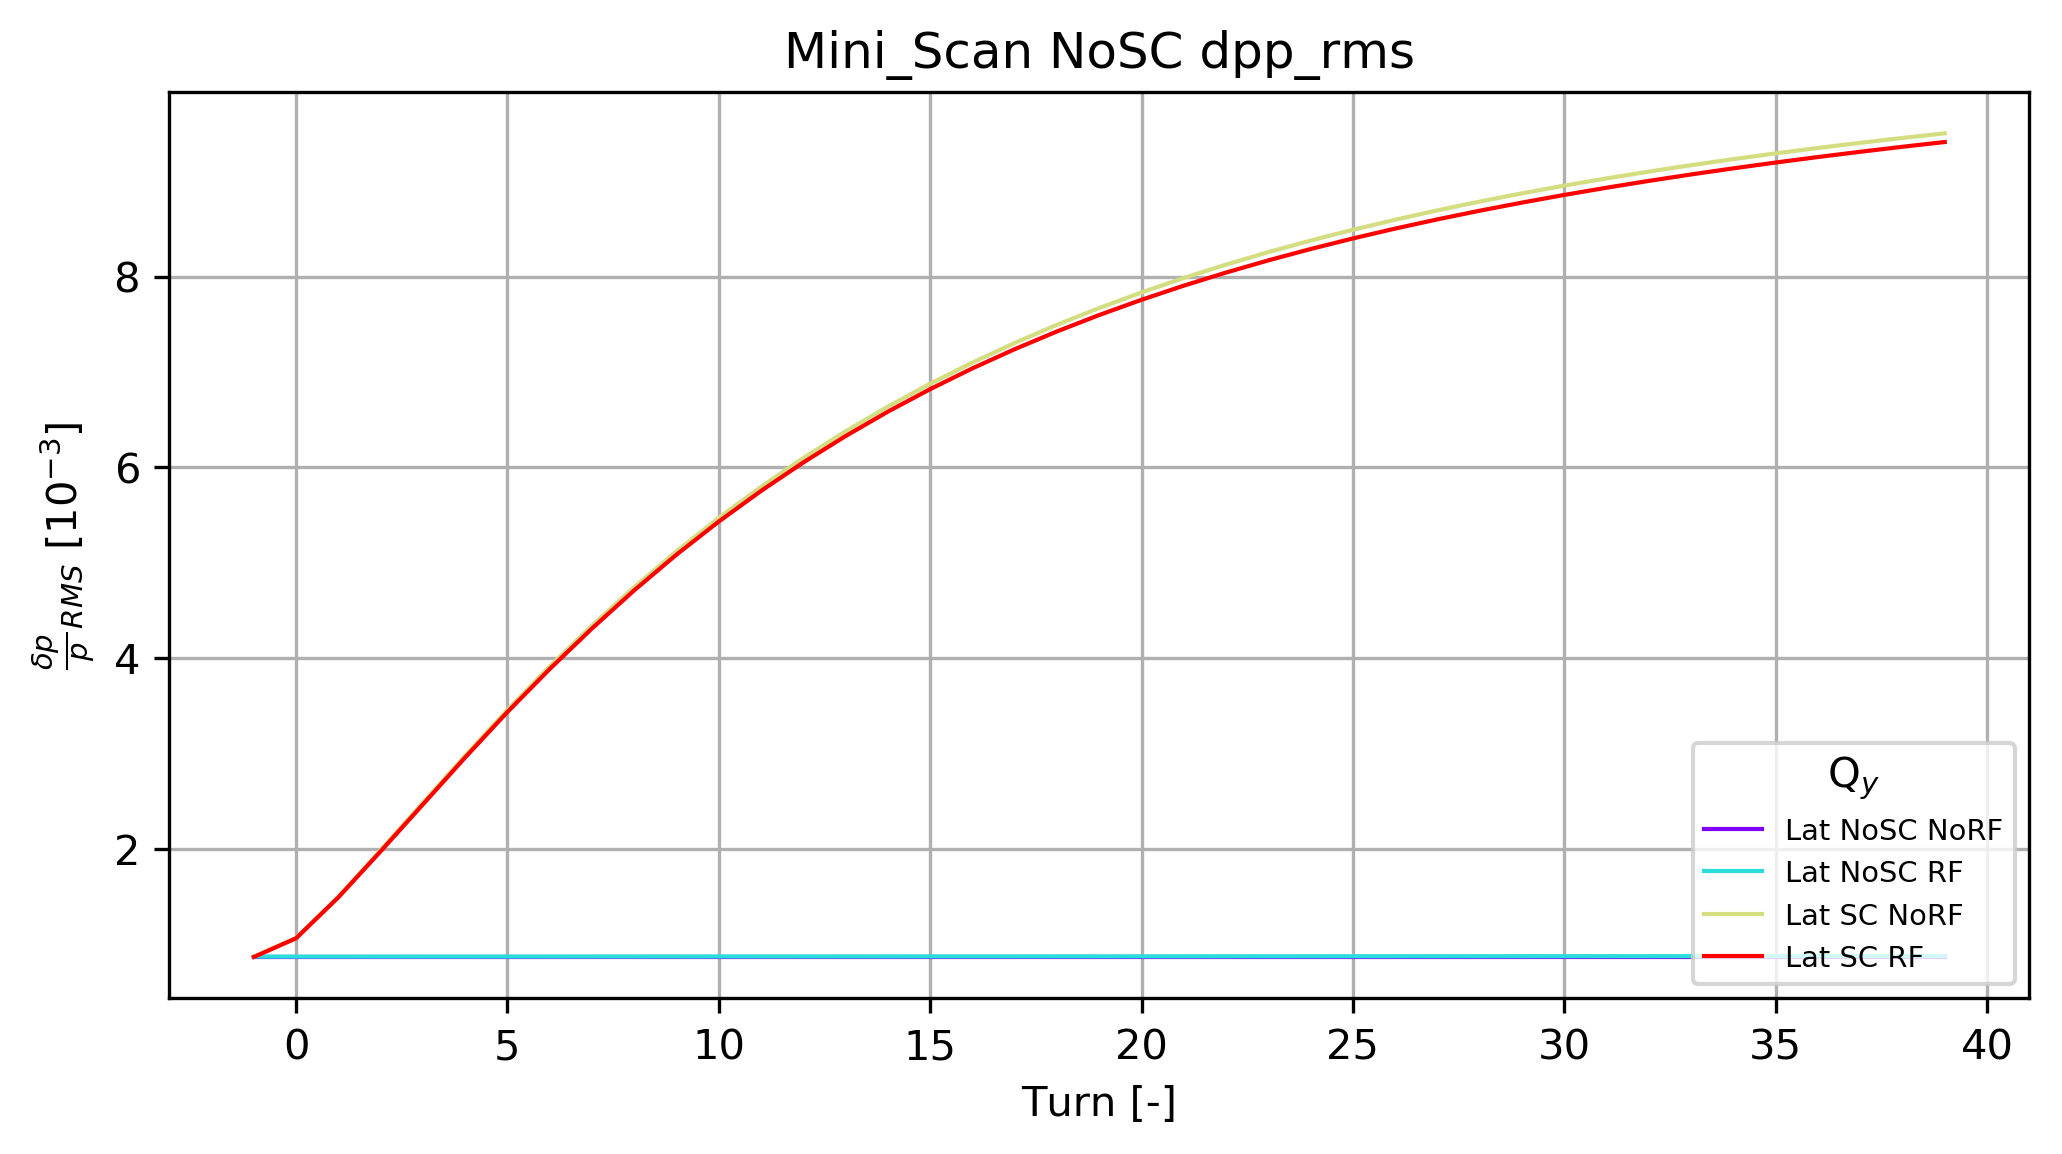

In [72]:
parameter = 'dpp_rms'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\frac{\delta p}{p}_{RMS}$ [10$^{-3}$]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1000, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)

#savename = 'Plots/' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

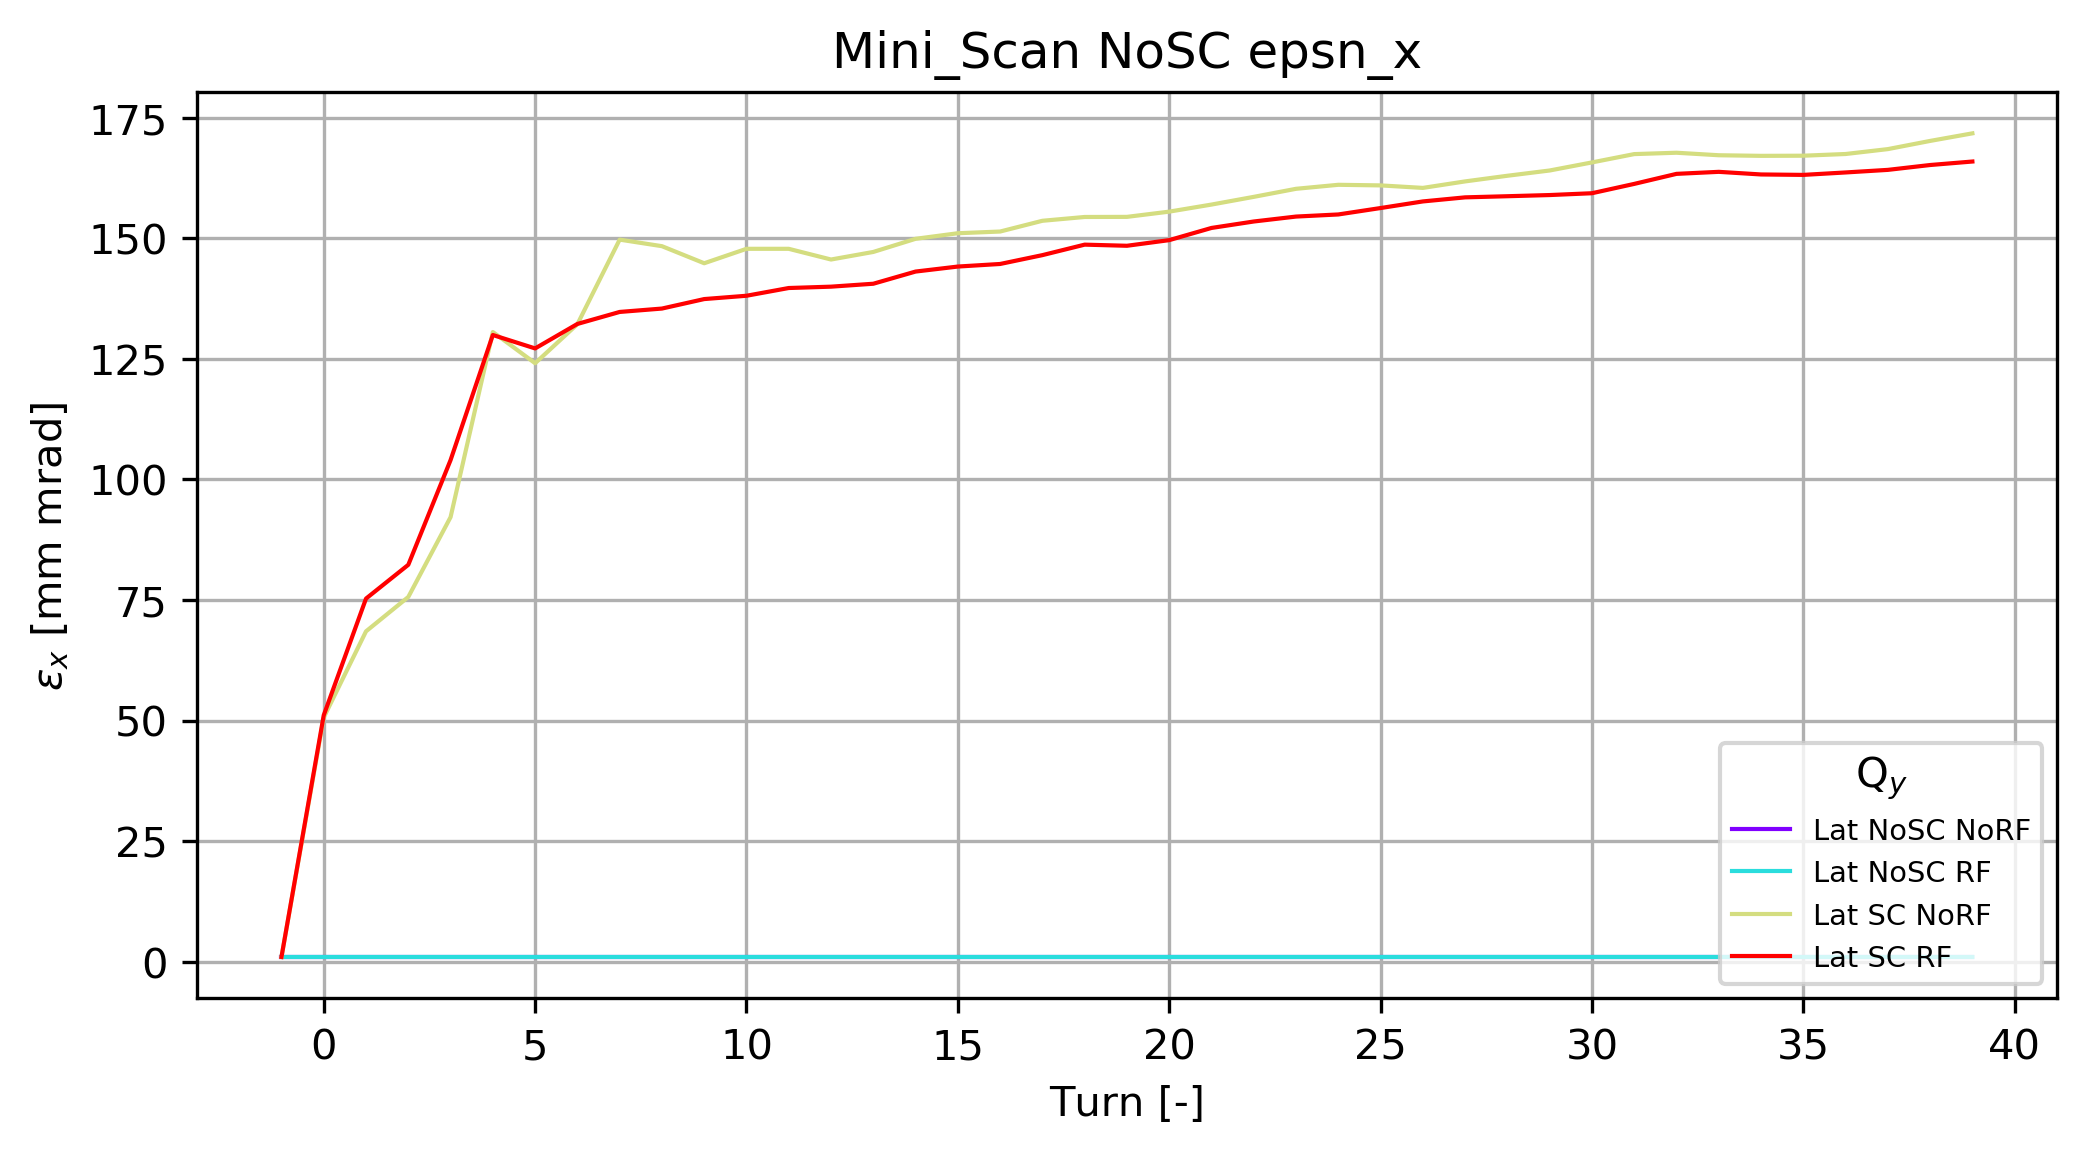

In [73]:
parameter = 'epsn_x'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_x$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(1., 1.15)

#savename = 'Plots/' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

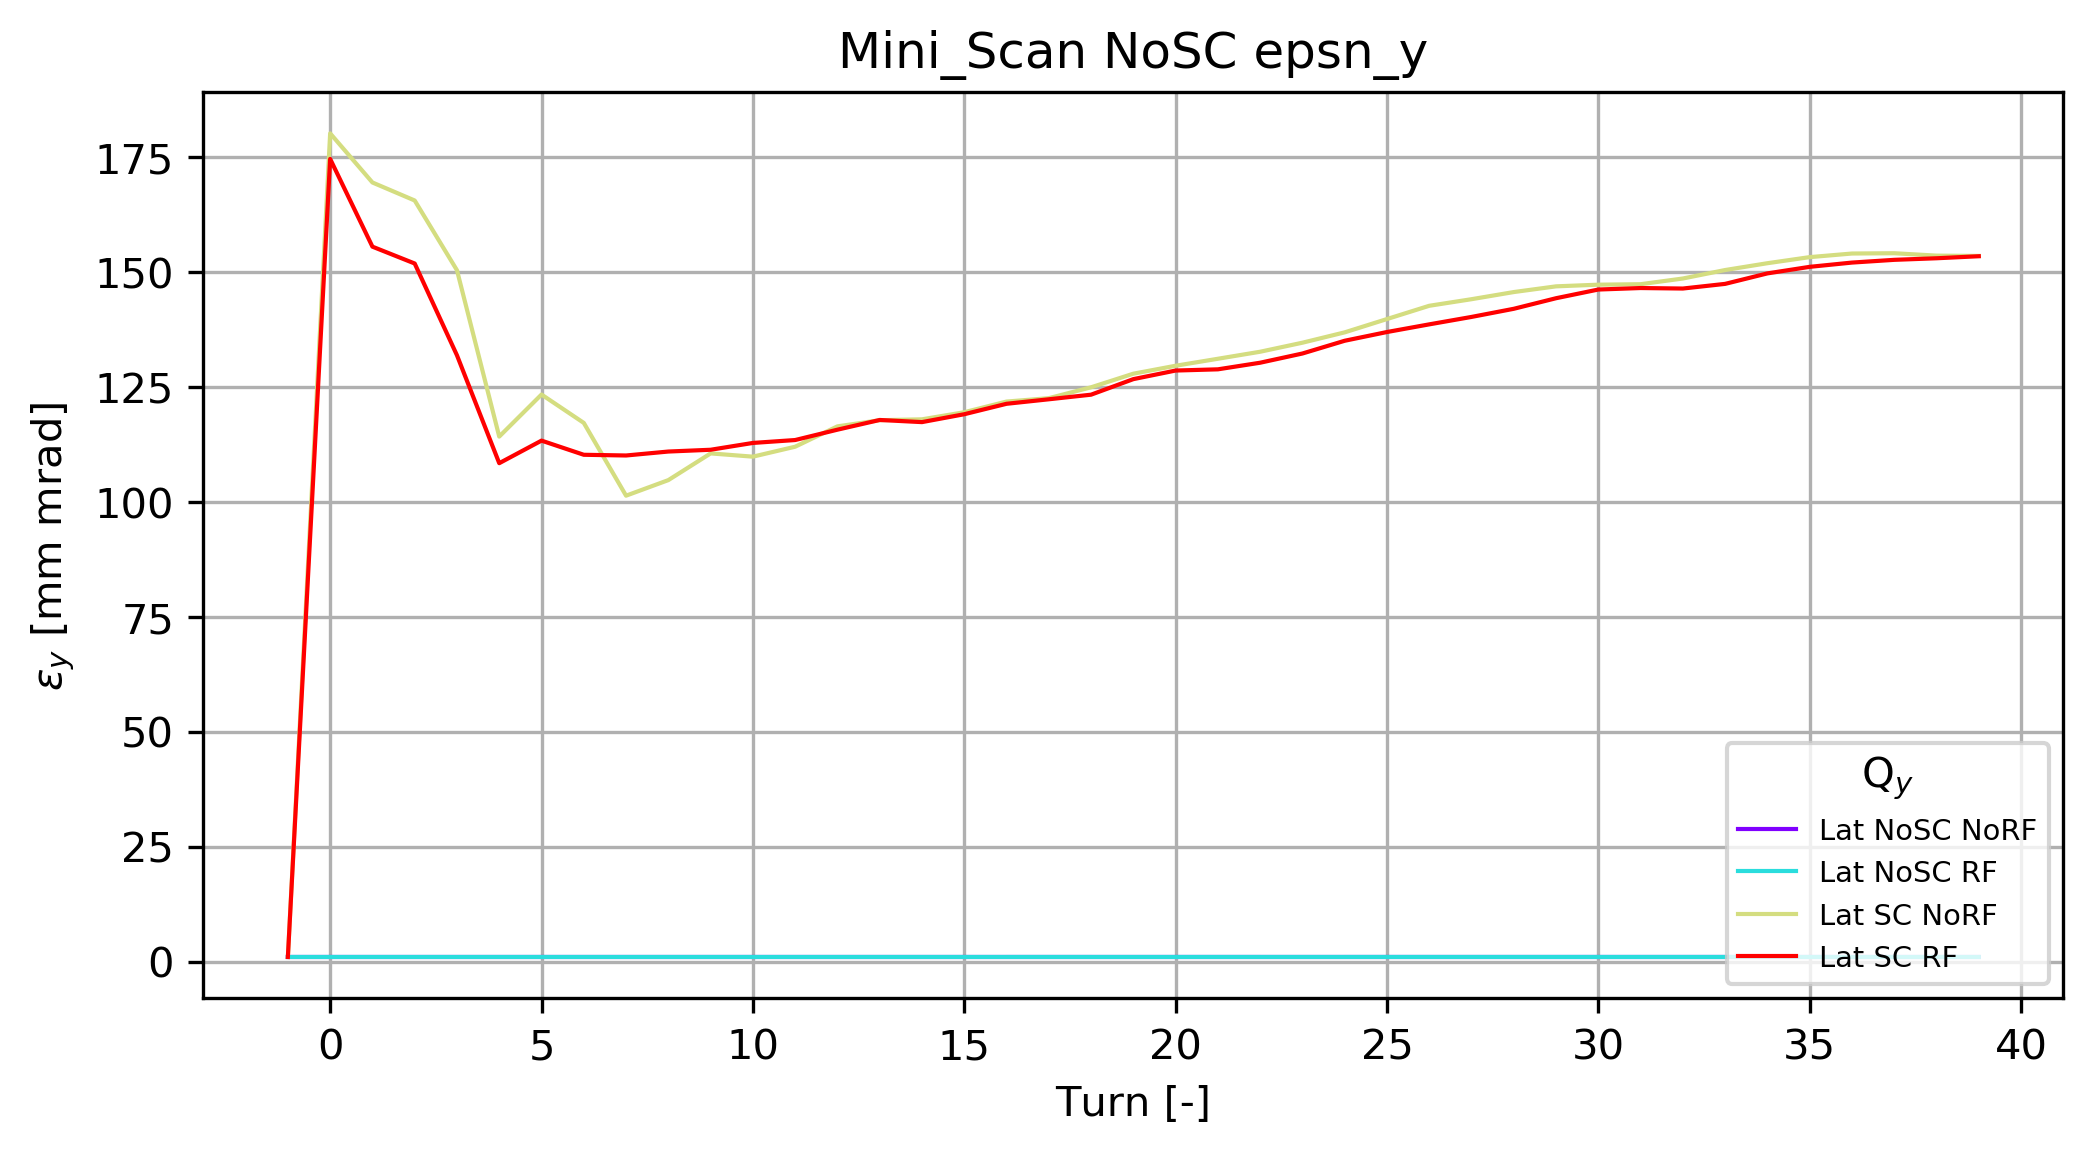

In [74]:
parameter = 'epsn_y'

fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title(tit);

ax1.set_ylabel(r'$\epsilon_y$ [mm mrad]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(dd1.keys())))
c_it = int(0)

for key, value in sorted(dd1.iteritems()):
        ax1.plot(dd1[key]['turn'][0], dd1[key][parameter][0]*1E6, label=key, color=colors[c_it]);
        c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
#ax1.set_ylim(1., 2.2)

#savename = 'Plots/' + parameter + '_V_noSC.png'
#plt.savefig(savename, dpi = 800);

# TWISS Values

In [81]:
Q1 = []
Dx1 = []
Dy1 = []
Bx1 = []
By1 = []
Ax1 = []
Ay1 = []
start = 0 # for SC sims we ignore the first n turns

for key, value in sorted(dd1.iteritems()):
    Q1.append(float(key))
    Dx1.append(np.mean(dd1[key]['D_x'][0][start:]))
    Dy1.append(np.mean(dd1[key]['D_y'][0][start:]))
    Bx1.append(np.mean(dd1[key]['beta_x'][0][start:]))
    By1.append(np.mean(dd1[key]['beta_y'][0][start:]))
    Ax1.append(np.mean(dd1[key]['alpha_x'][0][start:]))
    Ay1.append(np.mean(dd1[key]['alpha_y'][0][start:]))

print '\nNo Space Charge Vertical'
print '\nQy = ', Q1
print '\nDx_V_NoSC = ', Dx1
print '\nDy_V_NoSC = ', Dy1
print '\nBeta_x_V_NoSC = ', Bx1
print '\nBeta_y_V_NoSC = ', By1
print '\nAlpha_x_V_NoSC = ', Ax1
print '\nAlpha_y_V_NoSC = ', Ay1


No Space Charge Vertical

Qy =  [6.1, 6.12, 6.14, 6.16, 6.18, 6.2, 6.22, 6.24]

Dx_V_NoSC =  [2.4321919507866783, 2.42310434179821, 2.4140459962812906, 2.4050380306225287, 2.3960915576544077, 2.3872125162463673, 2.3784040296640754, 2.3696675884210894]

Dy_V_NoSC =  [3.450401674066792e-05, 2.9020535244612504e-05, 2.474617337721171e-05, 2.1667914809257664e-05, 1.9317482741426384e-05, 1.7885749111608556e-05, 1.614803787734183e-05, 1.4782182685407151e-05]

Beta_x_V_NoSC =  [12.3920847726339, 12.41704112234723, 12.44183509001322, 12.466419963091964, 12.490768483265885, 12.514867236094908, 12.538710982413297, 12.562297079970055]

Beta_y_V_NoSC =  [23.64352974525025, 23.01256065499728, 22.614253592544387, 22.35312287811764, 22.178413595183034, 22.06071557637833, 21.981843048038513, 21.929954126957824]

Alpha_x_V_NoSC =  [0.0006628487502987938, -0.0007462324296846643, -0.0021643522234730214, -0.0035870876937742755, -0.005012035884870432, -0.006437538507343211, -0.007862386772773965, -0.009285

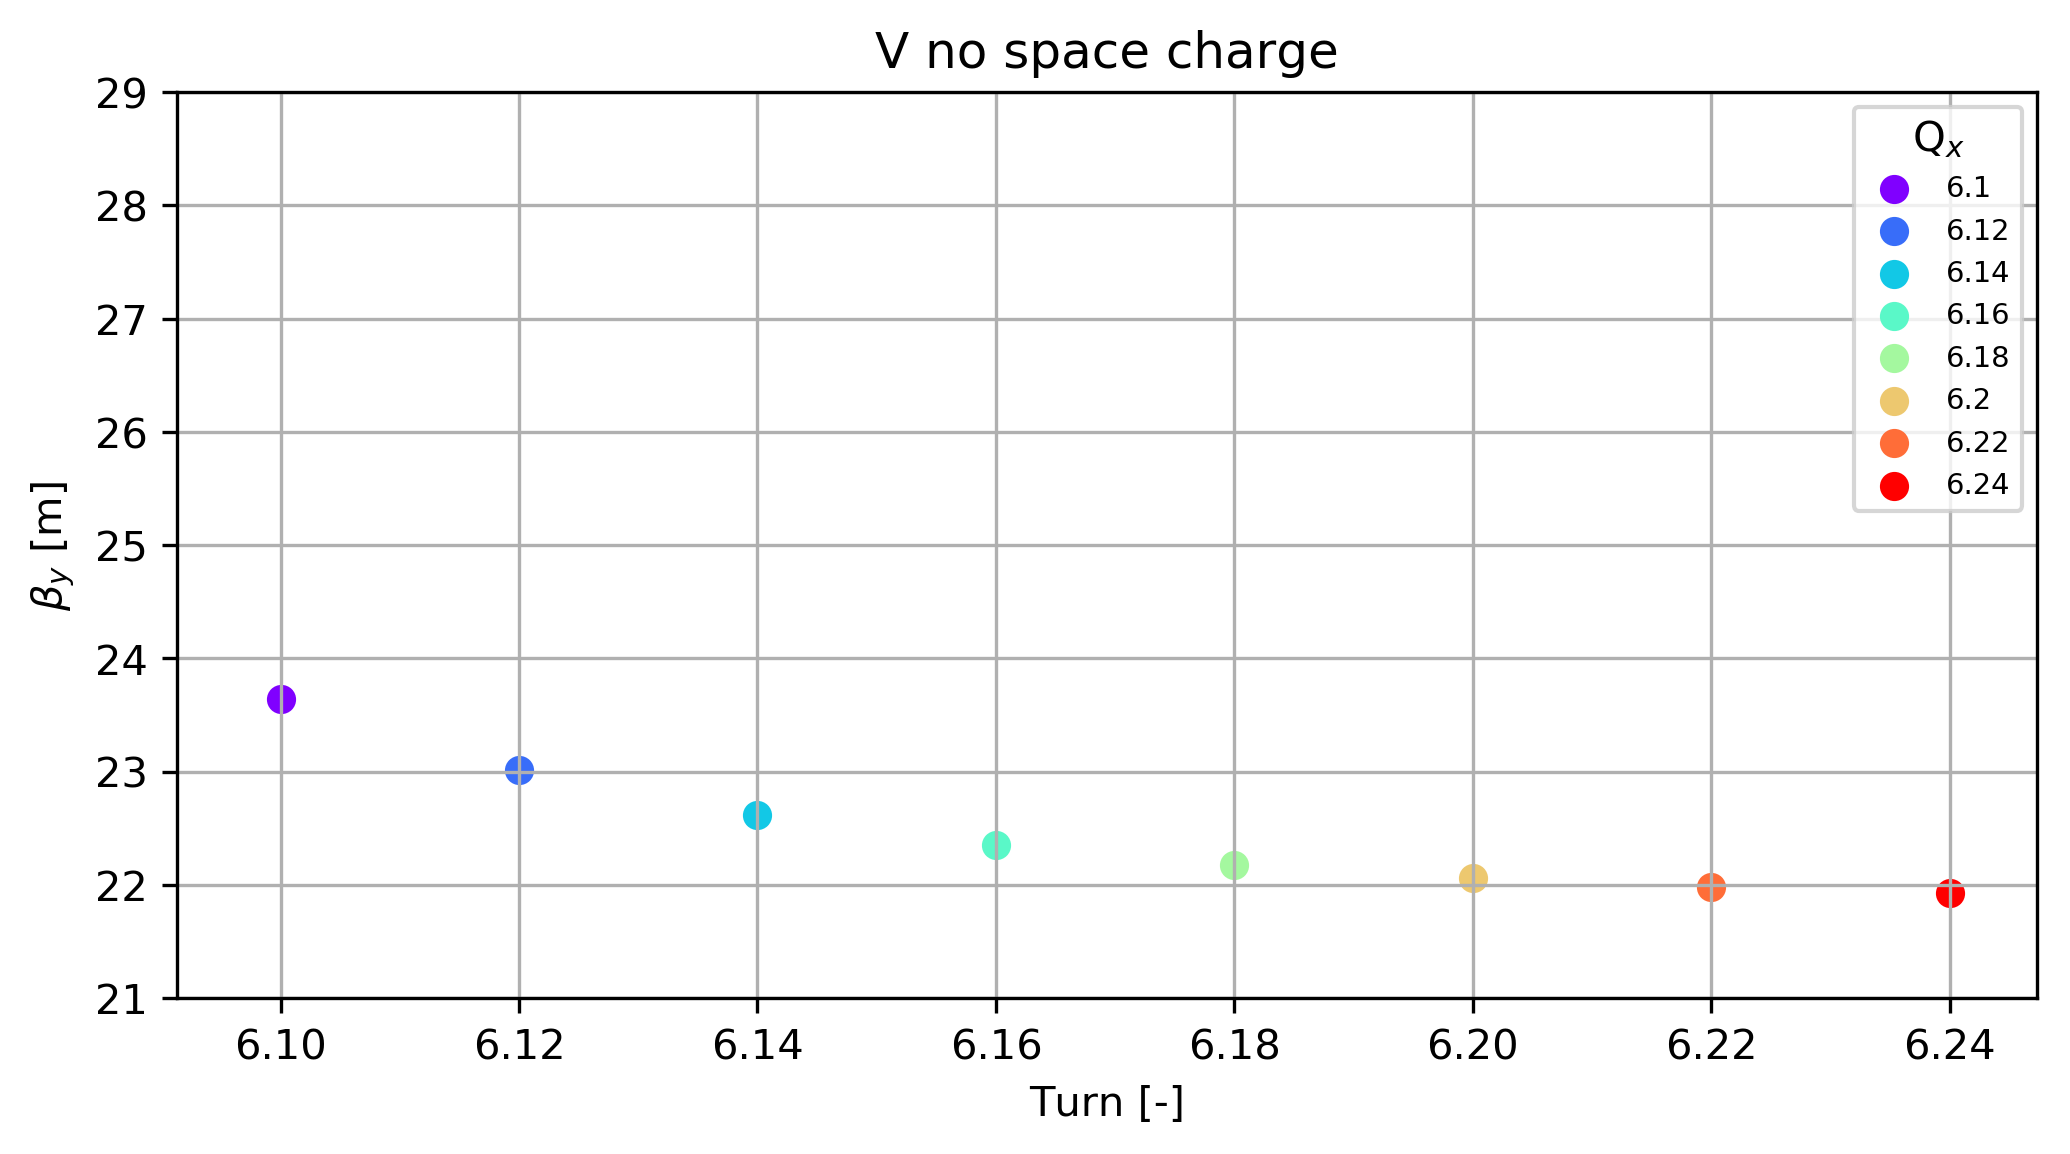

In [82]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V no space charge');

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q1)))
c_it = int(0)


for i in range(len(Q1)):
    ax1.scatter(Q1[i], By1[i], label=Q1[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
ax1.set_ylim(21, 29)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig('Plots/Vertical_Betas_NoSC.png', dpi = 800);

In [83]:
Q2 = []
Dx2 = []
Dy2 = []
Bx2 = []
By2 = []
Ax2 = []
Ay2 = []
start = 200 # for SC sims we ignore the first n turns

for key, value in sorted(dd2.iteritems()):
    Q2.append(float(key))
    Dx2.append(np.mean(dd2[key]['D_x'][0][start:]))
    Dy2.append(np.mean(dd2[key]['D_y'][0][start:]))
    Bx2.append(np.mean(dd2[key]['beta_x'][0][start:]))
    By2.append(np.mean(dd2[key]['beta_y'][0][start:]))
    Ax2.append(np.mean(dd2[key]['alpha_x'][0][start:]))
    Ay2.append(np.mean(dd2[key]['alpha_y'][0][start:]))

print '\nVertical'
print '\nQy = ', Q2
print '\nDx_V = ', Dx2
print '\nDy_V = ', Dy2
print '\nBeta_x_V = ', Bx2
print '\nBeta_y_V = ', By2
print '\nAlpha_x_V = ', Ax2
print '\nAlpha_y_V = ', Ay2


Vertical

Qy =  [6.1, 6.11, 6.12, 6.13, 6.14, 6.15, 6.16, 6.17, 6.18, 6.19, 6.2, 6.21, 6.22, 6.23, 6.24]

Dx_V =  [2.7238641993955732, 2.7120860629004255, 2.6994508041931335, 2.6863440678031574, 2.672386228651023, 2.6580229615003876, 2.64314556738443, 2.6280882092976365, 2.6129041363713723, 2.59744005103213, 2.5818492232775934, 2.5662886921607866, 2.550424494135266, 2.5343524154736436, 2.51866641467657]

Dy_V =  [4.367816748122375e-05, 0.00035587086701217597, 0.0003660175570428406, 8.26174877194663e-06, -0.000191423682138625, 5.658288855341201e-06, 0.00014281744599578446, -2.878620105586677e-05, -9.647589487896772e-05, -9.090651784262011e-07, -4.668886732849038e-06, 1.4755109576529703e-05, 1.6328867913236533e-05, 2.007351627844793e-05, -1.1071869433949277e-05]

Beta_x_V =  [11.445953852723896, 11.510142057939072, 11.575929347922242, 11.643662666888034, 11.714421282518094, 11.78791904681883, 11.862932437305316, 11.936289107196501, 12.00850847462817, 12.081015850533856, 12.1515651501363

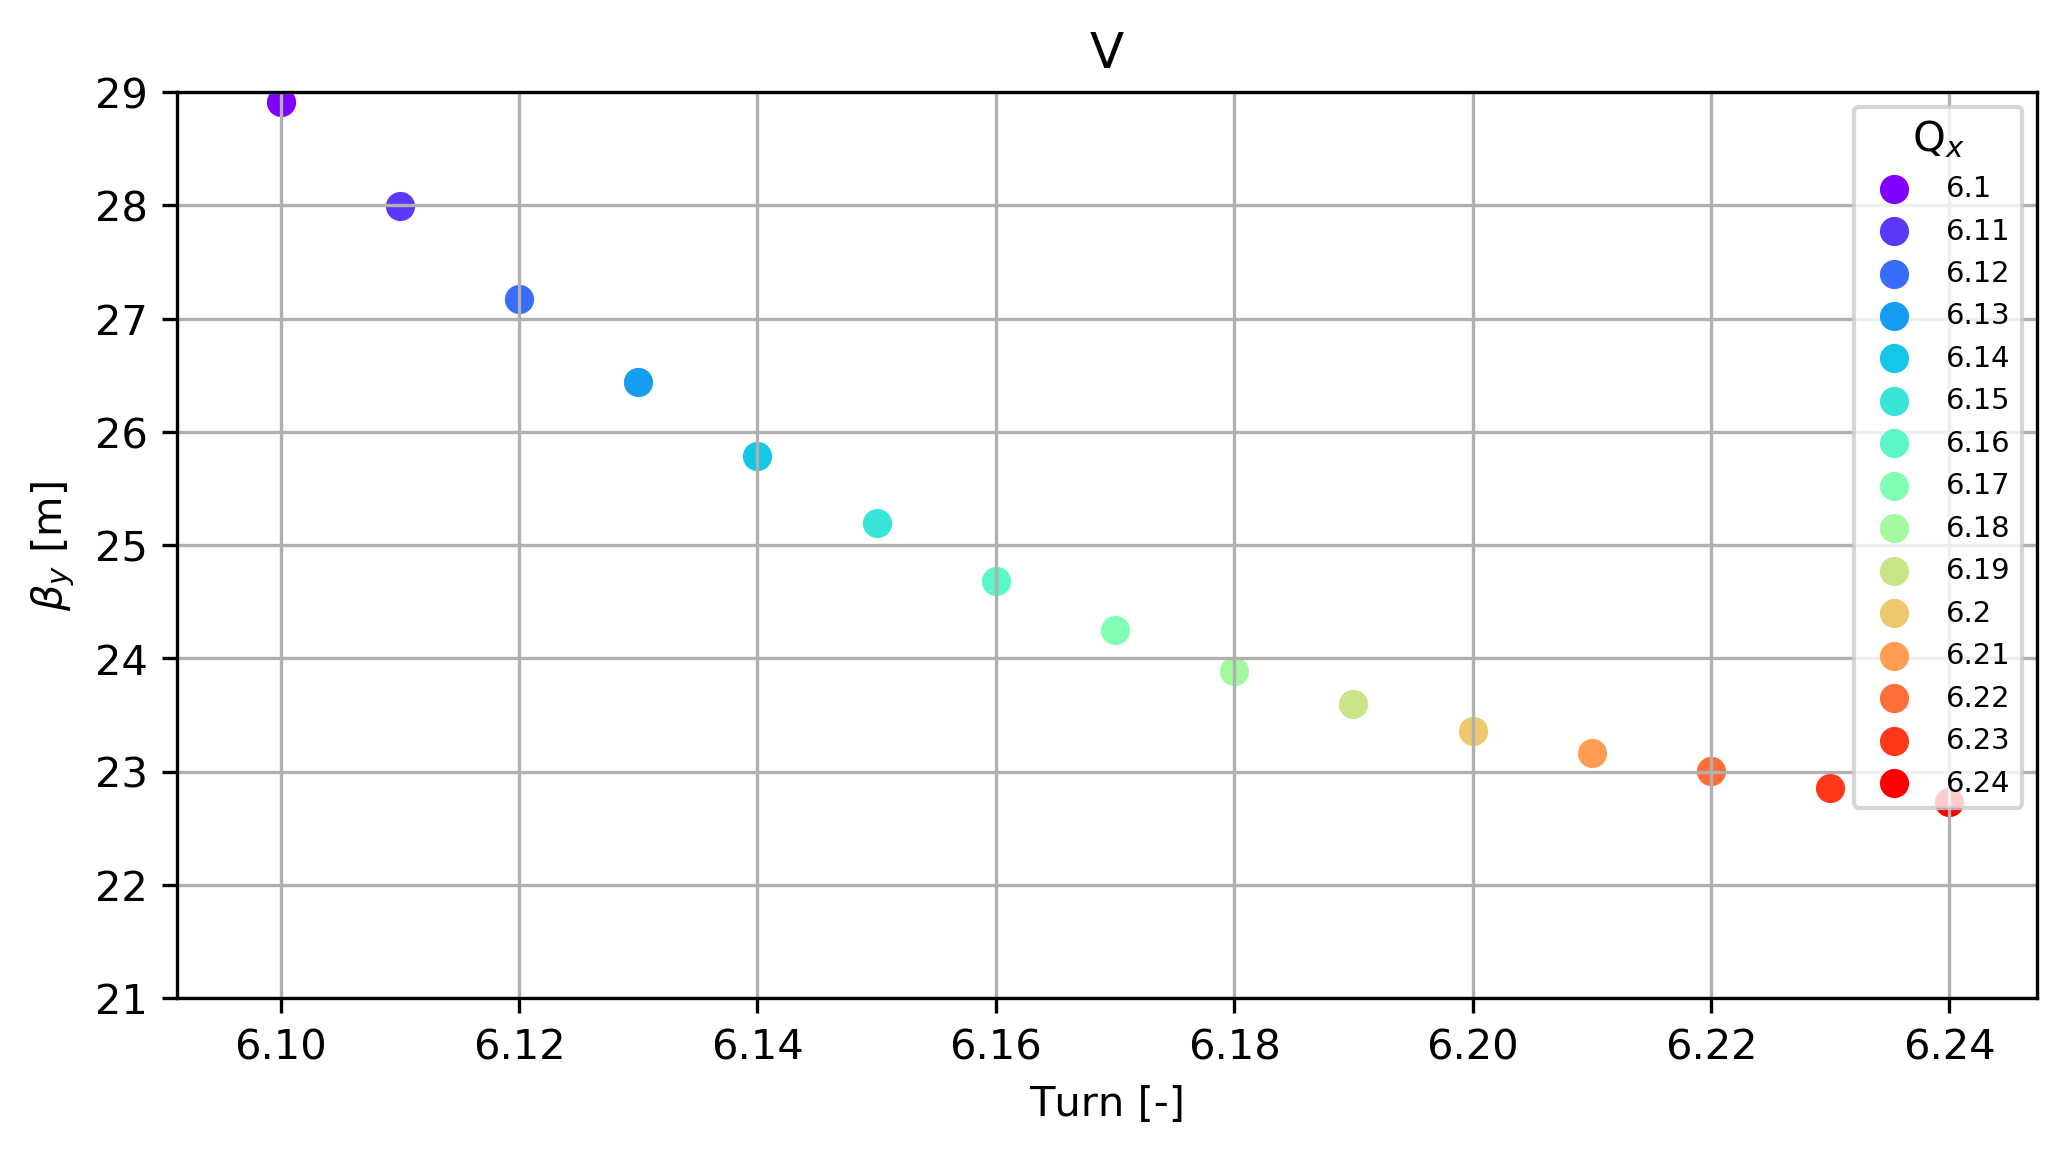

In [84]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('V');

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q2)))
c_it = int(0)


for i in range(len(Q2)):
    ax1.scatter(Q2[i], By2[i], label=Q2[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
ax1.set_ylim(21, 29)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig('Plots_SC/Vertical_Betas.png', dpi = 800);

In [85]:
Q3 = []
Dx3 = []
Dy3 = []
Bx3 = []
By3 = []
Ax3 = []
Ay3 = []
start = 200 # for SC sims we ignore the first n turns

for key, value in sorted(dd3.iteritems()):
    Q3.append(float(key))
    Dx3.append(np.mean(dd3[key]['D_x'][0][start:]))
    Dy3.append(np.mean(dd3[key]['D_y'][0][start:]))
    Bx3.append(np.mean(dd3[key]['beta_x'][0][start:]))
    By3.append(np.mean(dd3[key]['beta_y'][0][start:]))
    Ax3.append(np.mean(dd3[key]['alpha_x'][0][start:]))
    Ay3.append(np.mean(dd3[key]['alpha_y'][0][start:]))

print '\nHorizontal'
print '\nQ_x_H = ', Q3
print '\nDx_H = ', Dx3
print '\nDy_H = ', Dy3
print '\nBeta_x_H = ', Bx3
print '\nBeta_y_H = ', By3
print '\nAlpha_x_H = ', Ax3
print '\nAlpha_y_H = ', Ay3


Horizontal

Q_x_H =  [6.07, 6.08, 6.09, 6.1, 6.11, 6.12, 6.13, 6.14, 6.15, 6.16, 6.17, 6.18, 6.19, 6.2, 6.21]

Dx_H =  [5.094041737639815, 4.745555457055128, 4.465376676611421, 4.243625666843309, 4.069281878600707, 3.9316158604113913, 3.820341066721708, 3.726204087526766, 3.6461483127488576, 3.5756765668001607, 3.5129668013633237, 3.4563946388233266, 3.404480149204493, 3.3564030388195856, 3.3116558798797184]

Dy_H =  [1.4750033030587474e-05, 6.467605854338345e-07, -1.0514917113366752e-05, 5.815755472624499e-06, 2.1595046605289424e-05, 5.908728772597862e-06, -9.255017467287862e-06, 1.0035542292204026e-05, 1.051816255640615e-05, -1.0728393759677672e-06, 3.9371025222305687e-07, -1.3797255912659215e-05, -1.766537470942474e-05, 7.172375722134988e-06, -1.61589132330799e-05]

Beta_x_H =  [16.042909156812588, 16.62273975494126, 17.13286856078035, 17.651410896775587, 18.244770290045892, 18.860894438903497, 19.472153382370056, 20.032653880308352, 20.511990757311683, 20.915624794555598, 21.25262

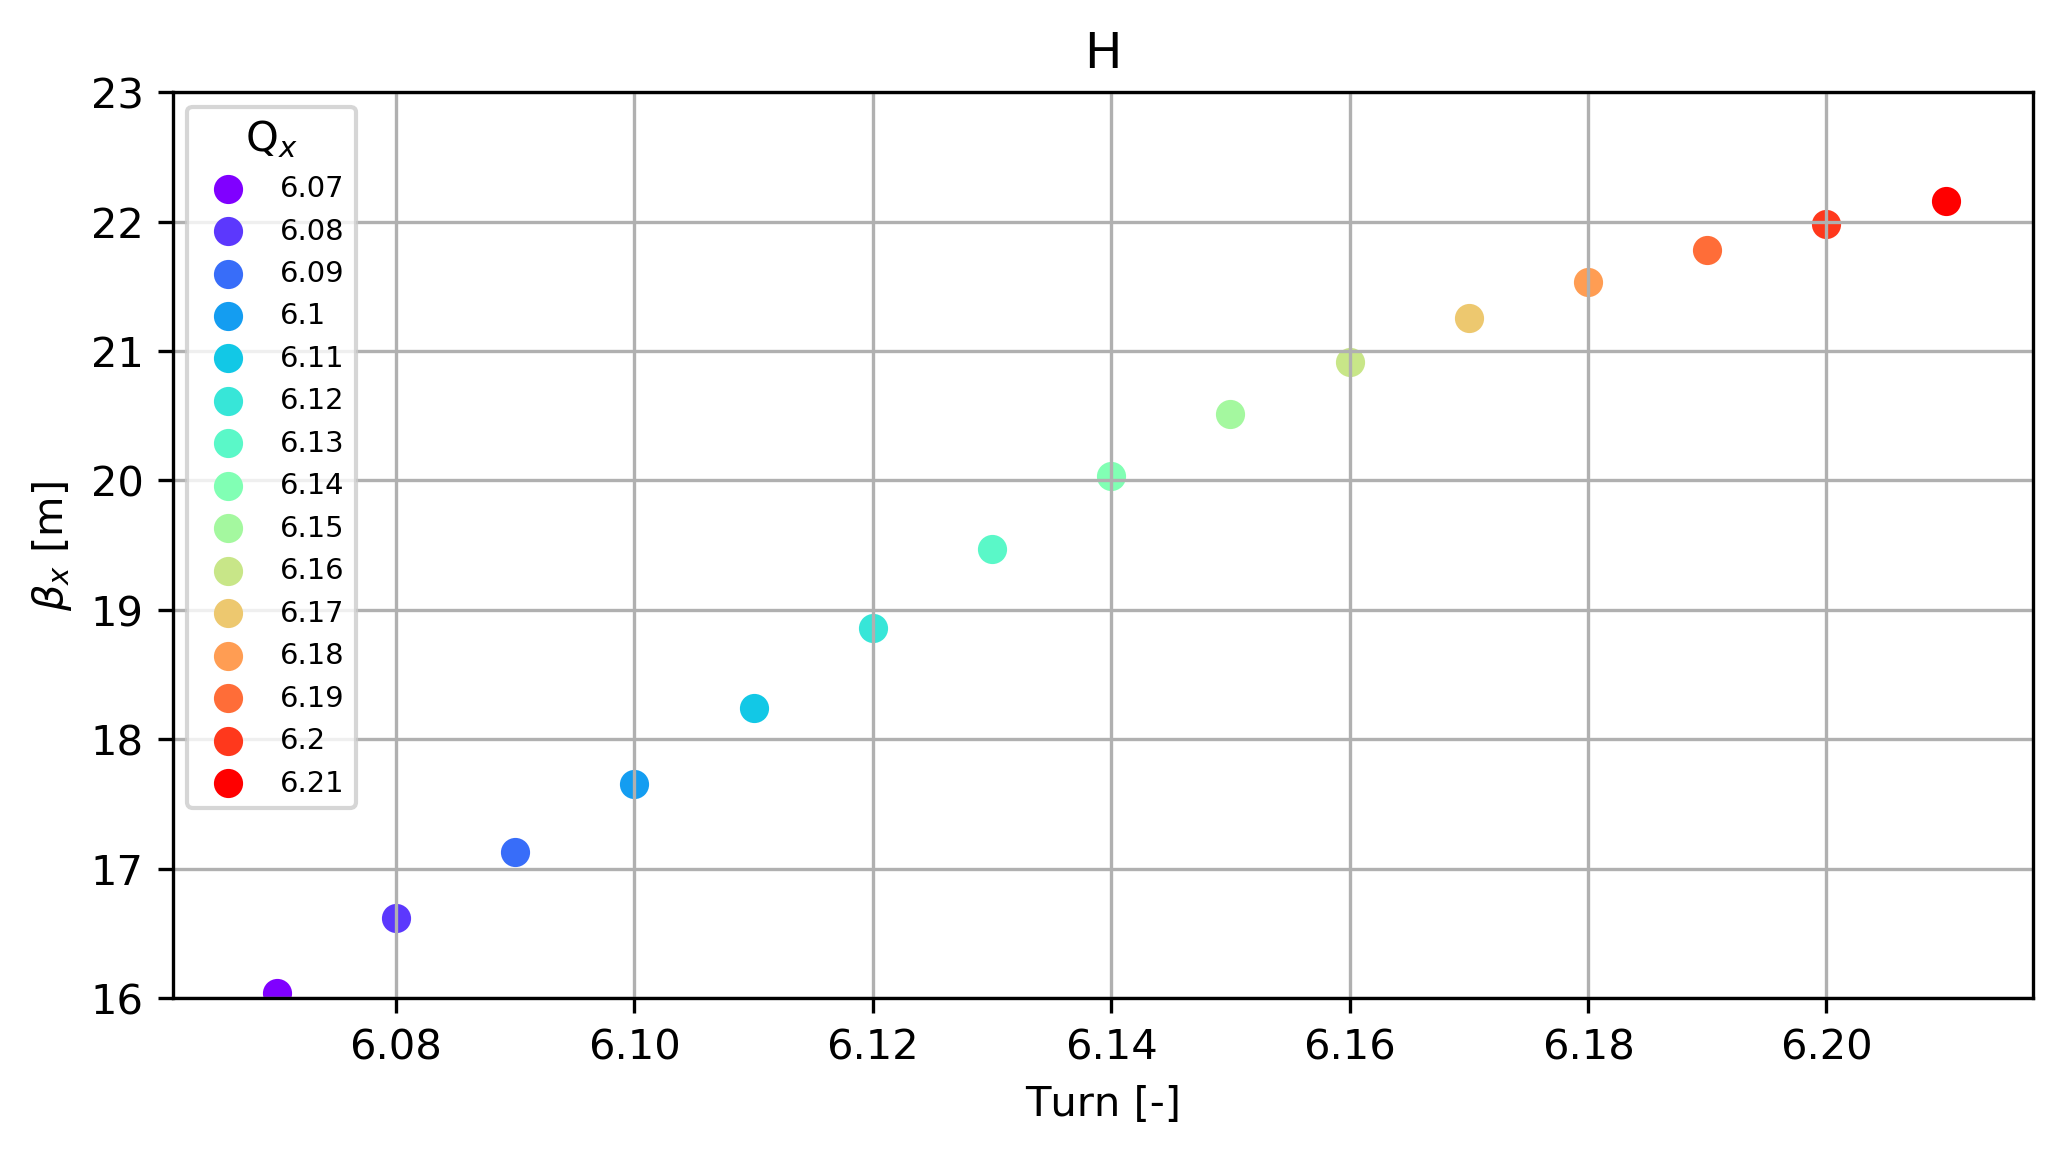

In [86]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('H');

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], Bx3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=2, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
ax1.set_ylim(16, 23)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig('Plots_H/Horizontal_Betas.png', dpi = 800);

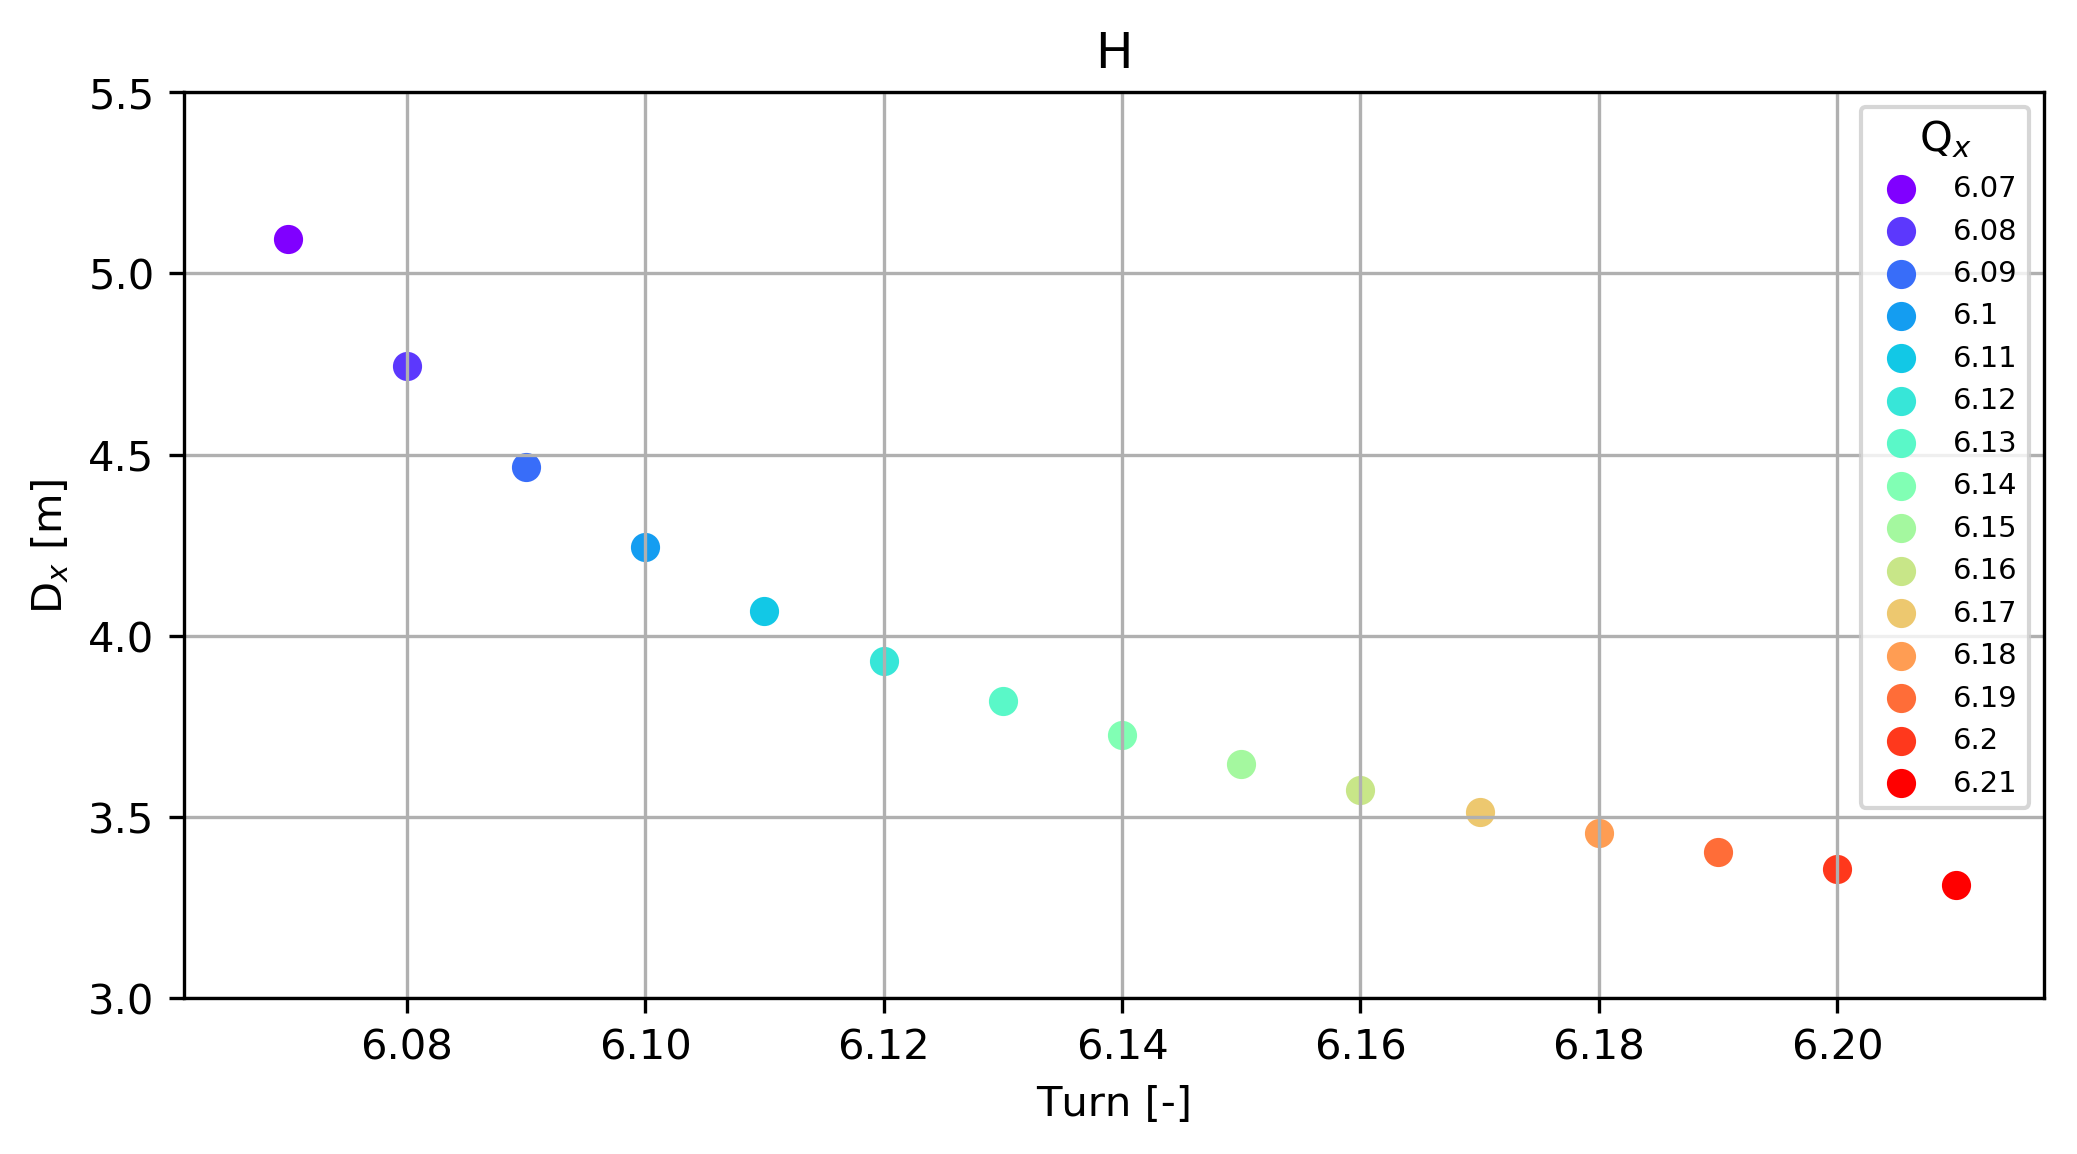

In [87]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('H');

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)


for i in range(len(Q3)):
    ax1.scatter(Q3[i], Dx3[i], label=Q3[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
ax1.set_ylim(3, 5.5)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig('Plots_H/Horizontal_Ds.png', dpi = 800);

In [88]:
Q4 = []
Dx4 = []
Dy4 = []
Bx4 = []
By4 = []
Ax4 = []
Ay4 = []
start = 0 # for SC sims we ignore the first n turns

for key, value in sorted(dd4.iteritems()):
    Q4.append(float(key))
    Dx4.append(np.mean(dd4[key]['D_x'][0][start:]))
    Dy4.append(np.mean(dd4[key]['D_y'][0][start:]))
    Bx4.append(np.mean(dd4[key]['beta_x'][0][start:]))
    By4.append(np.mean(dd4[key]['beta_y'][0][start:]))
    Ax4.append(np.mean(dd4[key]['alpha_x'][0][start:]))
    Ay4.append(np.mean(dd4[key]['alpha_y'][0][start:]))

print '\nHorizontal no Space Charge'
print '\nDx_H_NoSC = ', Dx4
print '\nDy_H_NoSC = ', Dy4
print '\nBeta_x_H_NoSC = ', Bx4
print '\nBeta_y_H_NoSC = ', By4
print '\nAlpha_x_H_NoSC = ', Ax4
print '\nAlpha_y_H_NoSC = ', Ay4


Horizontal no Space Charge

Dx_H_NoSC =  [3.629640581124774, 3.501347123685066, 3.40436791364757, 3.3279166317364517, 3.265261616885041, 3.21218765060906, 3.165969199451029, 3.1247815903537655]

Dy_H_NoSC =  [1.8528235180375126e-06, 1.9267119939505454e-06, 1.9889938203346335e-06, 2.048086093347571e-06, 2.1181542594289655e-06, 2.1911621432063888e-06, 2.263362163754378e-06, 2.3209743288899753e-06]

Beta_x_H_NoSC =  [19.928104549095124, 20.812844479673046, 21.373943299243116, 21.751038399774828, 22.014266591869486, 22.202522862395046, 22.339006789981262, 22.438348237926544]

Beta_y_H_NoSC =  [11.7978494476014, 11.785576957392443, 11.773463048042899, 11.761533193096716, 11.74979653987141, 11.73825522096108, 11.726908088375888, 11.71575237863504]

Alpha_x_H_NoSC =  [0.028699302660280368, 0.02399734468451326, 0.022522458405029984, 0.02265399729931491, 0.023630469951255447, 0.025048691328270888, 0.02667624050517249, 0.02837030345884537]

Alpha_y_H_NoSC =  [0.052363349022747925, 0.05271139842

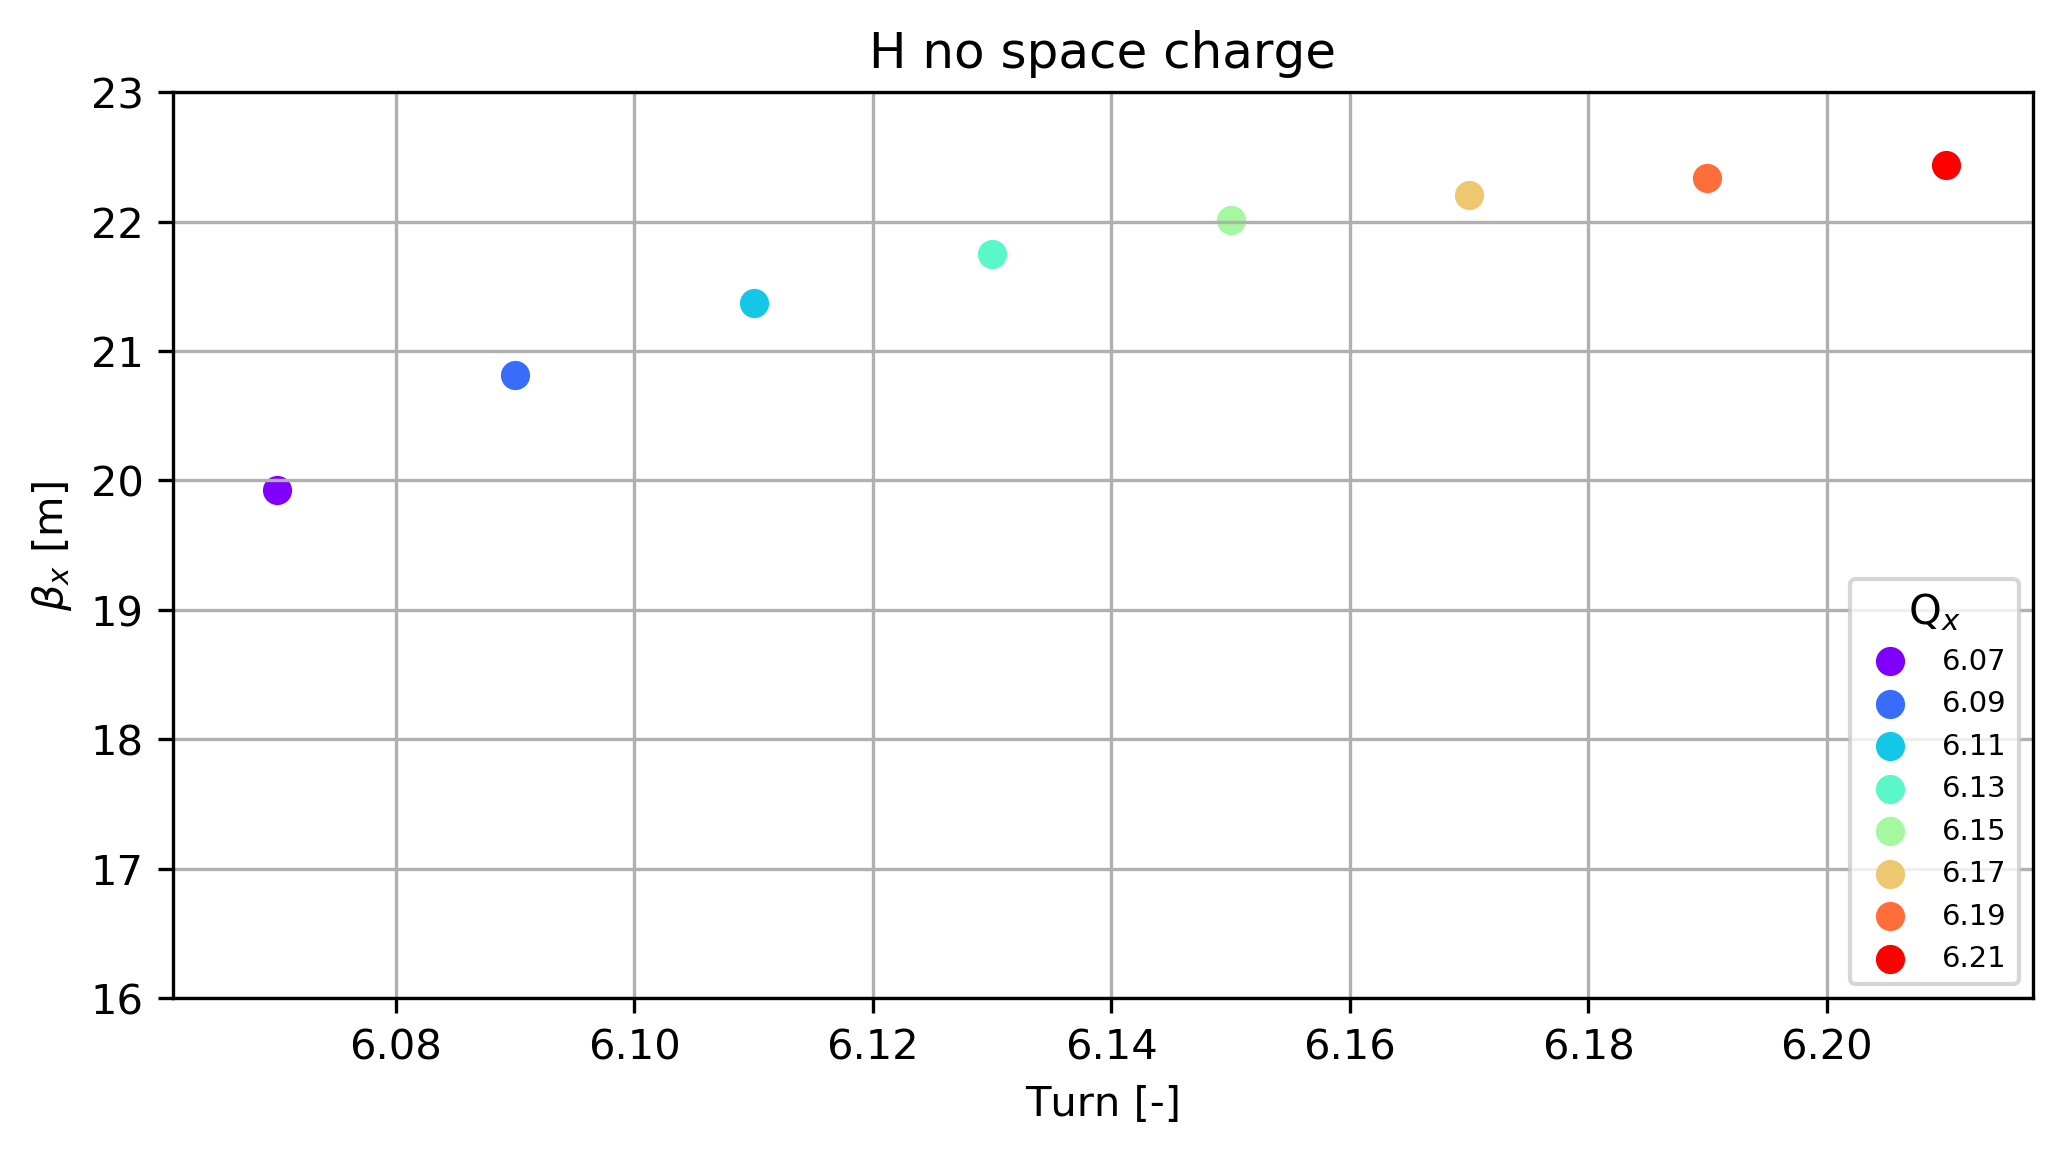

In [89]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('H no space charge');

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q4)))
c_it = int(0)


for i in range(len(Q4)):
    ax1.scatter(Q4[i], Bx4[i], label=Q4[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=4, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
ax1.set_ylim(16, 23)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig('Plots_H_NoSC/Horizontal_Betas_NoSC.png', dpi = 800);

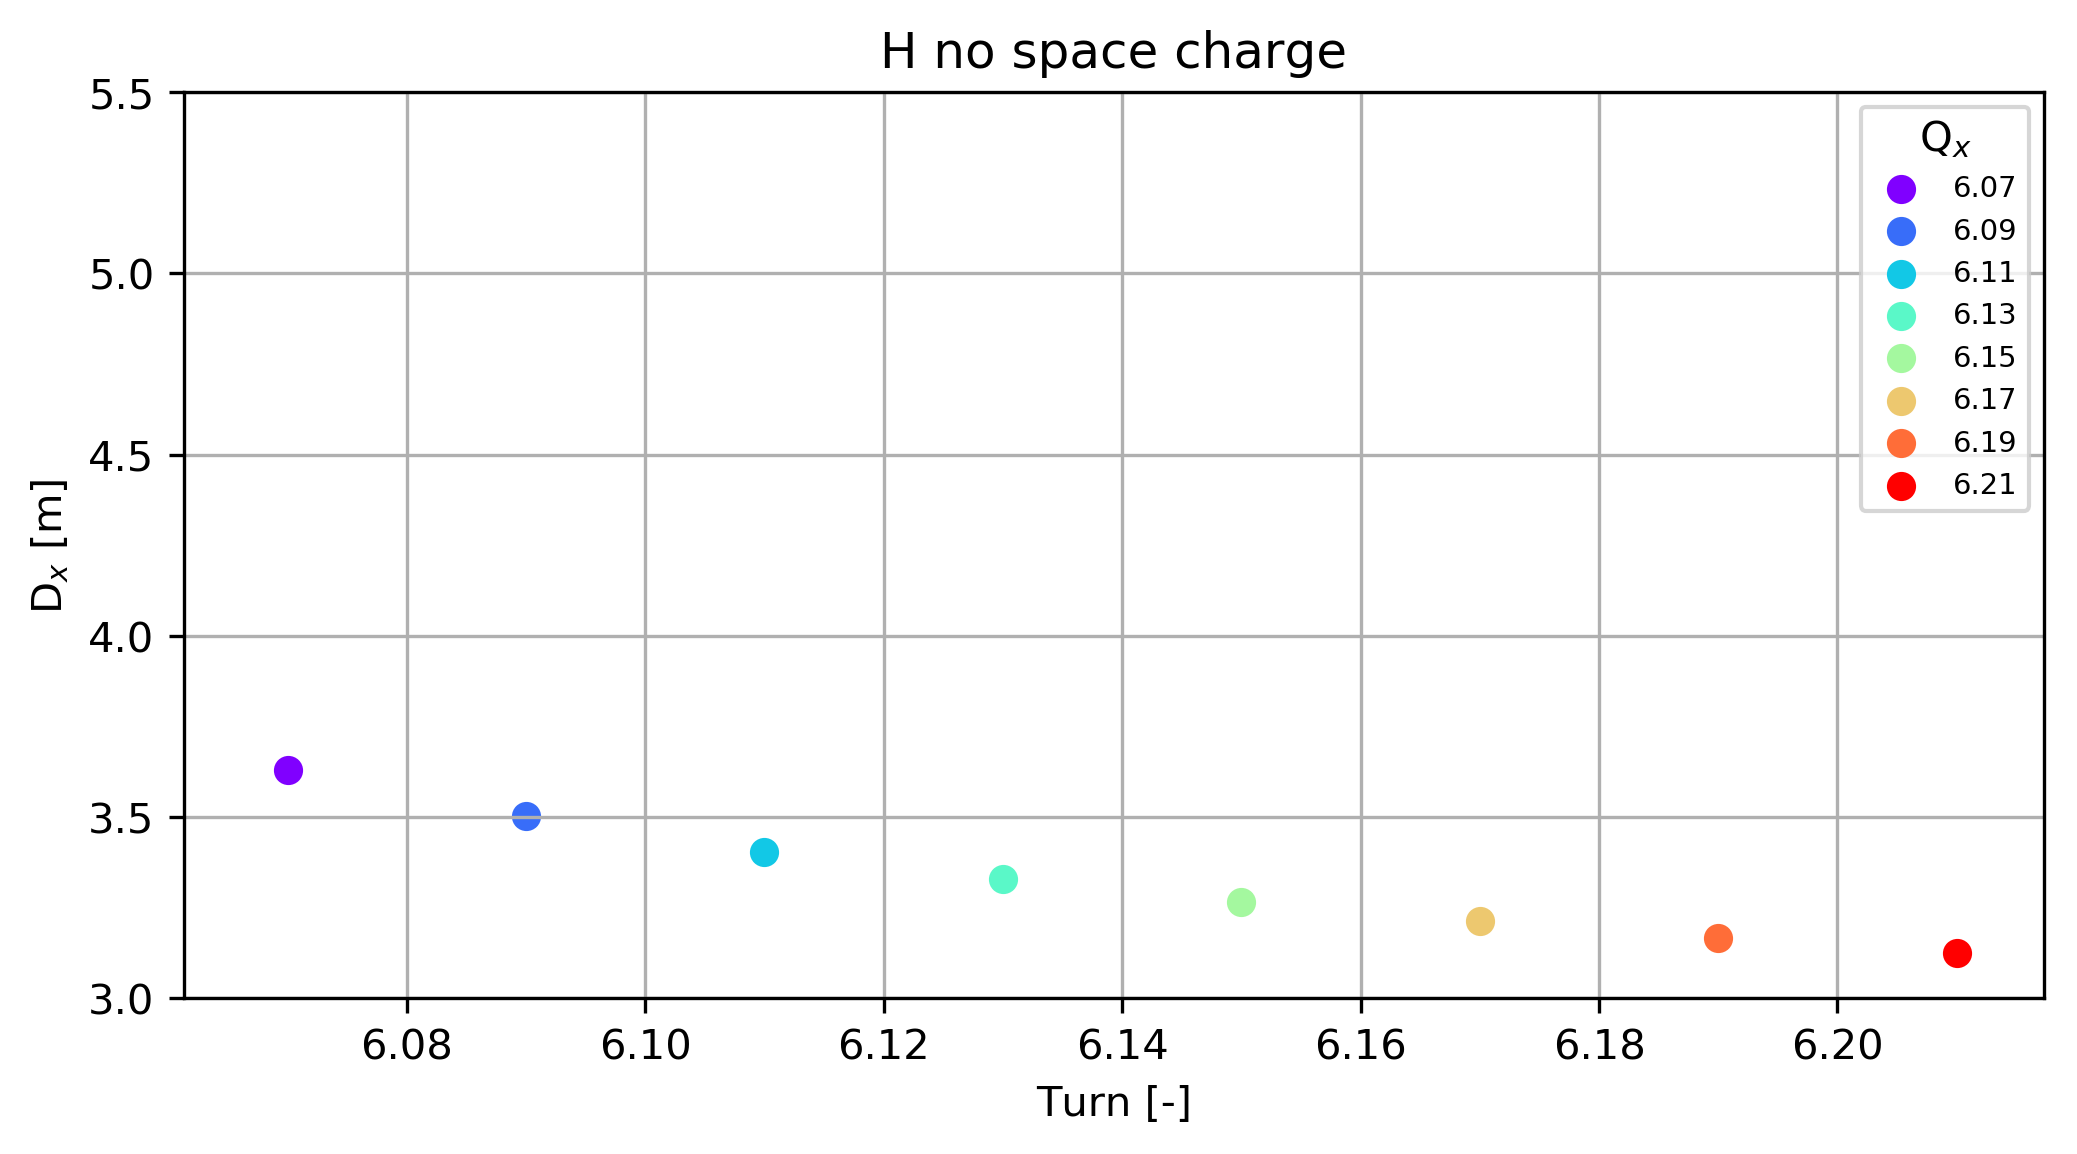

In [90]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('H no space charge');

ax1.set_ylabel(r'D$_x$ [m]');
ax1.set_xlabel('Turn [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q4)))
c_it = int(0)


for i in range(len(Q4)):
    ax1.scatter(Q4[i], Dx4[i], label=Q4[i], color=colors[c_it]);
    c_it = c_it + 1
        
ax1.legend(fontsize='x-small', loc=1, title=legend_label)
ax1.grid()
#ax1.set_xlim(-1,2200)
ax1.set_ylim(3, 5.5)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig('Plots_H_NoSC/Horizontal_Ds_NoSC.png', dpi = 800);

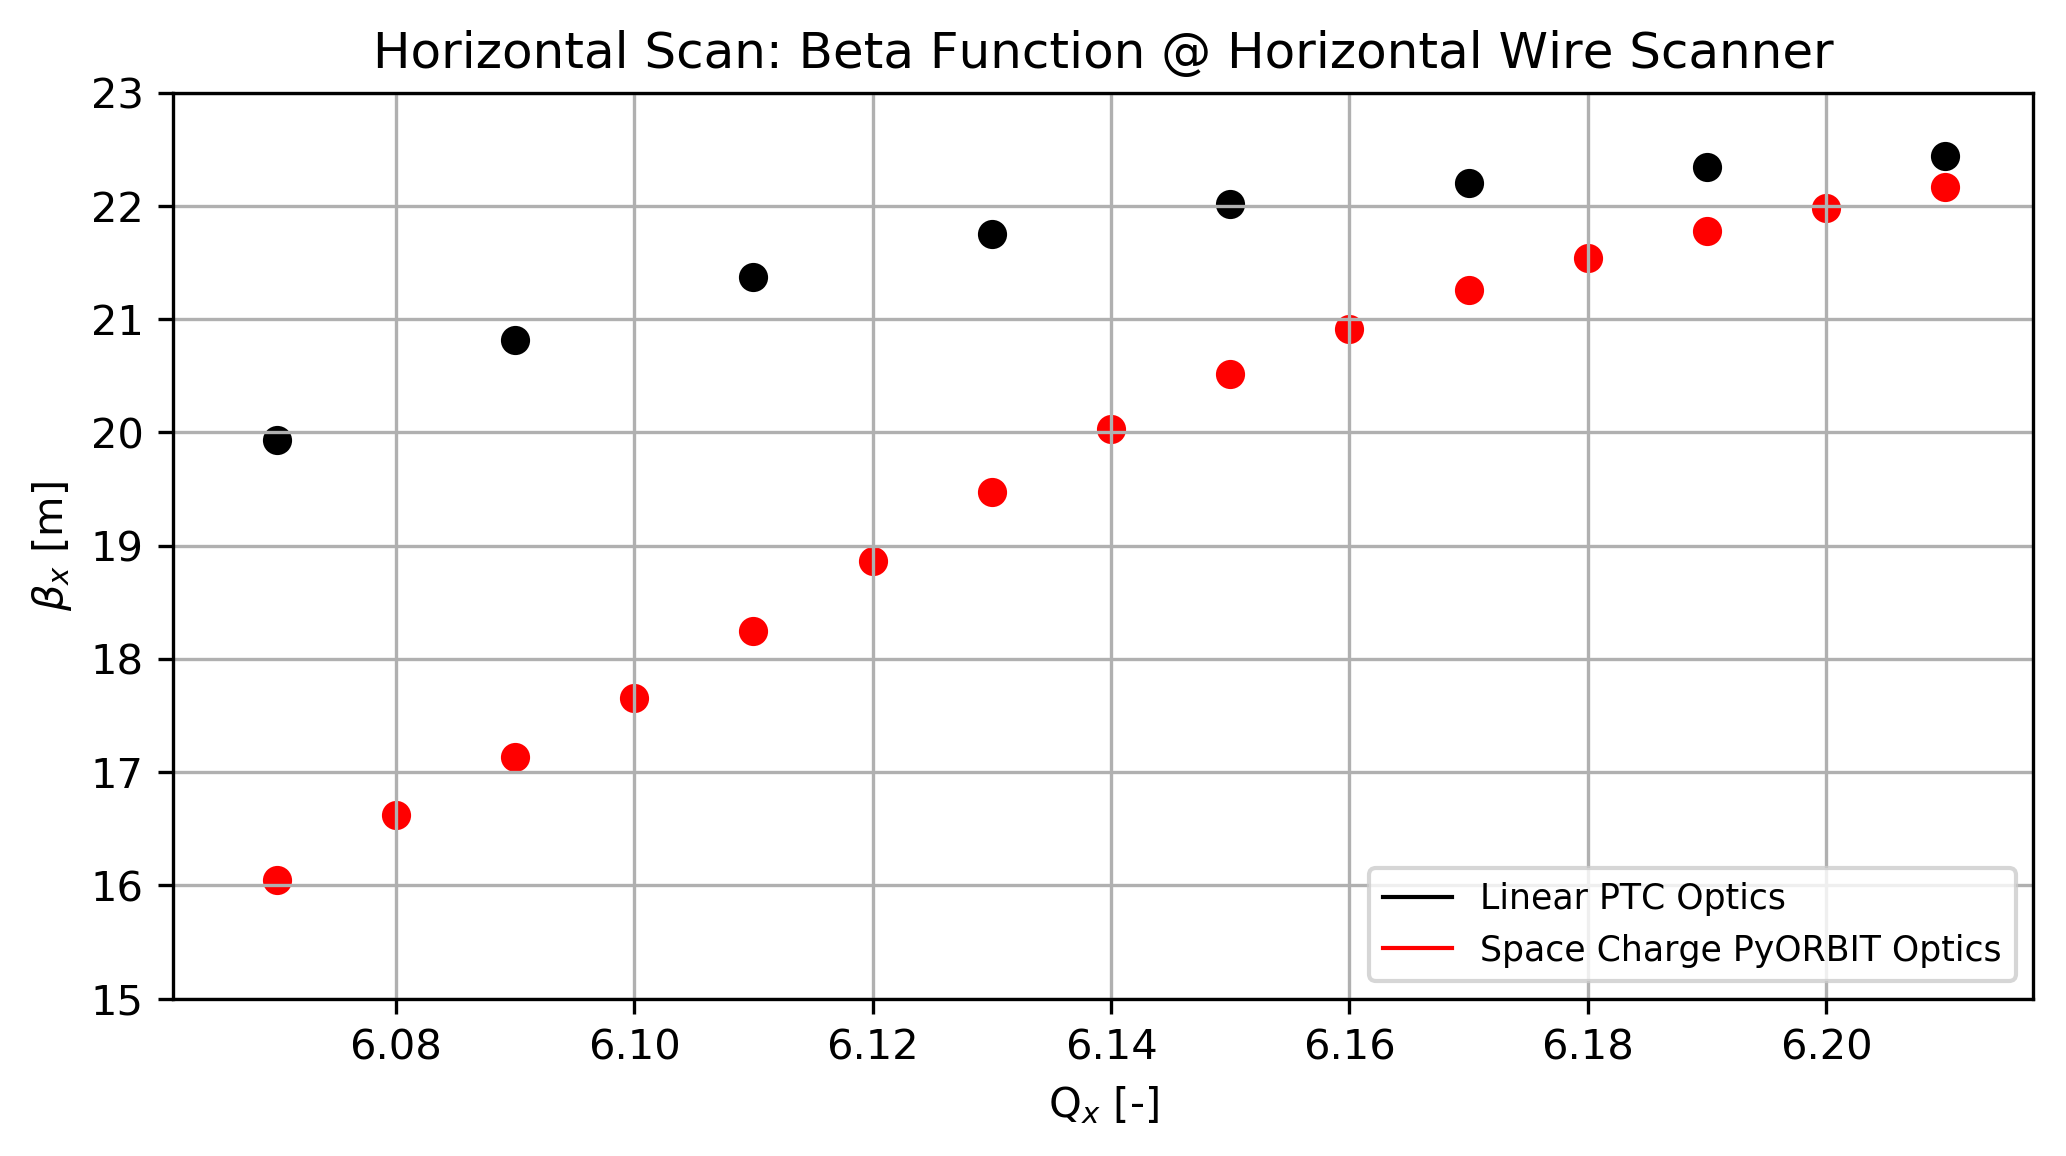

In [91]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('Horizontal Scan: Beta Function @ Horizontal Wire Scanner');

ax1.set_ylabel(r'$\beta_x$ [m]');
ax1.set_xlabel(r'Q$_x$ [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q3)))
c_it = int(0)

for i in range(len(Q3)):
    ax1.scatter(Q3[i], Bx3[i], color='r');
    c_it = c_it + 1

colors = cm.rainbow(np.linspace(0, 1, len(Q4)))
c_it = int(0)

for i in range(len(Q4)):
    ax1.scatter(Q4[i], Bx4[i], color='k');
    c_it = c_it + 1
        
#ax1.legend(fontsize='x-small', loc=4, title=legend_label)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1),
                Line2D([0], [0], color='r', lw=1)]

ax1.legend(custom_lines, ['Linear PTC Optics', 'Space Charge PyORBIT Optics'], fontsize='small', loc=4,)


ax1.grid()
#ax1.set_xlim(-1,2200)
ax1.set_ylim(15, 23)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig('Horizontal_Bs_cf.png', dpi = 800);

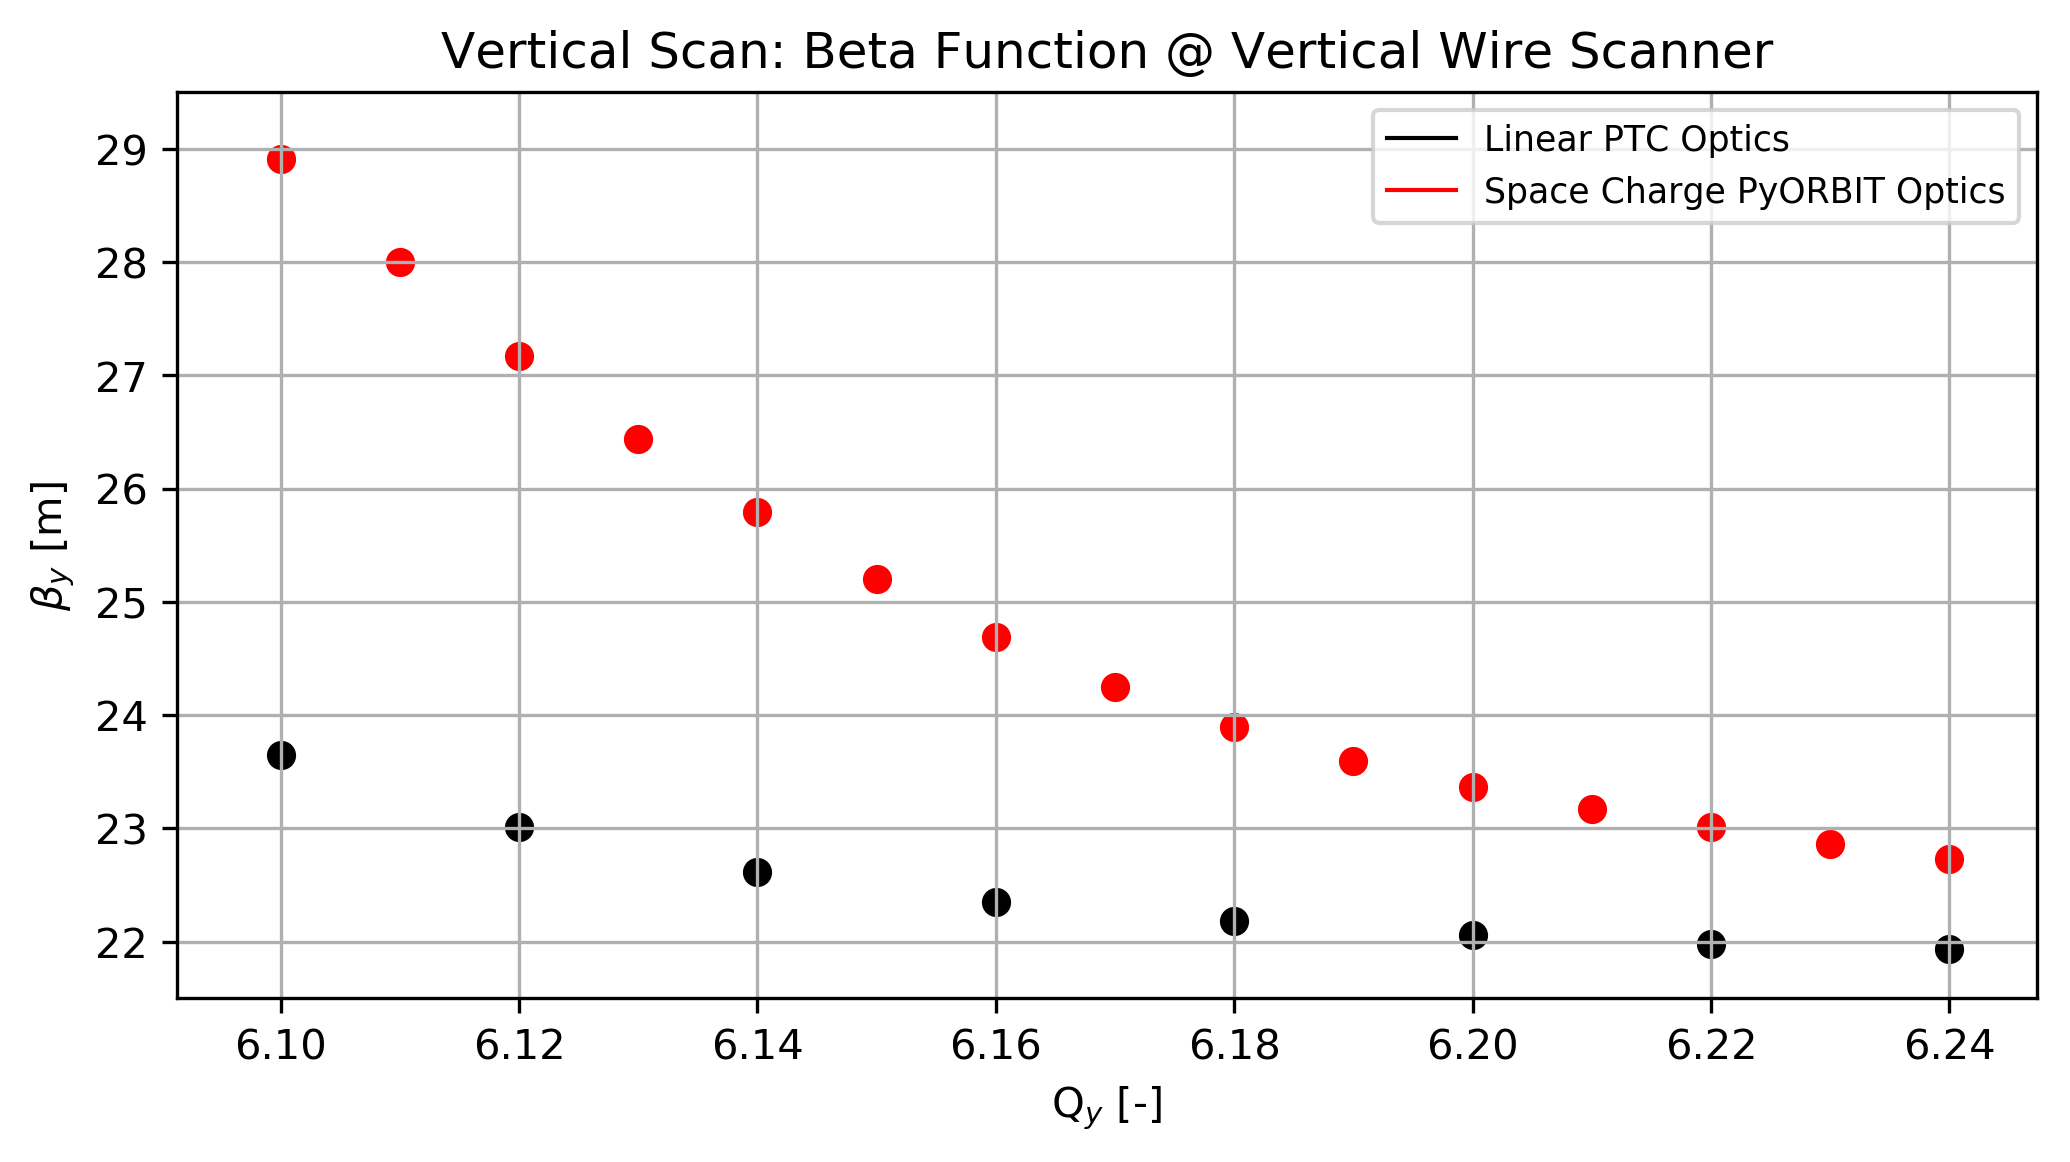

In [92]:
fig1 = plt.figure(facecolor='w', edgecolor='k')
ax1 = fig1.add_subplot(111)

tit = main_label + ' ' + sc + ' ' + parameter
ax1.set_title('Vertical Scan: Beta Function @ Vertical Wire Scanner');

ax1.set_ylabel(r'$\beta_y$ [m]');
ax1.set_xlabel(r'Q$_y$ [-]');

colors = cm.rainbow(np.linspace(0, 1, len(Q1)))
c_it = int(0)

for i in range(len(Q1)):
    ax1.scatter(Q1[i], By1[i], color='k');
    c_it = c_it + 1

colors = cm.rainbow(np.linspace(0, 1, len(Q2)))
c_it = int(0)

for i in range(len(Q2)):
    ax1.scatter(Q2[i], By2[i], color='r');
    c_it = c_it + 1
        
#ax1.legend(fontsize='x-small', loc=4, title=legend_label)

from matplotlib.lines import Line2D
custom_lines = [Line2D([0], [0], color='k', lw=1),
                Line2D([0], [0], color='r', lw=1)]

ax1.legend(custom_lines, ['Linear PTC Optics', 'Space Charge PyORBIT Optics'], fontsize='small', loc=1)


ax1.grid()
#ax1.set_xlim(-1,2200)
ax1.set_ylim(21.5, 29.5)

#savename = 'Plots_H/' + parameter + '_H.png'
plt.savefig('Vertical_Bs_cf.png', dpi = 800);